In [1]:
import pandas as pd
import streamlit as st
import plotly_express as px
import sweetviz as sv
import folium
from folium.plugins import MarkerCluster
import numpy as np
import random # pour modifier les coordonnées long et lat
import matplotlib.pyplot as plt
import sys 

c:\Users\jonat\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

import choose_lat_pays

In [3]:
st.title("Etude du marché la daronne à zein de l'énergie de EDF au niveau mondial")

st.write("""
Data set appartenant à edf
""")
st.markdown("[Source internet](https://opendata.edf.fr/explore/dataset/productions-consolidees-par-pays-du-groupe-edf/information/?disjunctive.perimetre_spatial&disjunctive.filiere&sort=-tri&dataChart=eyJxdWVyaWVzIjpbeyJjaGFydHMiOlt7InR5cGUiOiJjb2x1bW4iLCJmdW5jIjoiU1VNIiwieUF4aXMiOiJwcm9kdWN0aW9uIiwic2NpZW50aWZpY0Rpc3BsYXkiOnRydWUsImNvbG9yIjoiIzAwMUE3MCJ9XSwieEF4aXMiOiJhbm5lZSIsIm1heHBvaW50cyI6bnVsbCwidGltZXNjYWxlIjoieWVhciIsInNvcnQiOiIiLCJzZXJpZXNCcmVha2Rvd25UaW1lc2NhbGUiOiIiLCJjb25maWciOnsiZGF0YXNldCI6InByb2R1Y3Rpb25zLWNvbnNvbGlkZWVzLXBhci1wYXlzLWR1LWdyb3VwZS1lZGYiLCJvcHRpb25zIjp7ImRpc2p1bmN0aXZlLnBlcmltZXRyZV9zcGF0aWFsIjp0cnVlLCJkaXNqdW5jdGl2ZS5maWxpZXJlIjp0cnVlLCJzb3J0IjoiLXRyaSJ9fX1dLCJkaXNwbGF5TGVnZW5kIjp0cnVlLCJhbGlnbk1vbnRoIjp0cnVlLCJ0aW1lc2NhbGUiOiIifQ%3D%3D)")

#data frame de EDF
edf = pd.read_csv("../CSV/productions-consolidees-par-pays-du-groupe-edf.csv", delimiter=';')

#data frame des pays
paysDF = pd.read_csv("../CSV/Country.csv" )

#data frame EDF + pays
edf_pays=pd.read_csv("../CSV/edf_AND_country.csv")
edf_pays.columns = [col.strip() for col in edf_pays.columns]
edf_pays['Production'] = edf_pays['Production'].astype('str')
edf_pays['Année'] = edf_pays['Année'].astype('str')
edf_pays['Filière'] = edf_pays['Filière'].astype('str')
# # problème de , à la place de point
# edf_pays=edf_pays.dropna(subset=['Production'])
# edf_pays['Production'] =


# edf_pays.to_csv('edf_AND_country.csv', index=False)


# edf_pays['Année'] =


# st.dataframe(edf_pays, height=300)

# # st.dataframe(edf.style.background_gradient(axis=0))


# if st.button('voir le data set "EDF"  dans son entièreté?'):
#     st.write("Voici la Productions consolidées par pays du groupe EDF")
#     st.dataframe(edf, height=300)

# if st.button('voir le data set "pays" dans son entièreté?'):
#     st.write("Voici des information sur les pays du monde")
#     st.dataframe(paysDF, height=300)

# if st.button('voir le data set "edf + pays"  dans son entièreté?'):
#     st.write("Voici le data set complet")
#     st.dataframe(edf_pays, height=300)


2024-01-02 21:37:57.686 
  command:

    streamlit run C:\Users\jonat\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [4]:
m = folium.Map(location=(53.0000, 9.0000), zoom_start=2)

In [5]:
solar_image = "../images/soleil.png"
nuclear_image = "../images/nucleaire.png"
eolienne_image = "../images/eolienne.png"
biomass_image = "../images/biomasse.png"
charbon_image = "../images/charbon.png"
divers_image = "../images/divers.png"
fioul_image = "../images/fioul.png"
gaz_image = "../images/gaz.png"
géothermie_image = "../images/geothermique.png"
hydraulique_image = "../images/eau.png"
energie_marine_image = "../images/energie_marine.png"
Autre_ENR_image = "../images/autres_energies.png"


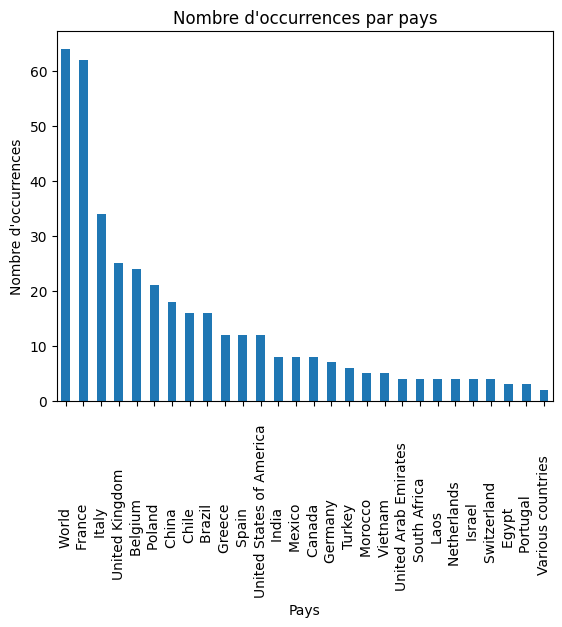

In [6]:

# Compter le nombre d'occurrences de chaque valeur dans la colonne 'country'
occurrences = edf_pays['country'].value_counts()

# Afficher le graphique
occurrences.plot(kind='bar')
plt.title('Nombre d\'occurrences par pays')
plt.xlabel('Pays')
plt.ylabel('Nombre d\'occurrences')
plt.show()

In [7]:
dico_plage_latitude={'Belgium':{'max': 51.16832, 'min': 50.69750},
                   'Brazil':{'max': -3.21079, 'min': -19.03565},
                   'Chile': {'max': -18.72987, 'min': -34.65490},
                   'France': {'max': 49.21616, 'min': 44.12545},
                   'Greece': {'max': 40.21915, 'min': 37.08323},
                   'Italy': {'max': 45.71232, 'min': 42.12430},
                   'China': {'max': 41.17815, 'min': 31.08605},
                   'United Kingdom': {'max': 54.40363, 'min': 50.87619},
                   'Spain': {'max': 41.86679, 'min': 37.80282},
                   'USA': {'max': 41.29032, 'min': 33.46085}
                  }
#j ai du remplir à la main ces coordonées

In [8]:
dico_longitude={'Belgium':{'max': 5.32537, 'min': 3.36918},
               'Brazil':{'max': -43.14998, 'min': -57.19544},
               'Chile': {'max': -70.04766, 'min': -70.62890},
               'France': {'max': 5.57227, 'min': -0.79981},
               'Greece': {'max': 22.50879, 'min': 21.88477},
               'Italy': {'max': 11.83887, 'min': 11.82129},
               'China': {'max': 115.07898, 'min': 84.45241},
               'United Kingdom': {'max': -0.86445, 'min': -3.37522},
               'Spain': {'max': -0.56613, 'min': -6.48263},
               'USA': {'max': -76.18788, 'min': -116.60898}
               }

In [9]:

referencement_image={"Éolienne":eolienne_image,
                     "Biomasse":biomass_image,
                     "Charbon":charbon_image,
                     "Divers":divers_image,
                     "Fioul":fioul_image,
                     "Gaz":gaz_image,
                     "Géothermie":géothermie_image,
                     "Hydraulique":hydraulique_image,
                     "Nucléaire":nuclear_image,
                     "Solaire":solar_image,
                     "Énergie marine":energie_marine_image,
                     "Autres ENR":Autre_ENR_image}

In [10]:
def choose_lat_pays(pays, latitudeCVS):

    lat_pays=dico_plage_latitude.get(pays)
    if lat_pays:
        latitude = random.uniform(lat_pays['max'], lat_pays['min'])
    else:
        latitude = float(latitudeCVS) + random.uniform(-0.5, 0.5)  # valeur de base pour tous les "petits" pays

    return latitude

In [11]:
def choose_long_pays(pays,longitudeCSV):
                                          #j ai du remplir à la main ces coordonées
    long_pays=dico_longitude.get(pays)
    if long_pays is not None:
        longitude = random.uniform(long_pays['max'], long_pays['min'])
    else:
        longitude = float(longitudeCSV) + random.uniform(-0.5, 0.5)  # valeur de base pour tous les "petits" pays

    return longitude

In [12]:
for row in edf_pays.itertuples():
  # pays = getattr(row, 'country')
  pays = row.country
  # print(pays)

  latitudeCSV = row.lat
  # print (latitudeCSV)
  latitude=choose_lat_pays(pays,latitudeCSV)
  

  longitudeCSV = row.lng
  longitude=choose_long_pays(pays,longitudeCSV)
                                          #mon dico pour long et lat !!!!!!!pas pris en compte par le code !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  # print (latitude)
  #if pandas.isna(latitude) or -----------  :
  #   continue

  popup = row.country+ "\n,  filière: " + row.Filière +",\n production: "+ row.Production+ " GWh"+ ",\n"+row.Année
    #j ai du changer les colonnes Production , Année   en string

  
  
  energie = row.Filière
  icon_energie  = folium.CustomIcon(
              referencement_image[energie],
              icon_size=(25, 25),
              icon_anchor=(22, 94),
              popup_anchor=(-3, -76),
              )         # appeler un nouveau dico avec en valeur nnnn_image à la place de icon_nnn  , pas la peine de faire unefonction, juste appeler le dico
  # print(icon_test, icon_energie)
  # print(icon_test, icon_energie)
  
  if not pd.isna(latitude) and not pd.isna(longitude):
  #if pandas.isna(latitude) or -----------  :
  # le follium marker nest plsu dans le if au dessus
    folium.Marker(
      location=[latitude, longitude],
      tooltip="détails",
      popup = folium.Popup(popup, max_width=300),
      icon=icon_energie,
    # icon=icon_nuclear,
    # icon= icon_biomasse
      ).add_to(m)
    

KeyError: 'Éolienne       '


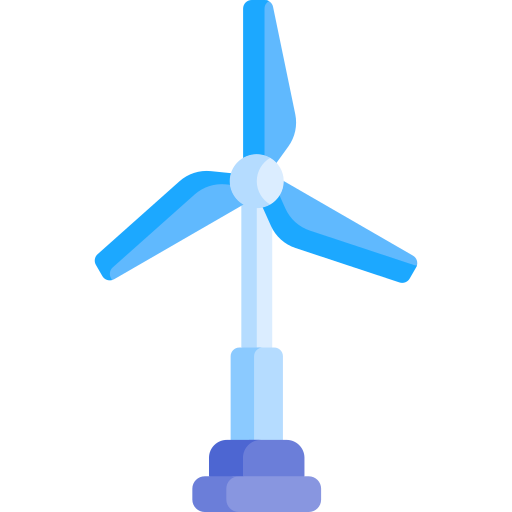
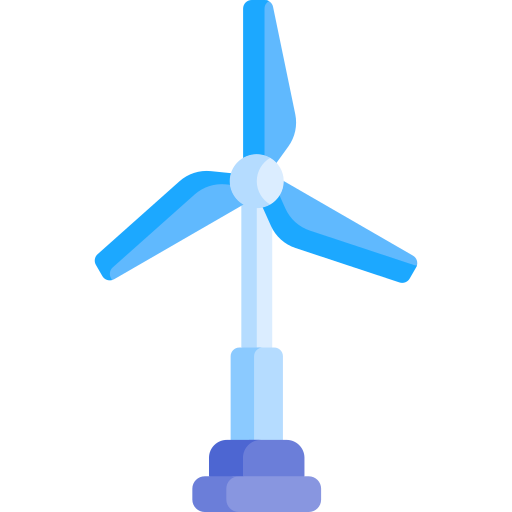
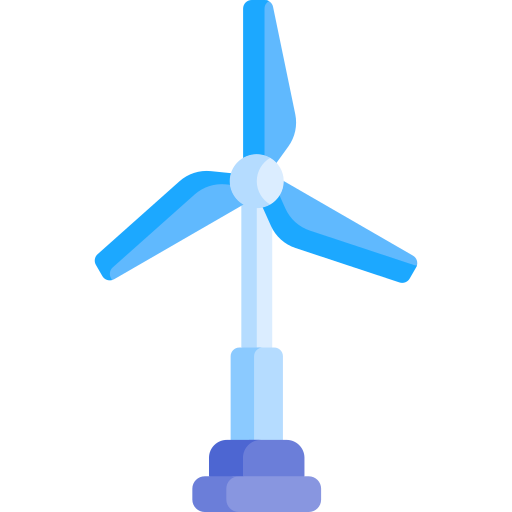
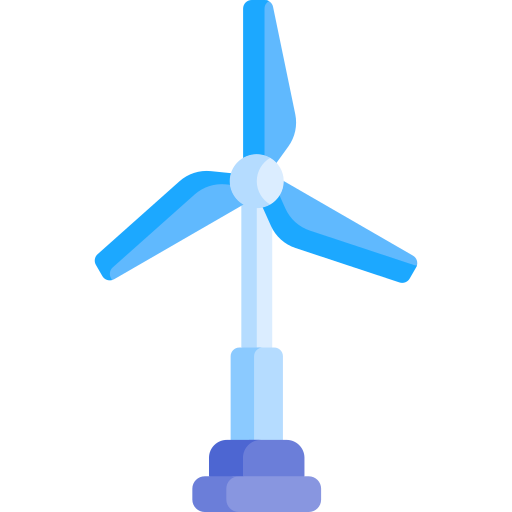
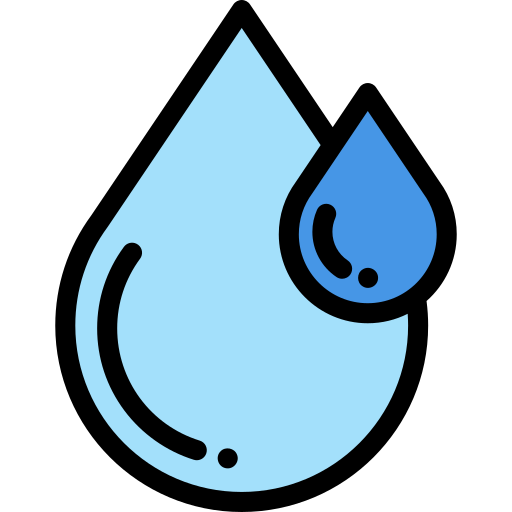
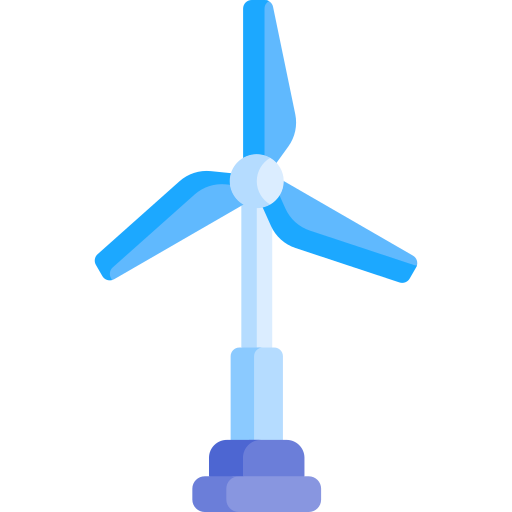
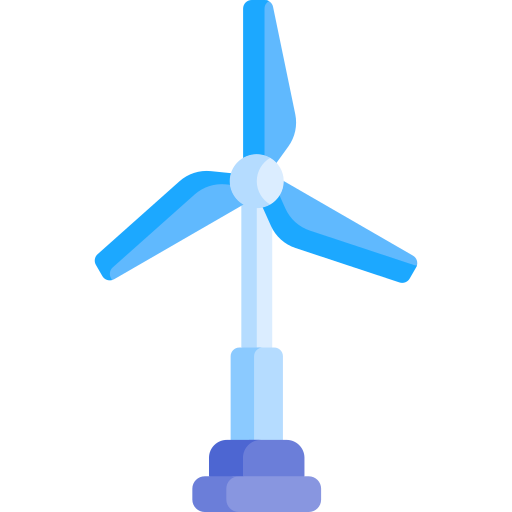
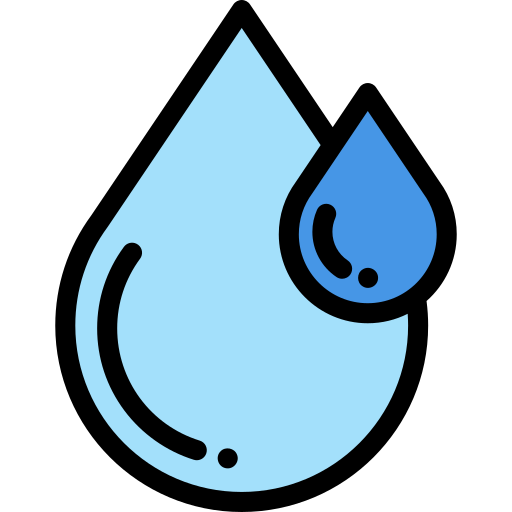
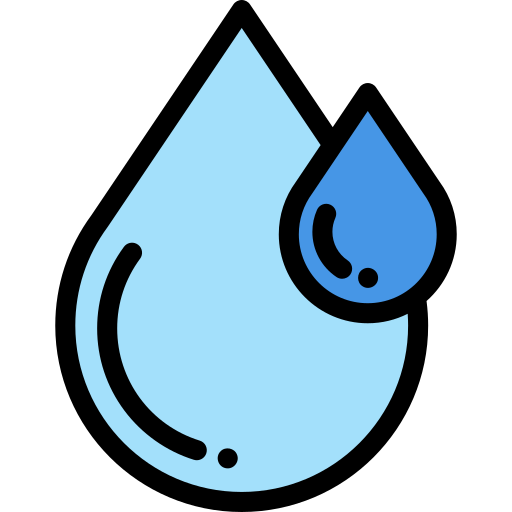
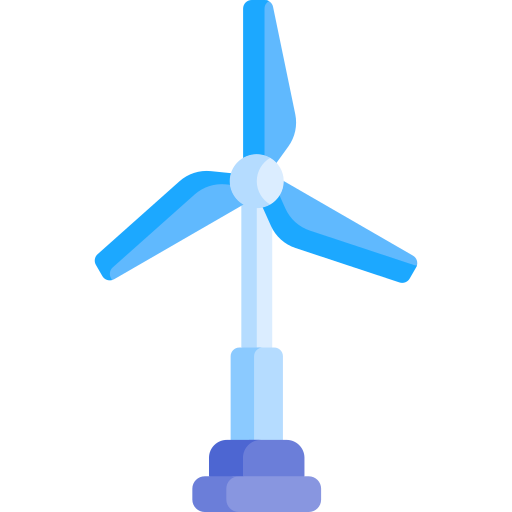
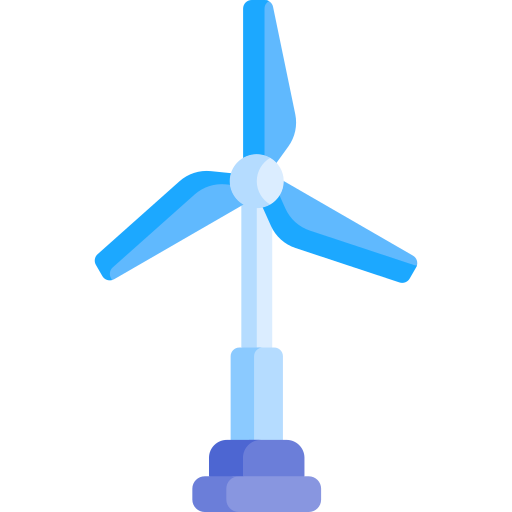
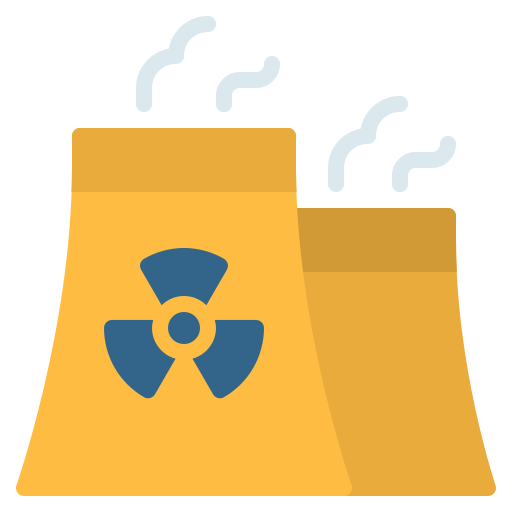
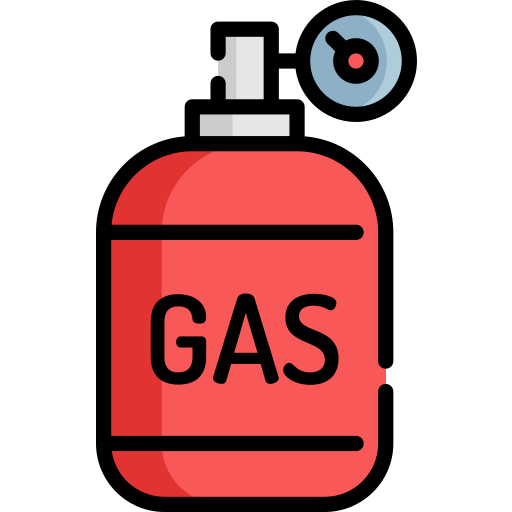
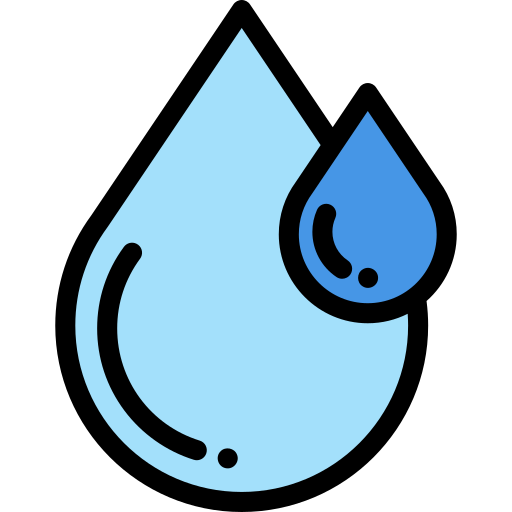
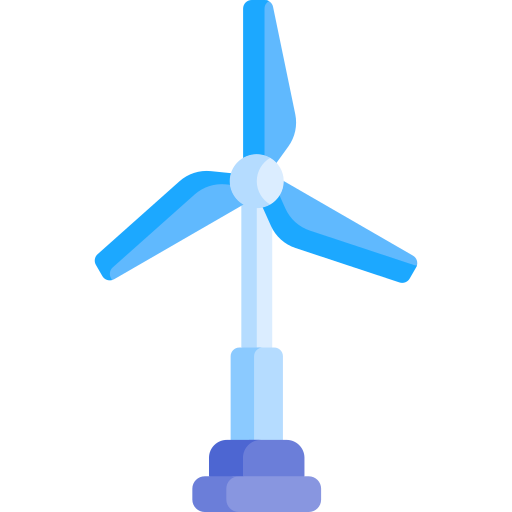
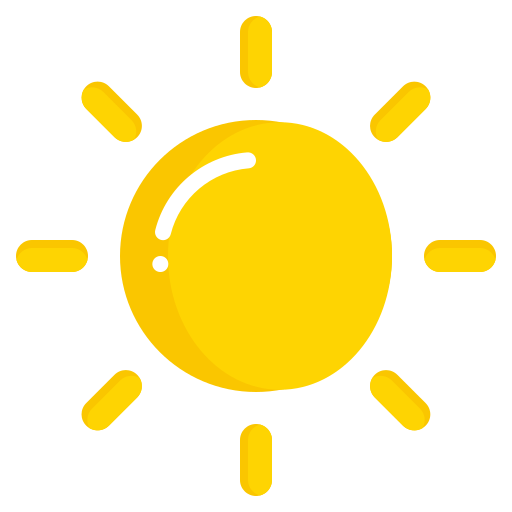
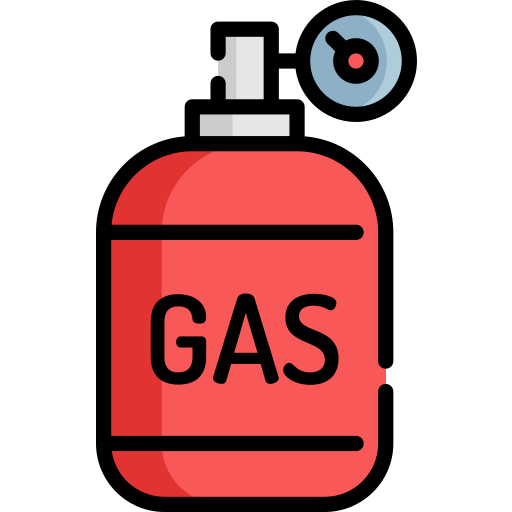
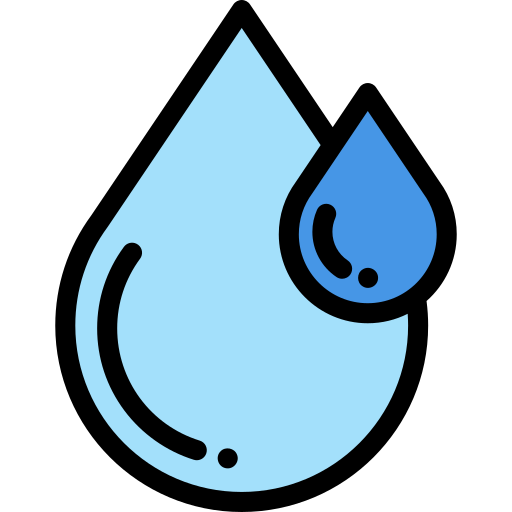
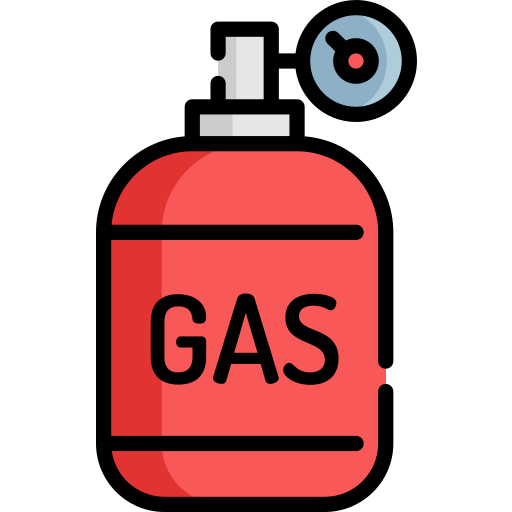
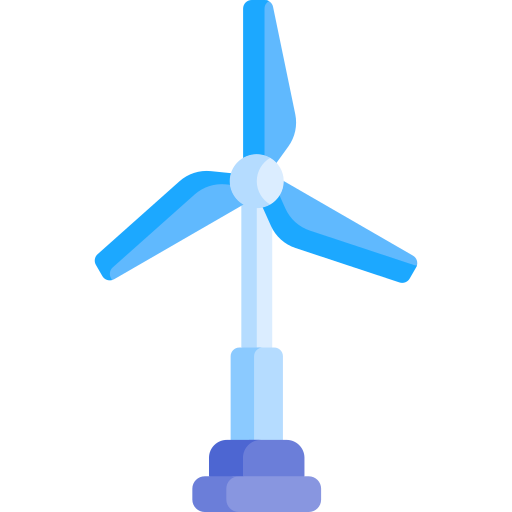
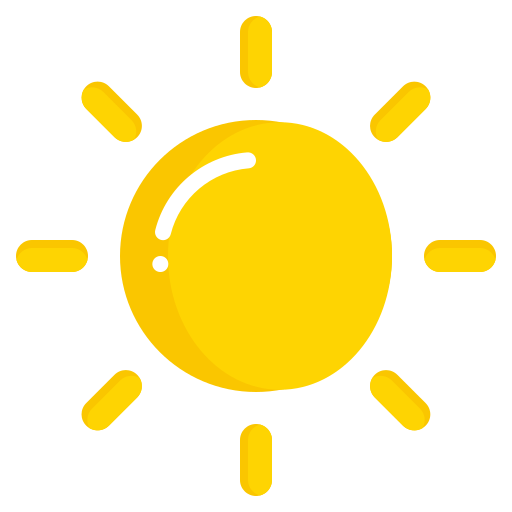
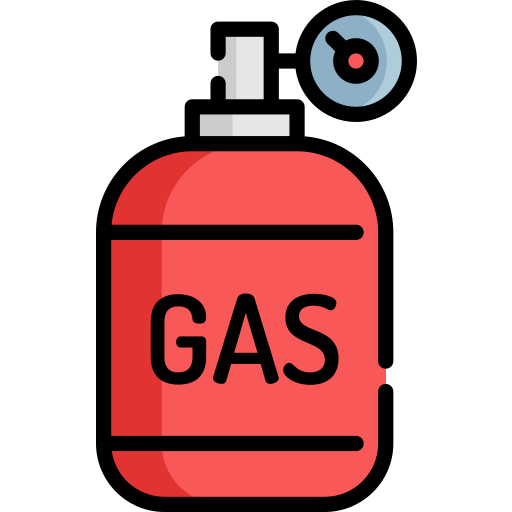
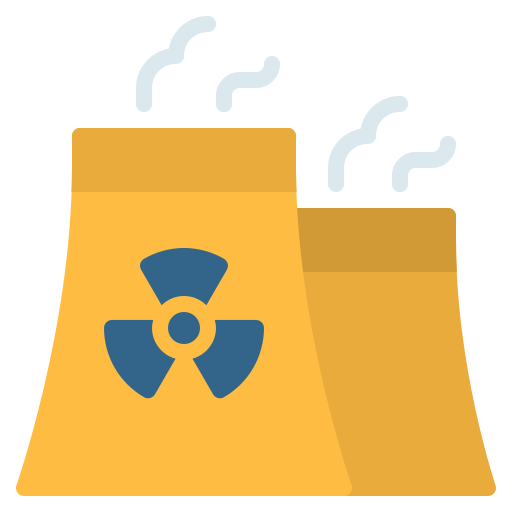
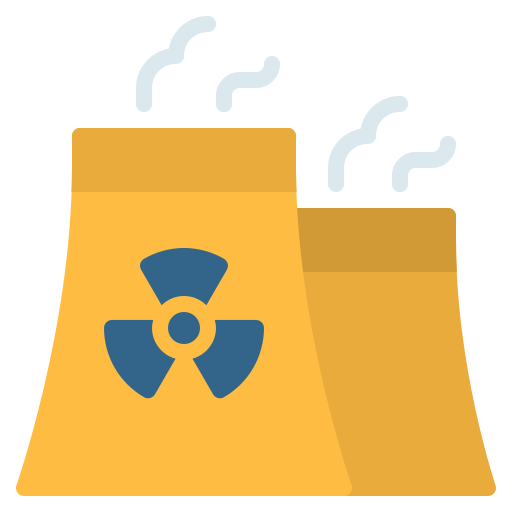
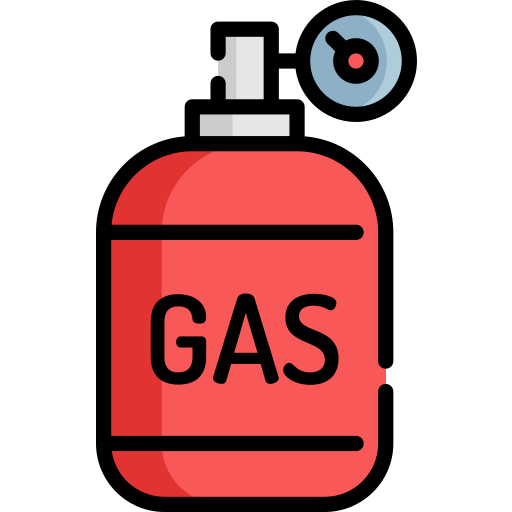
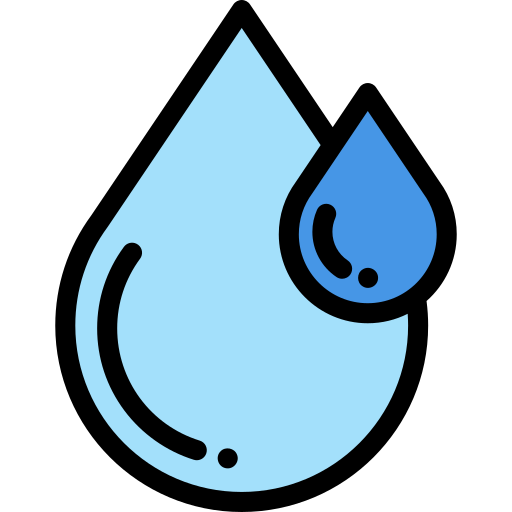
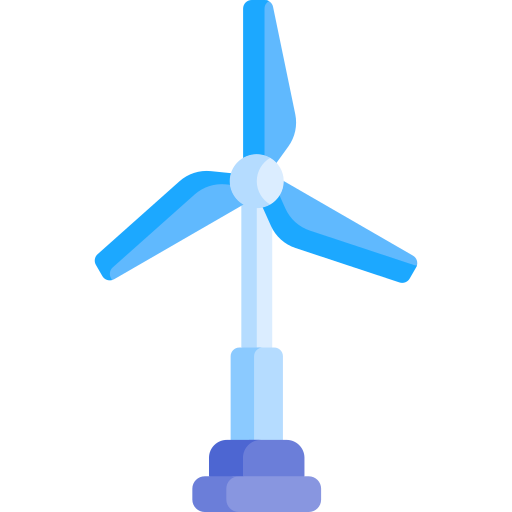
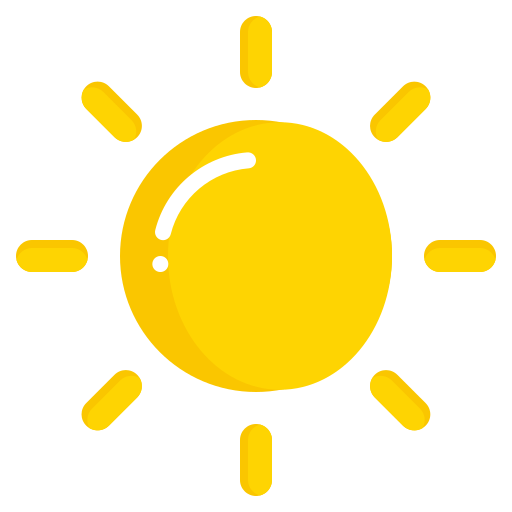
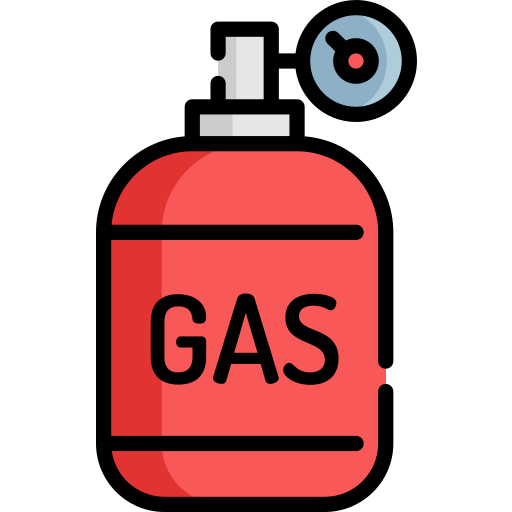
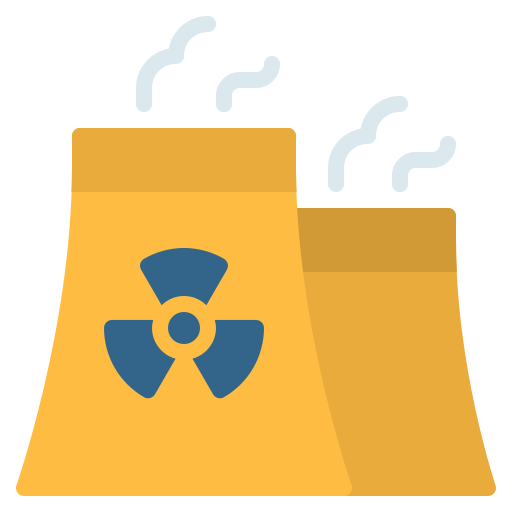
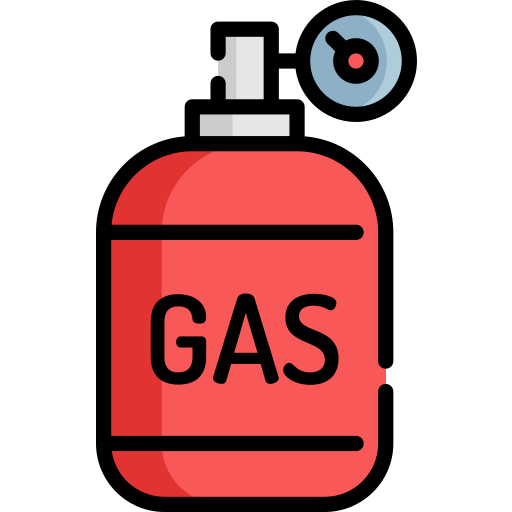
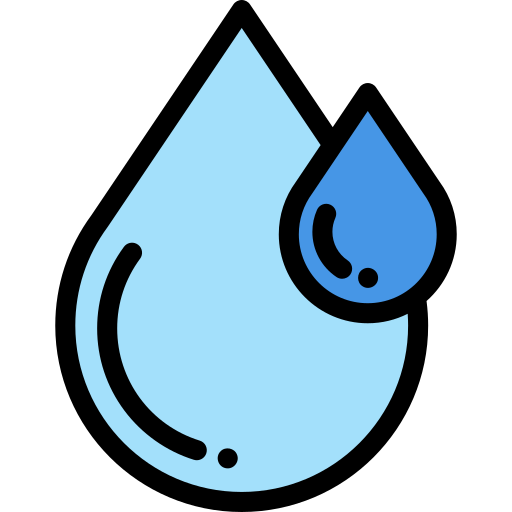
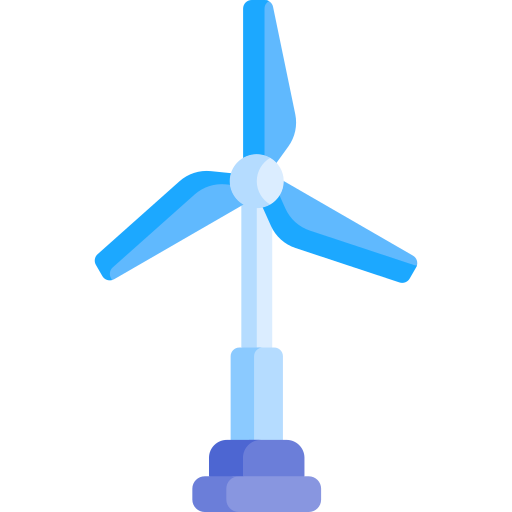
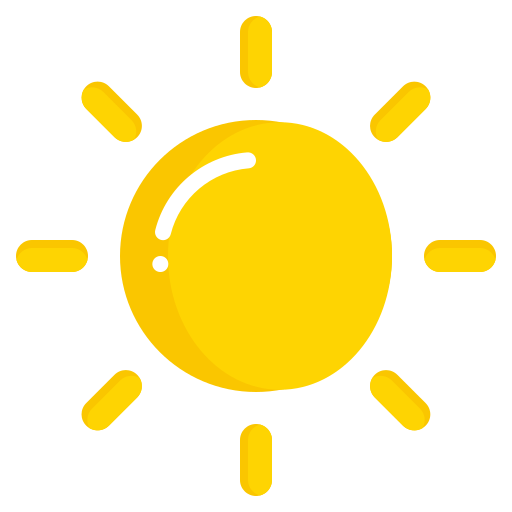
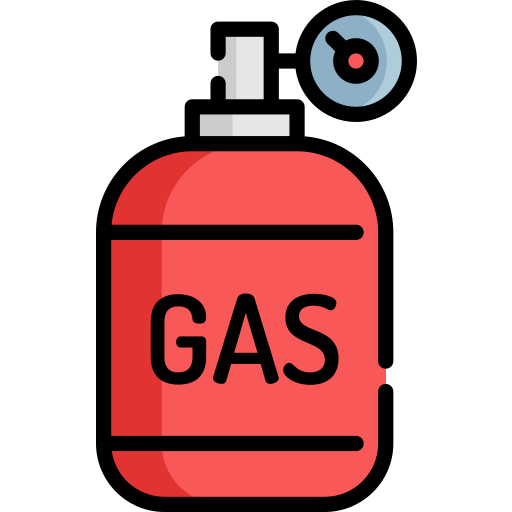
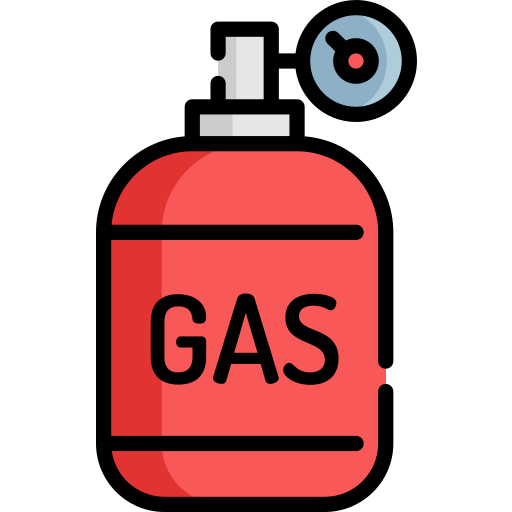
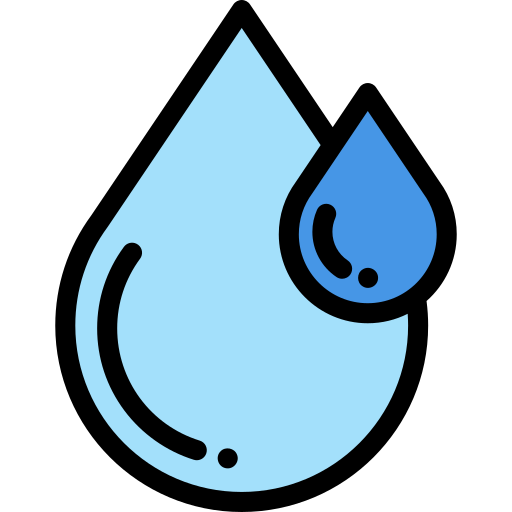
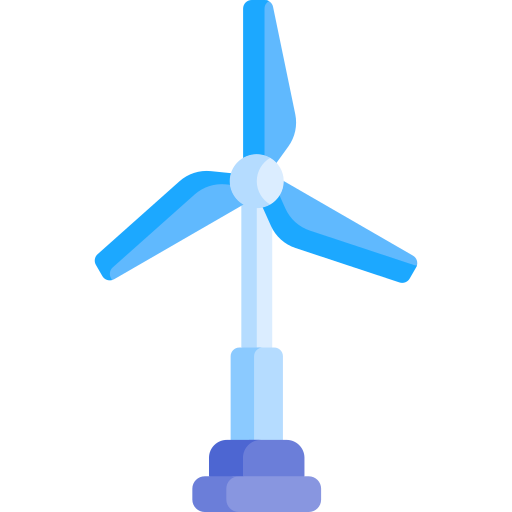
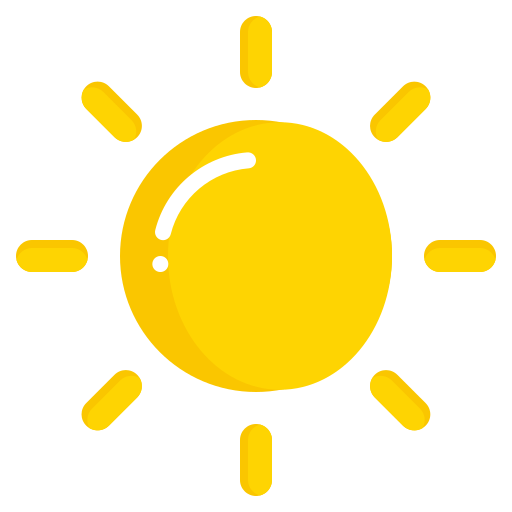
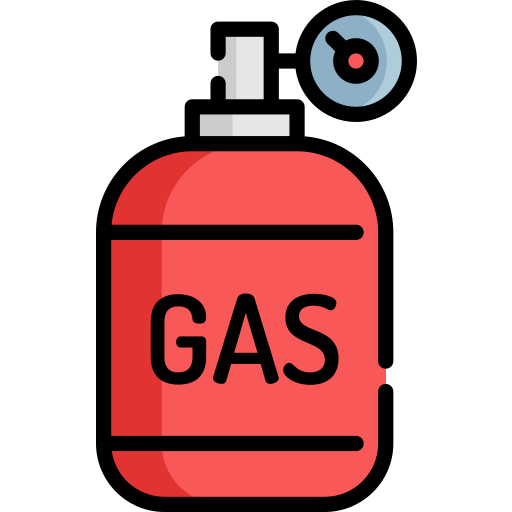
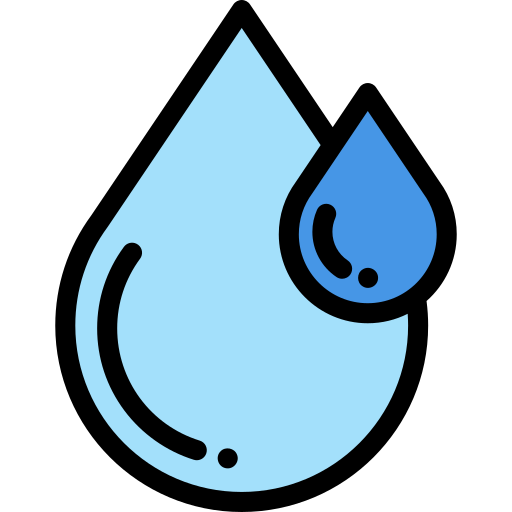
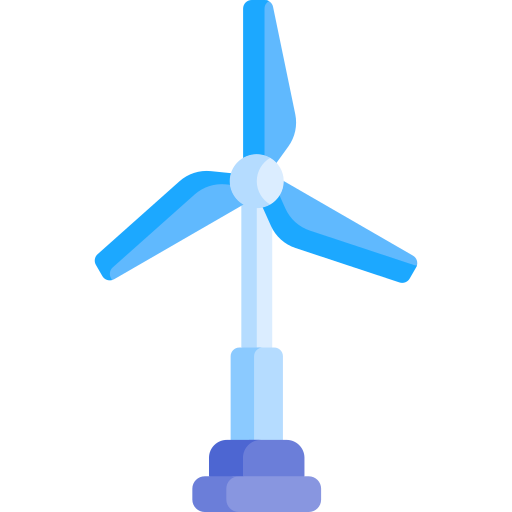
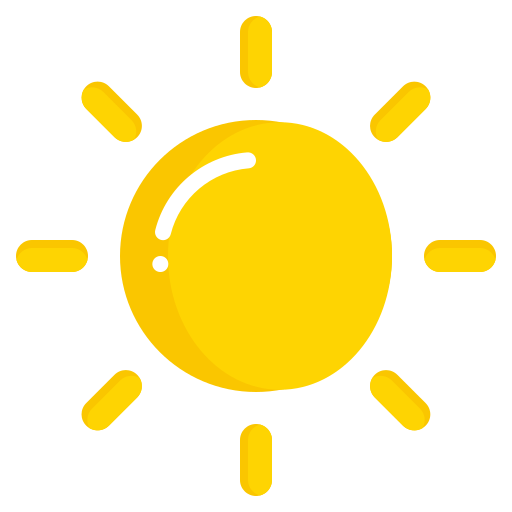
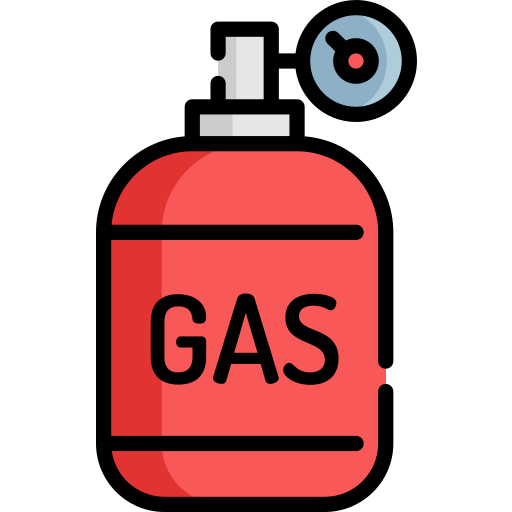
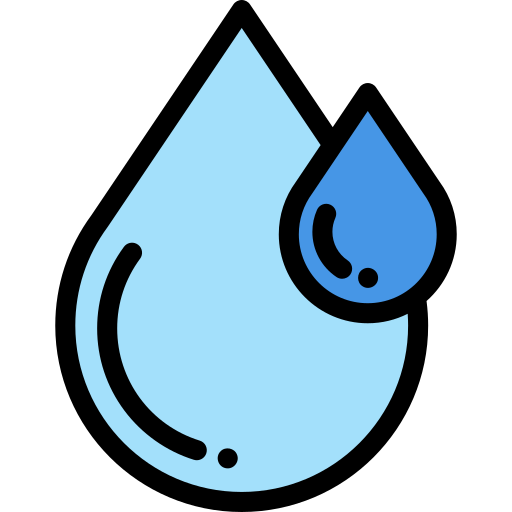
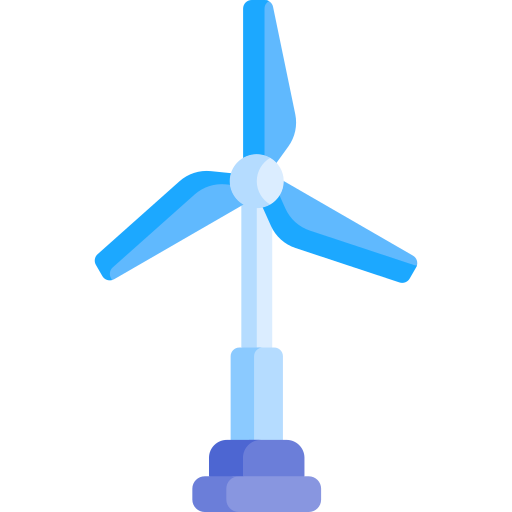
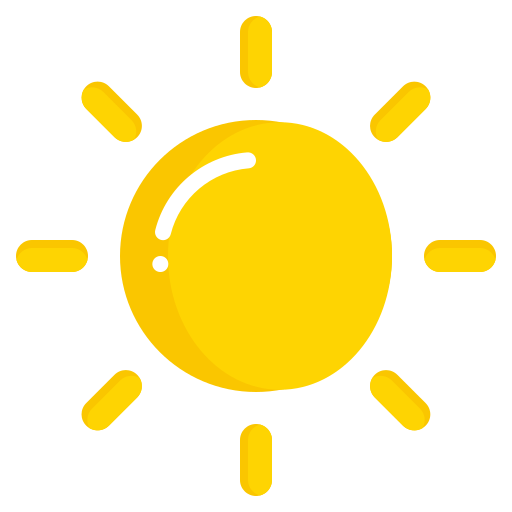
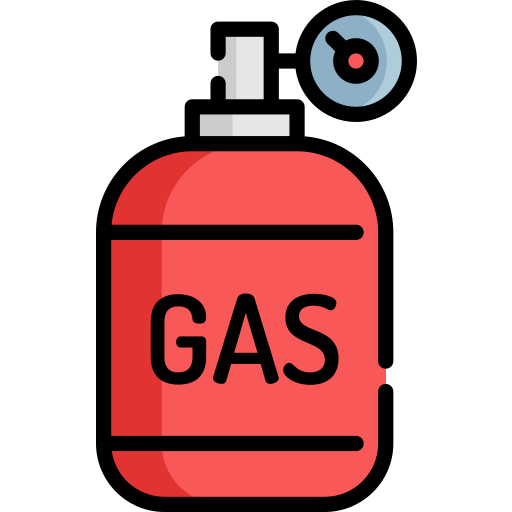
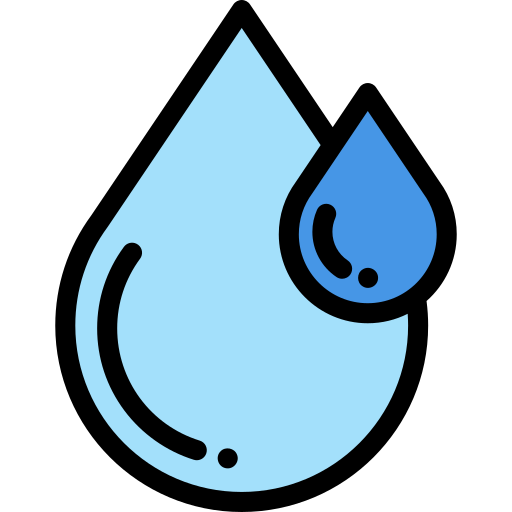
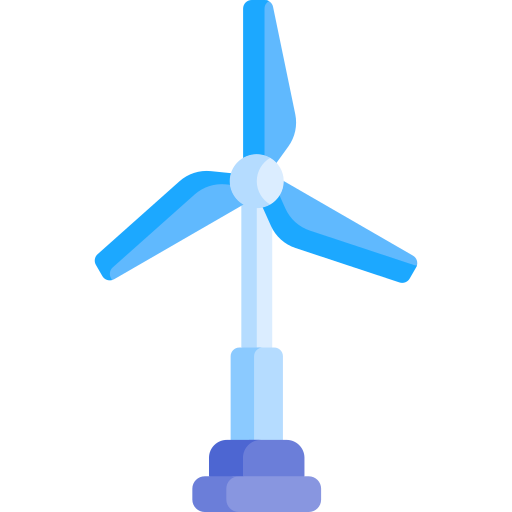
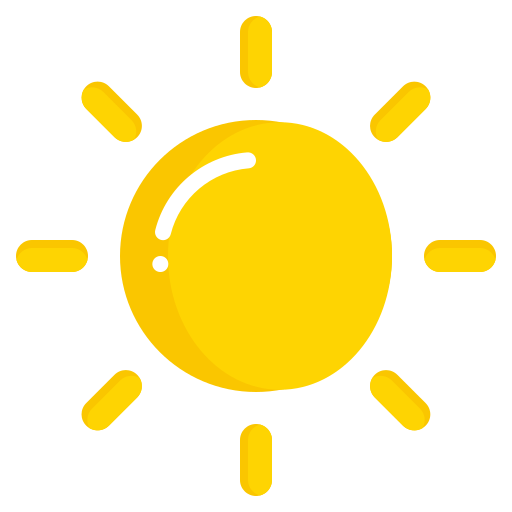
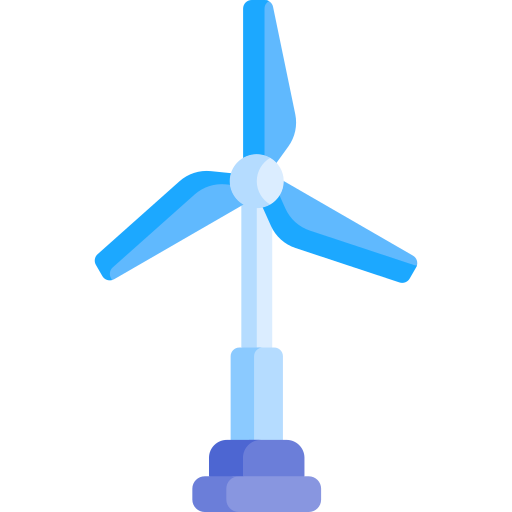
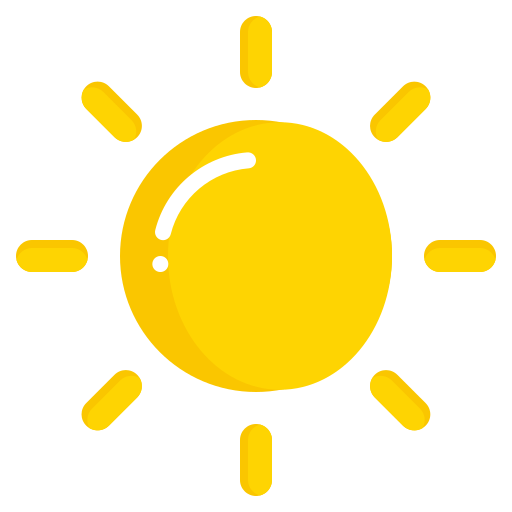
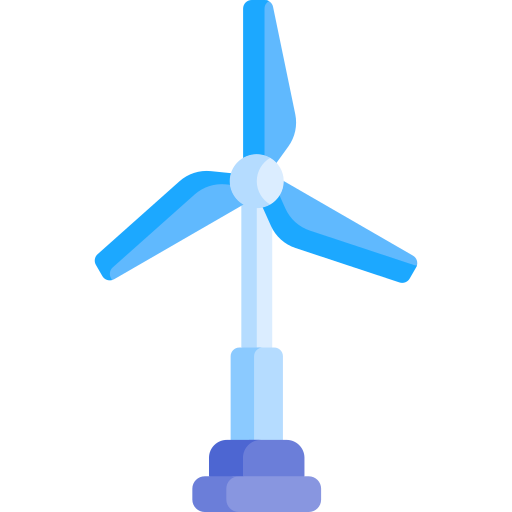
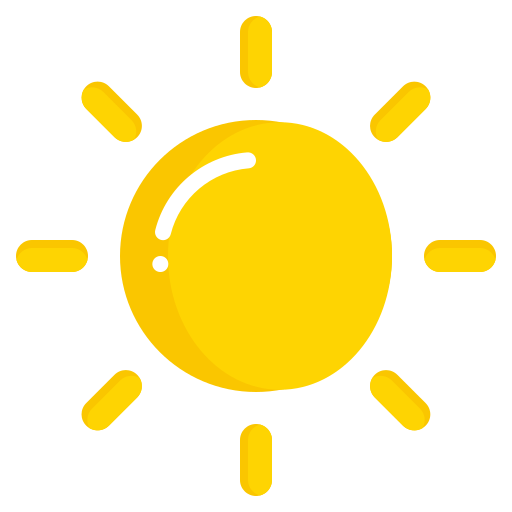
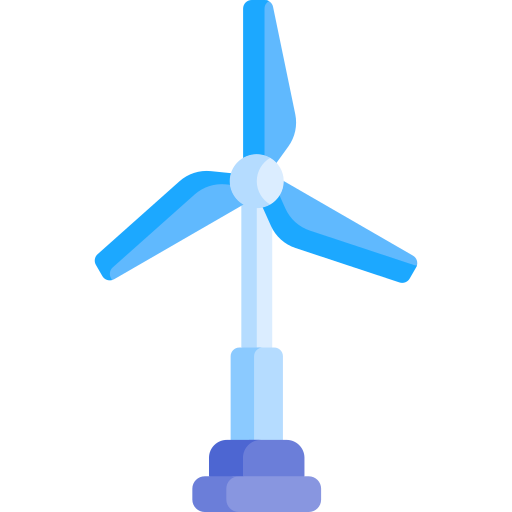
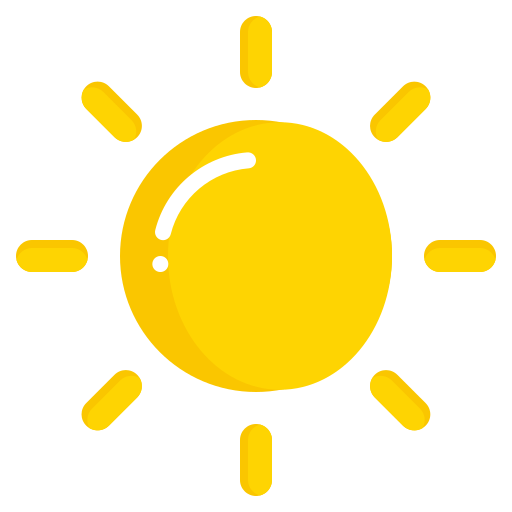
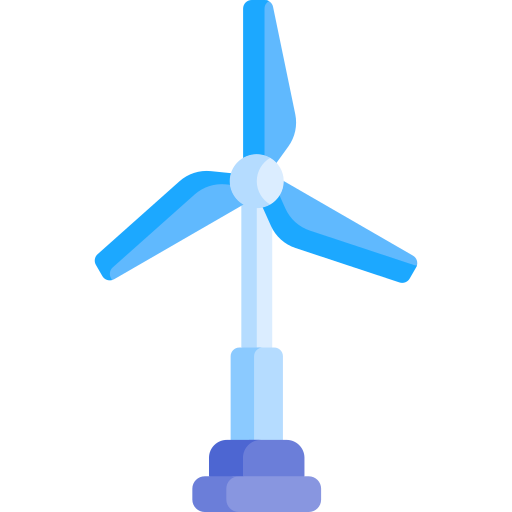
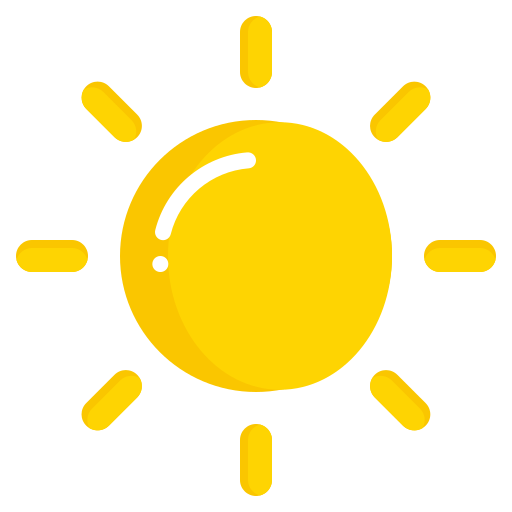
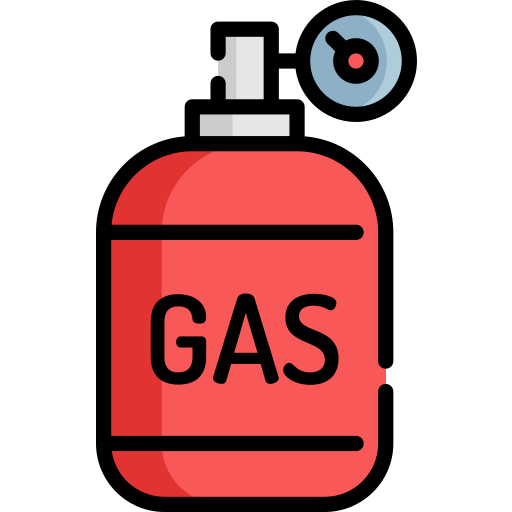
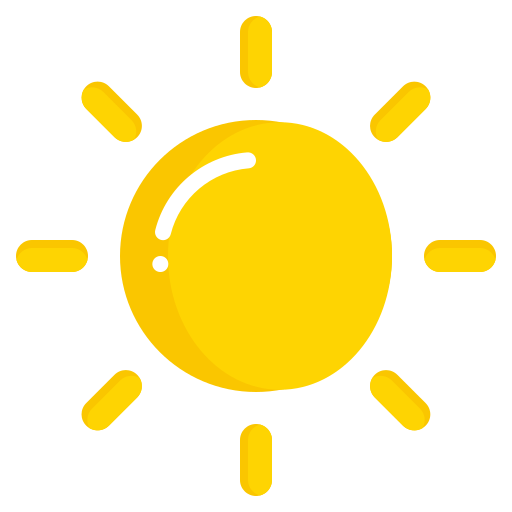
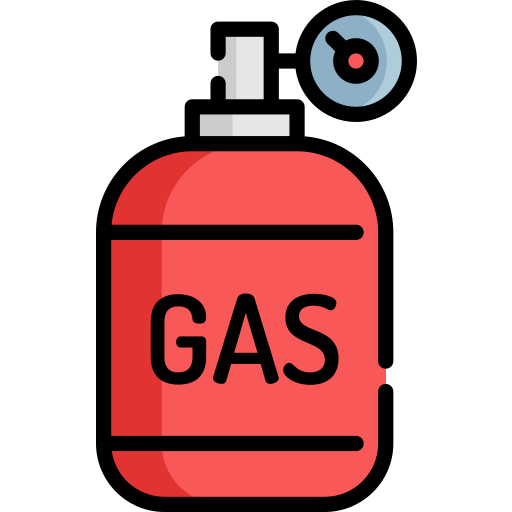
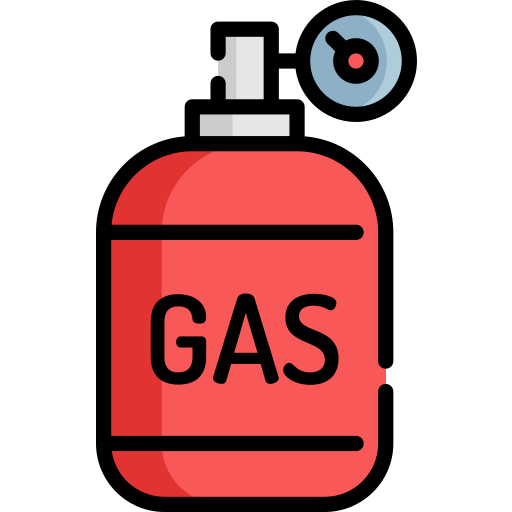
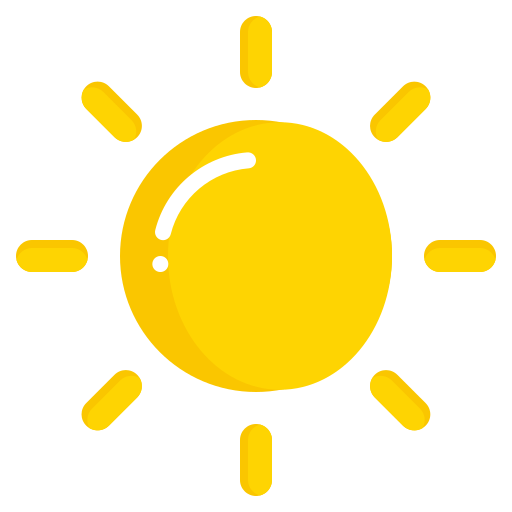
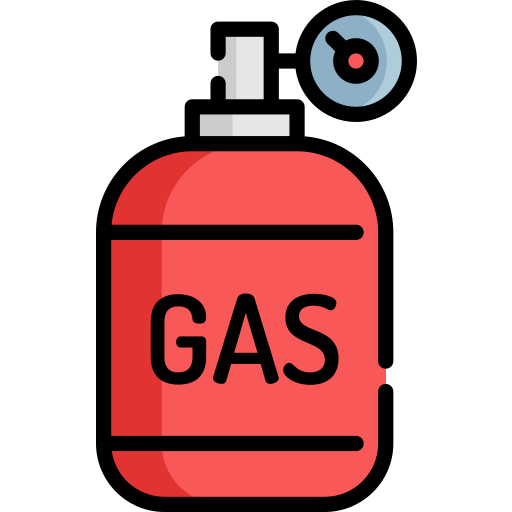
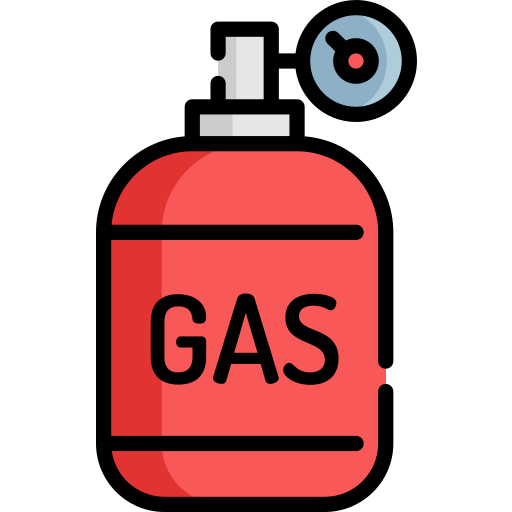
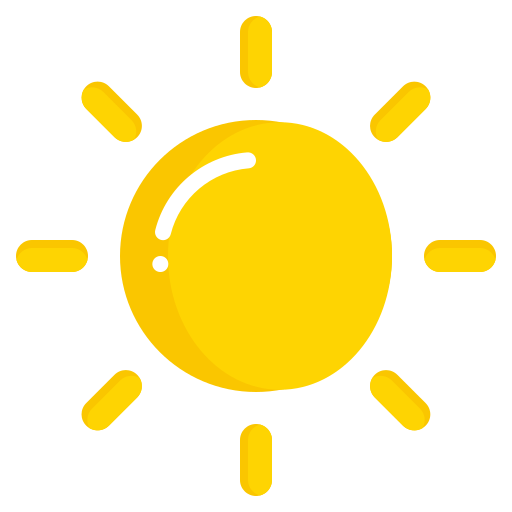
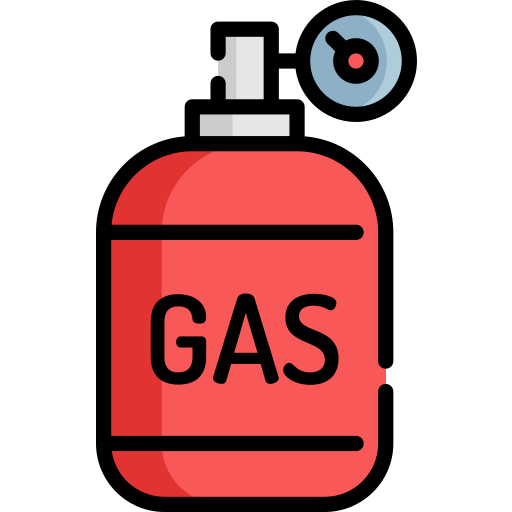
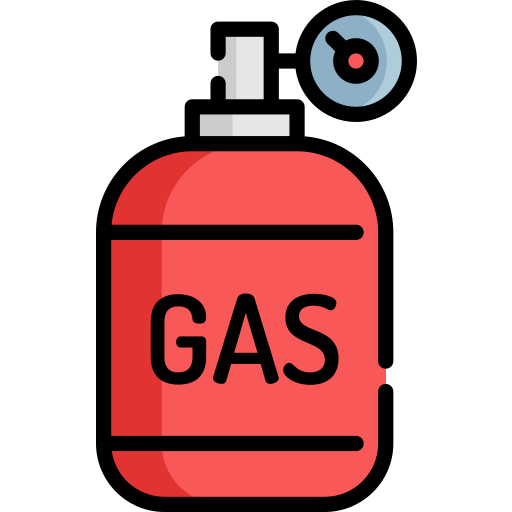
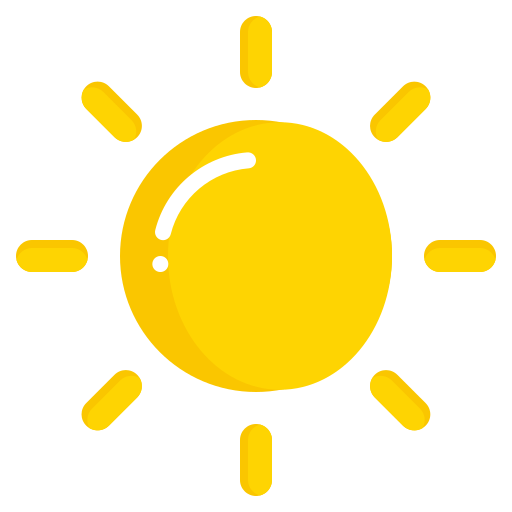
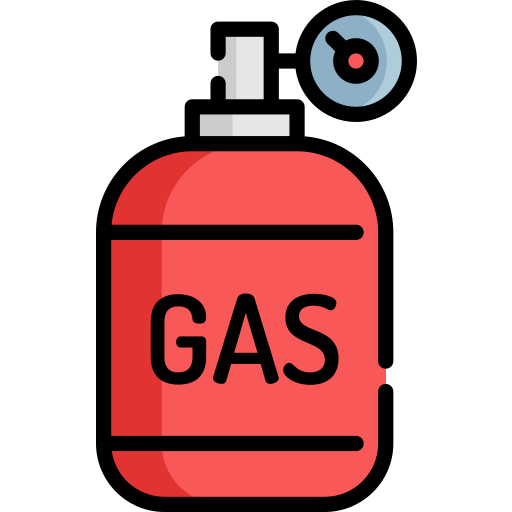
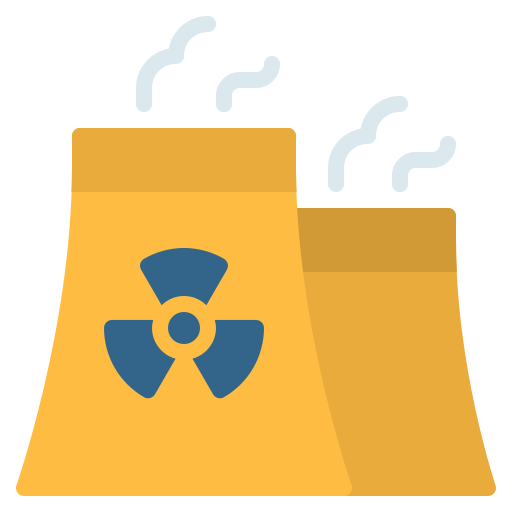
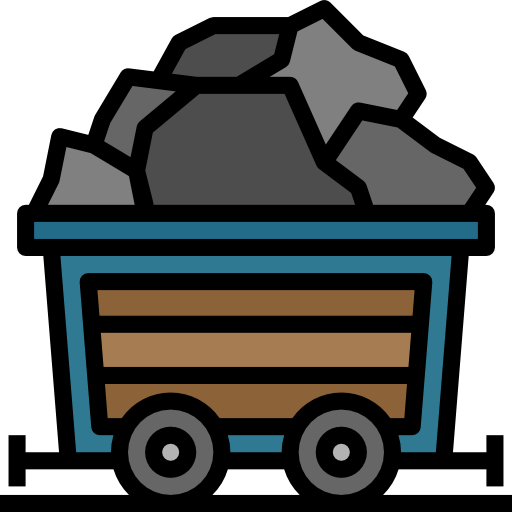
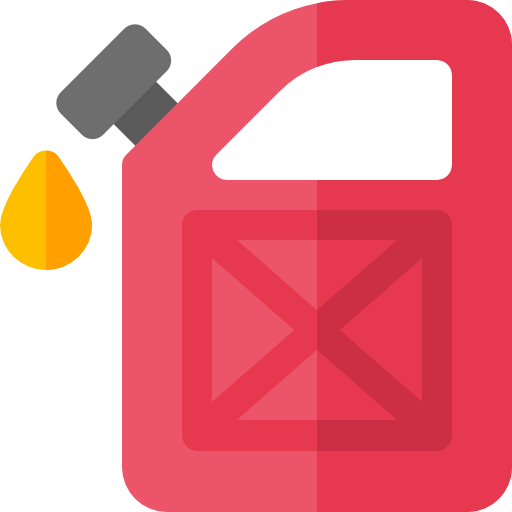
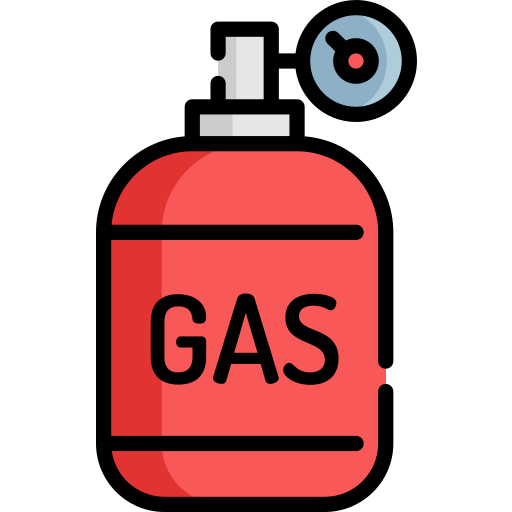
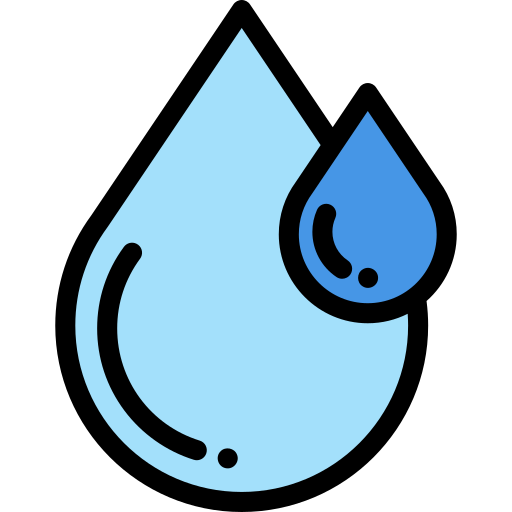
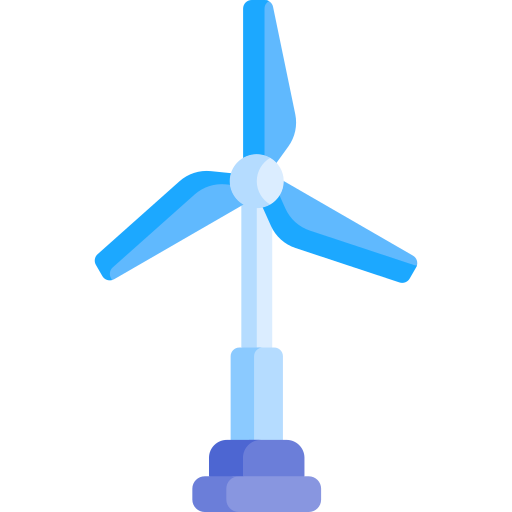
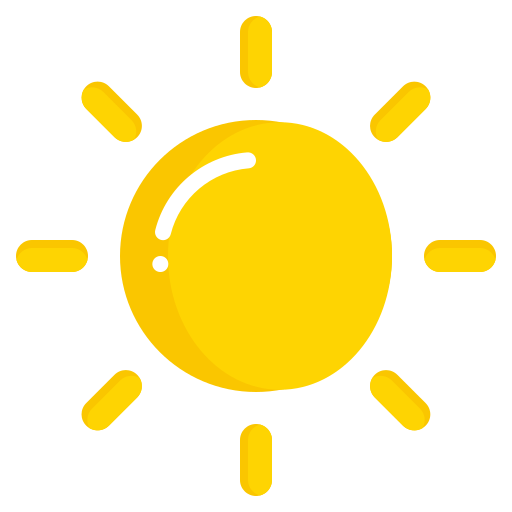
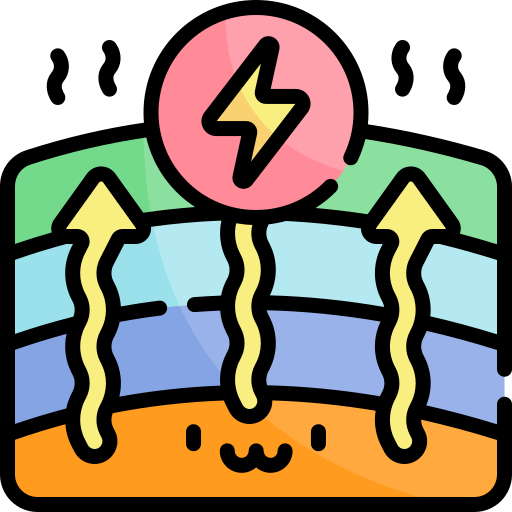
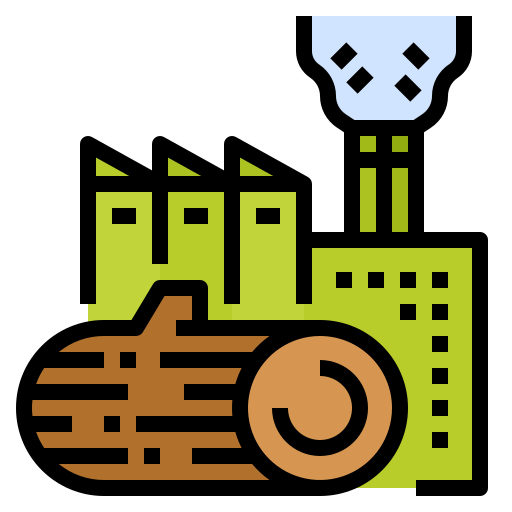
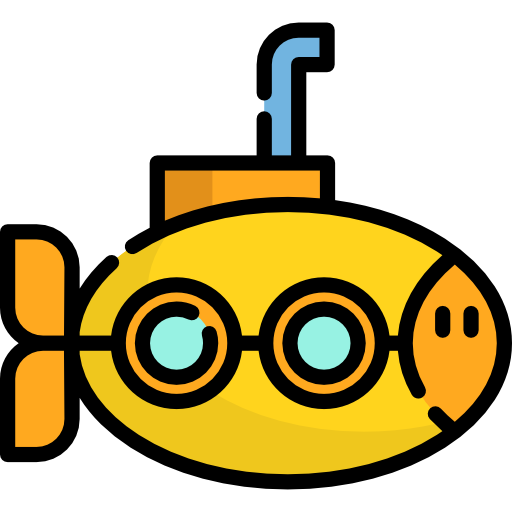
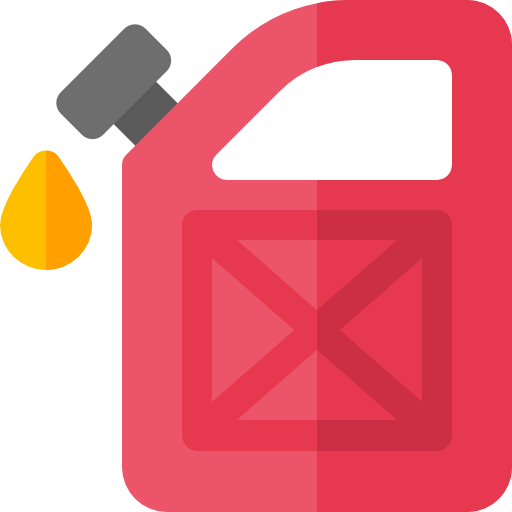
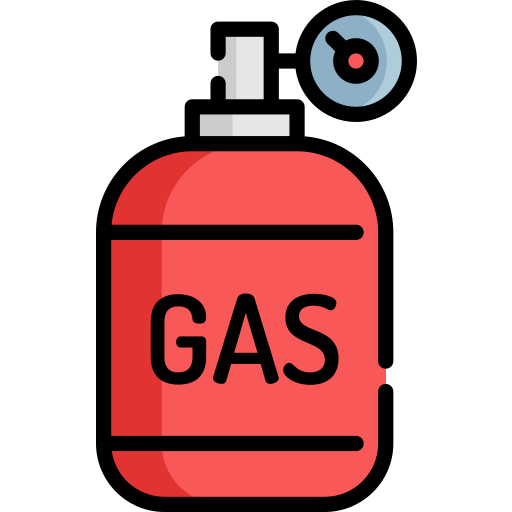
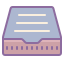
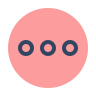
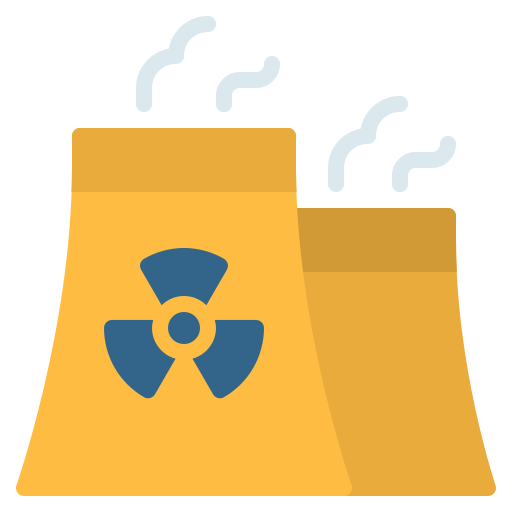
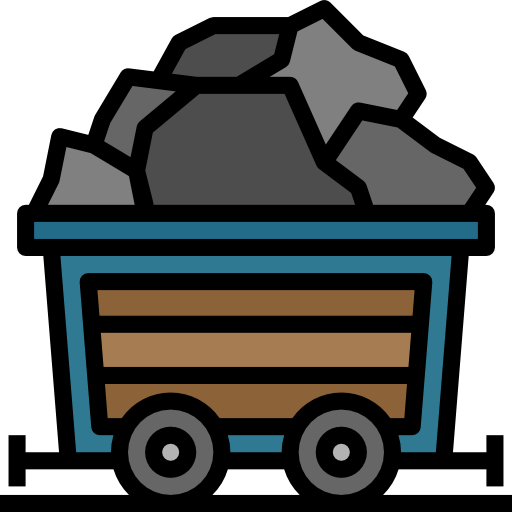
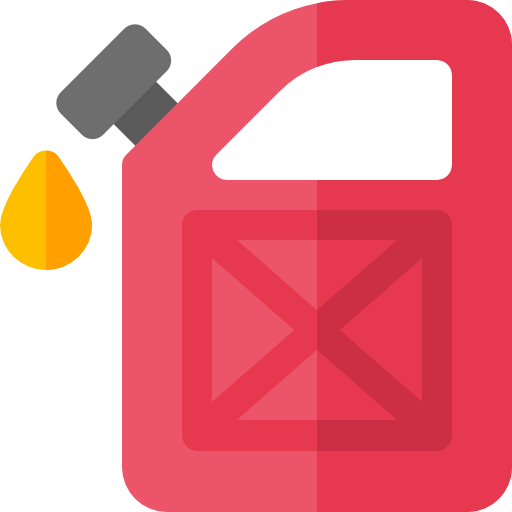
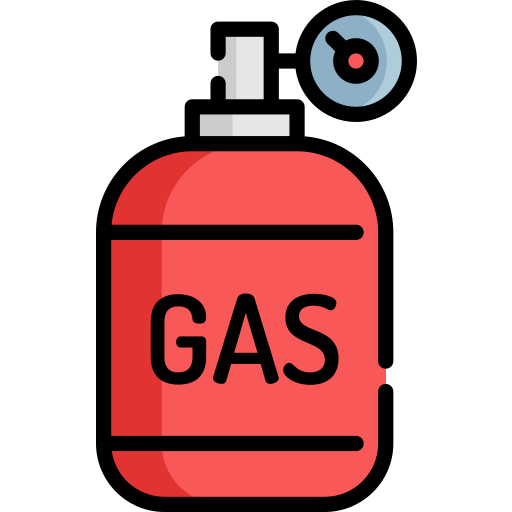
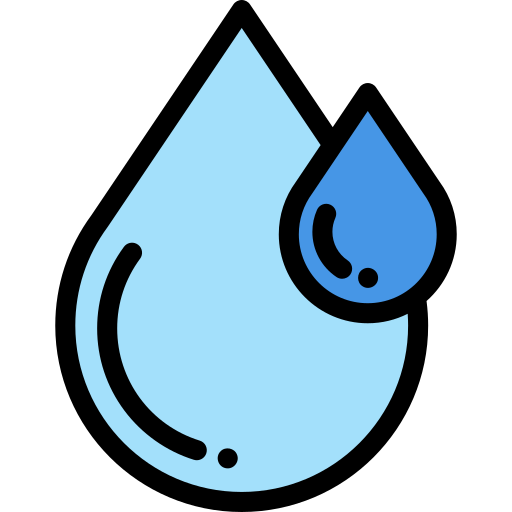
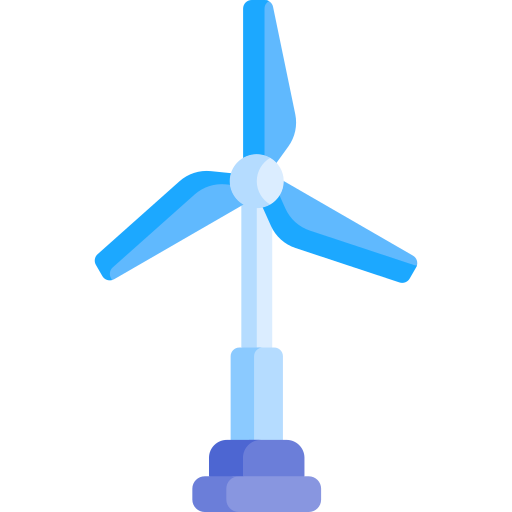
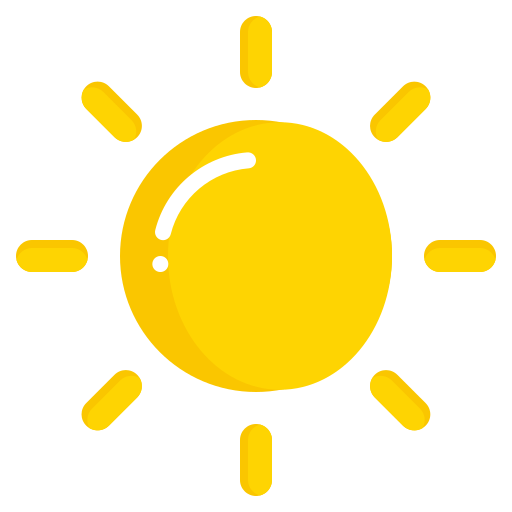
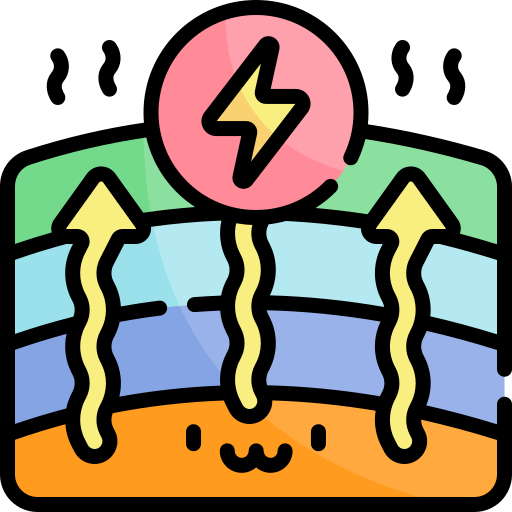
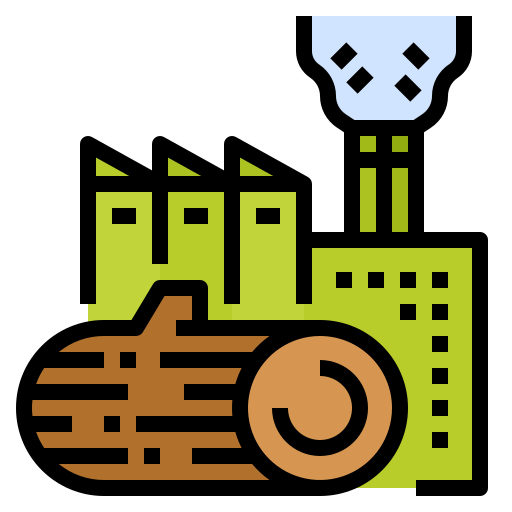
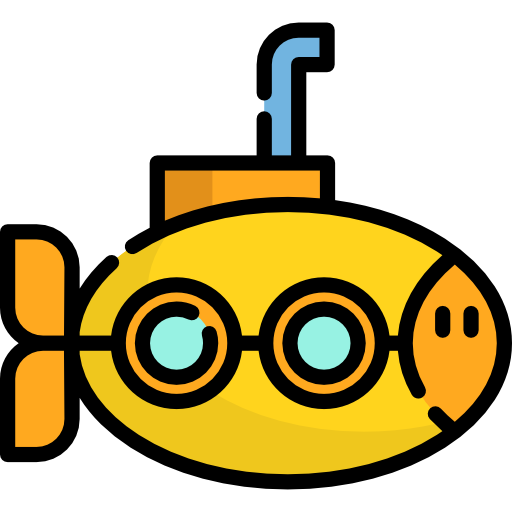
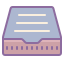
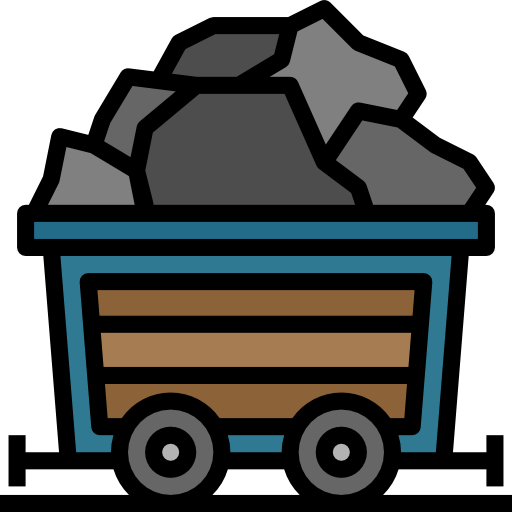
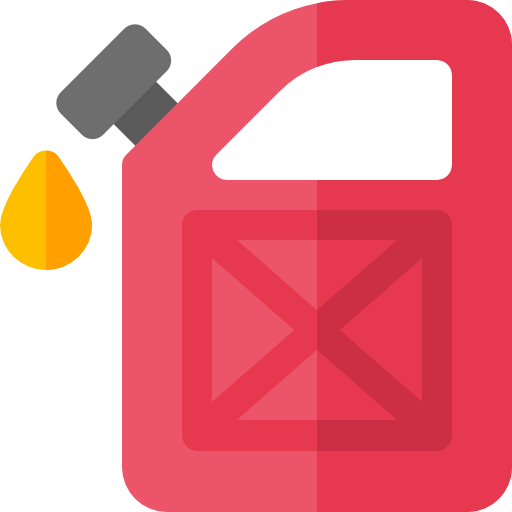
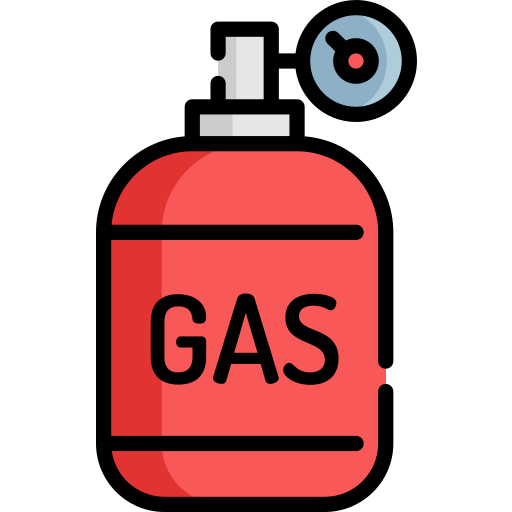
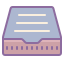
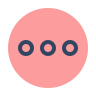
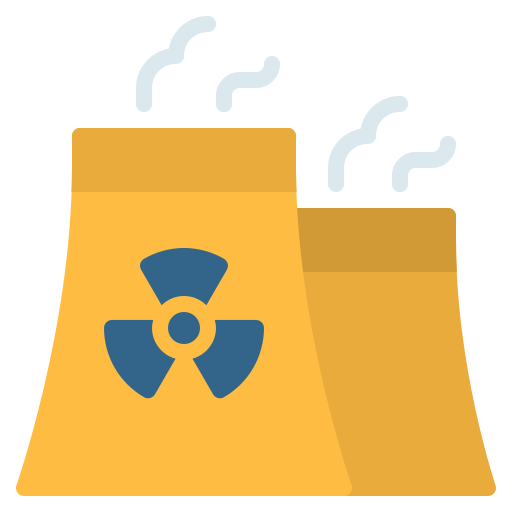
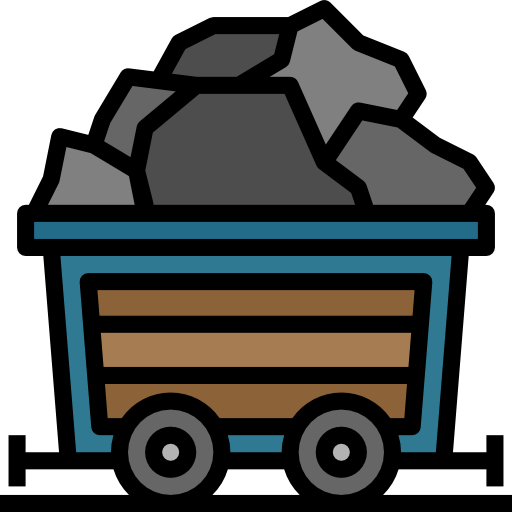
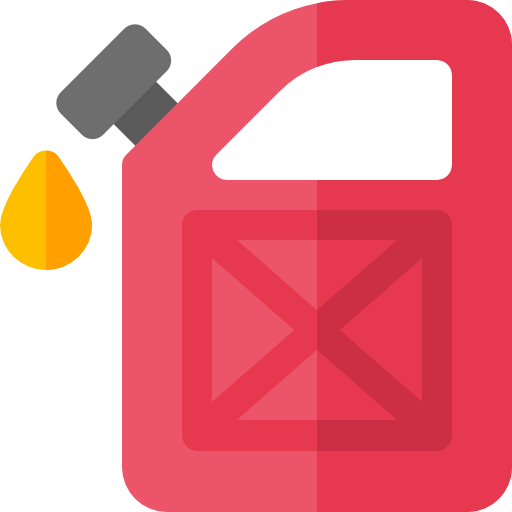
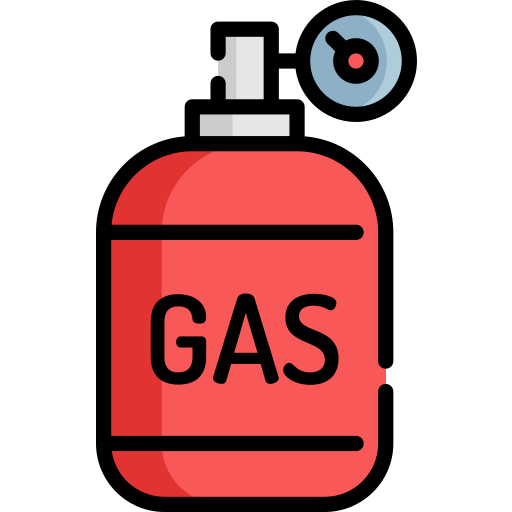
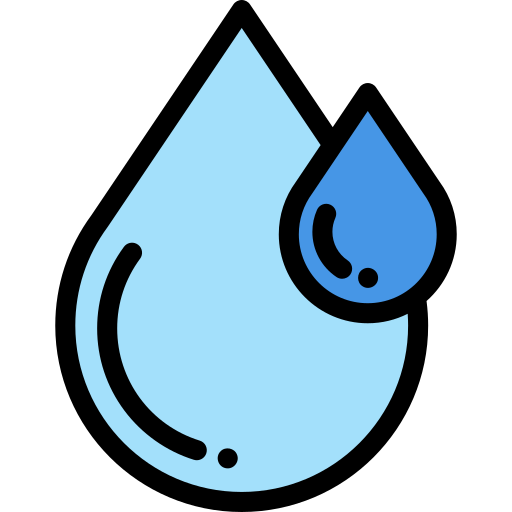
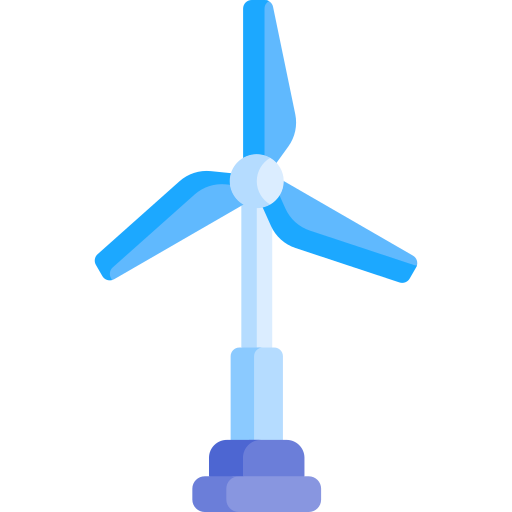
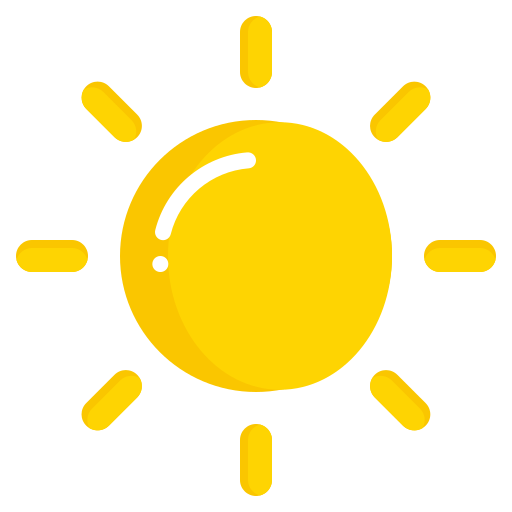
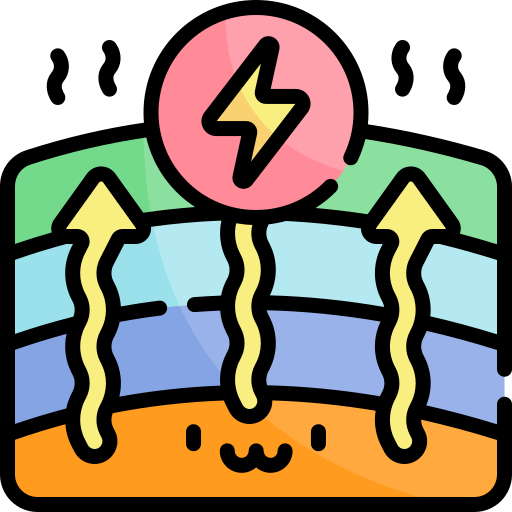
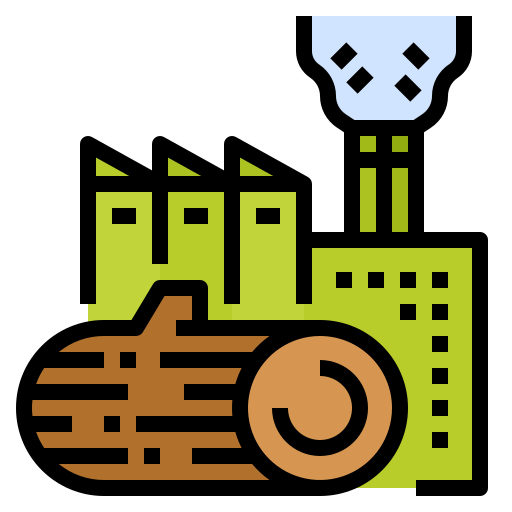
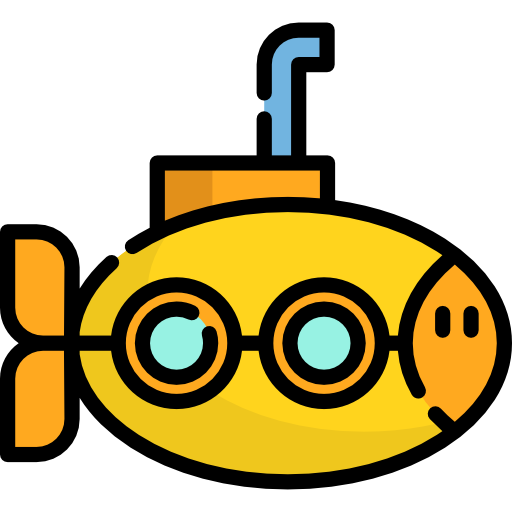
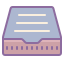
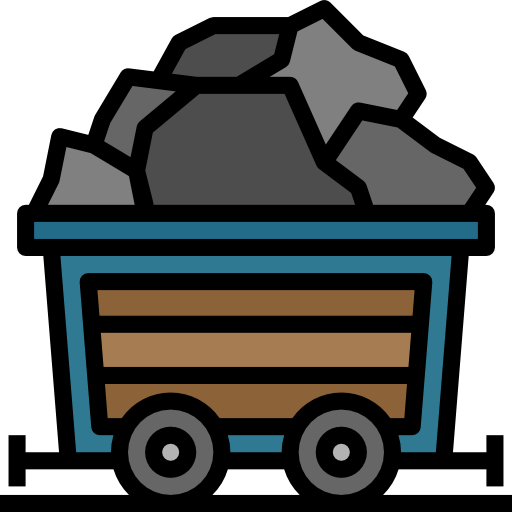
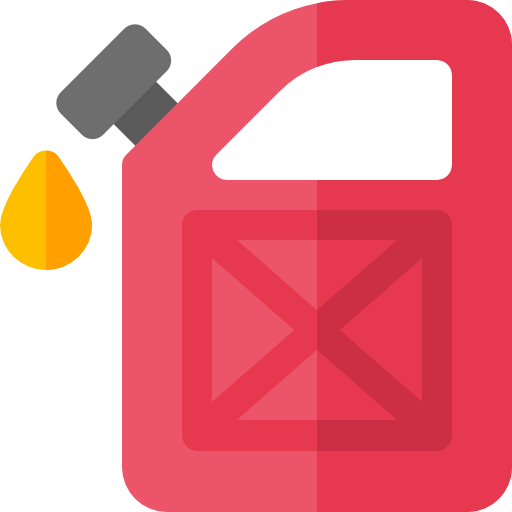
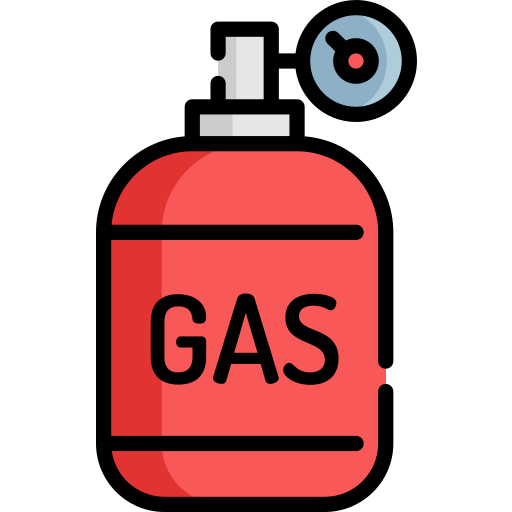
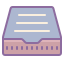
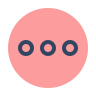
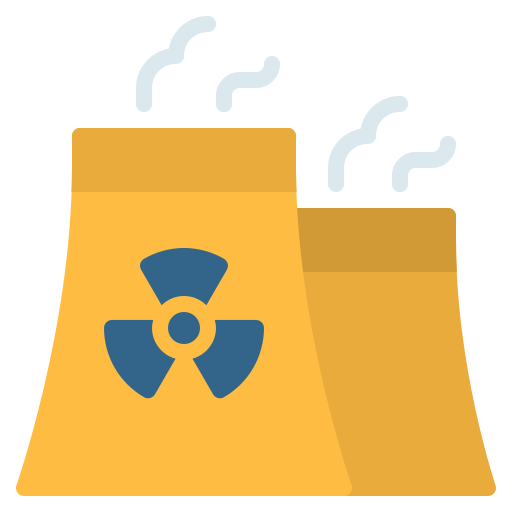
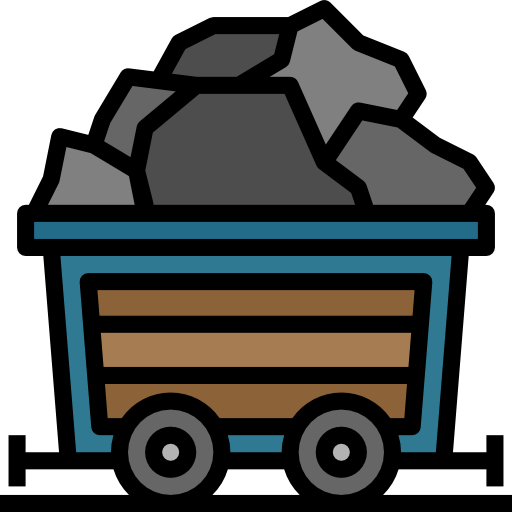
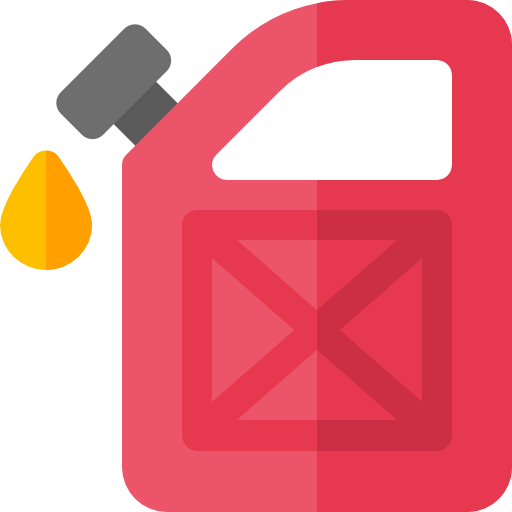
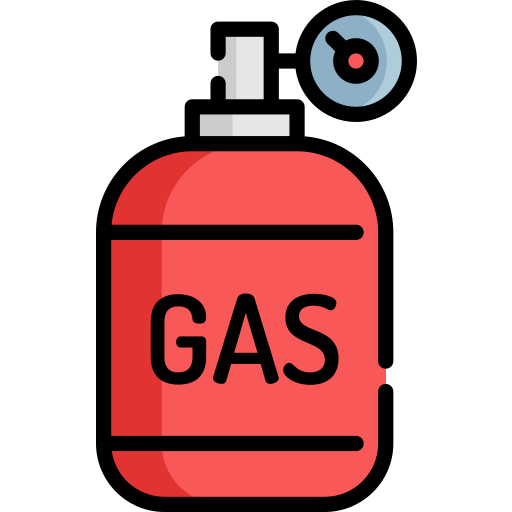
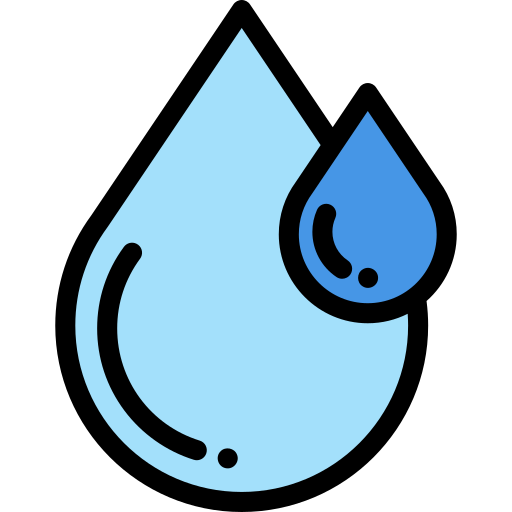
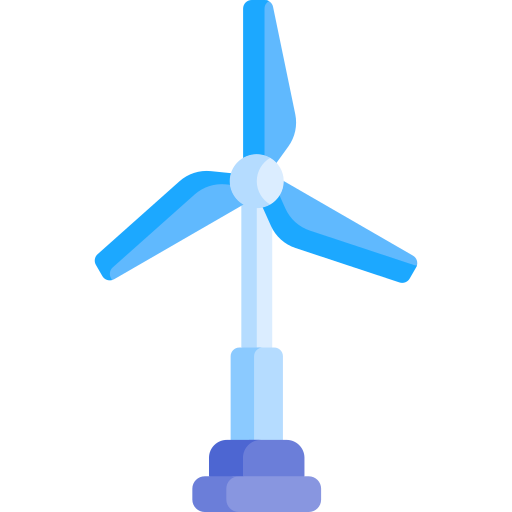
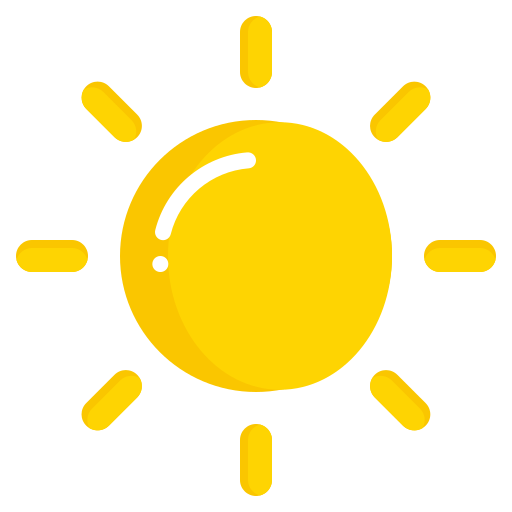
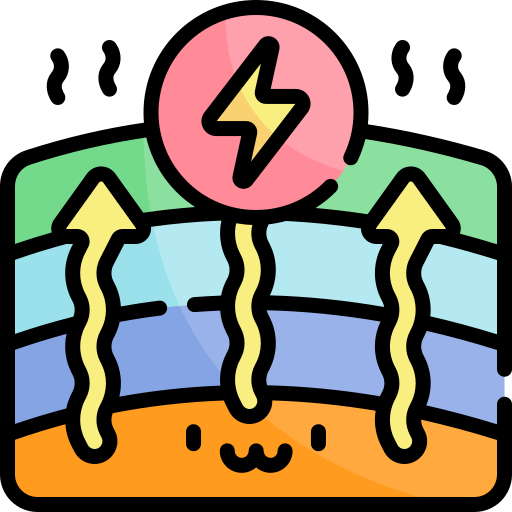
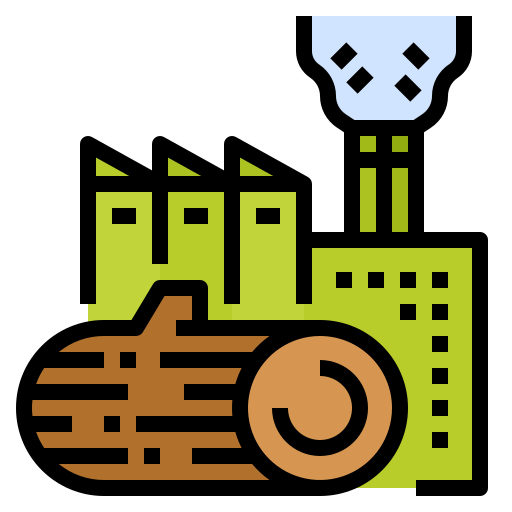
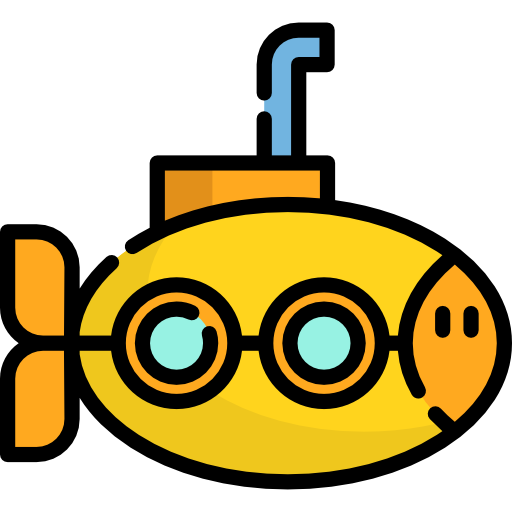
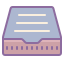
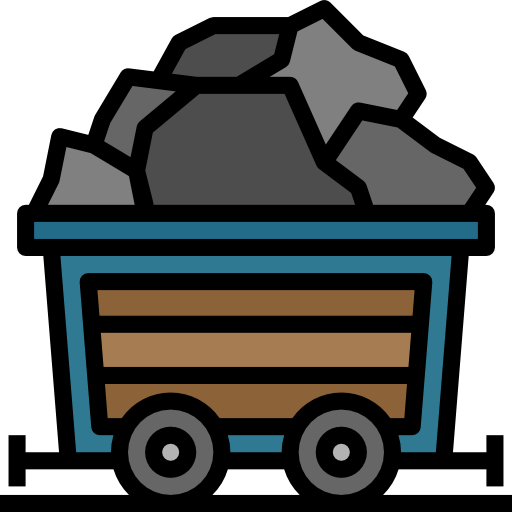
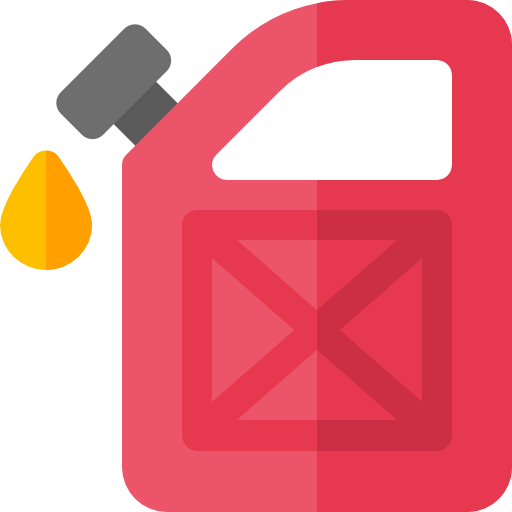
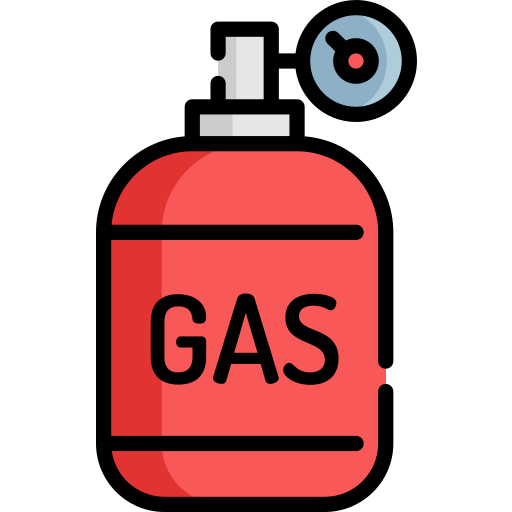
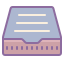
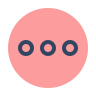
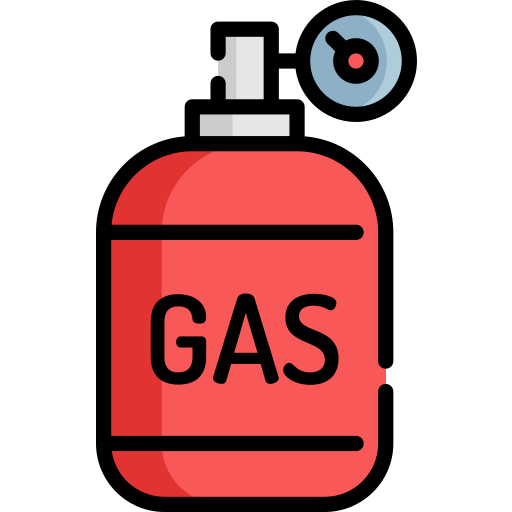
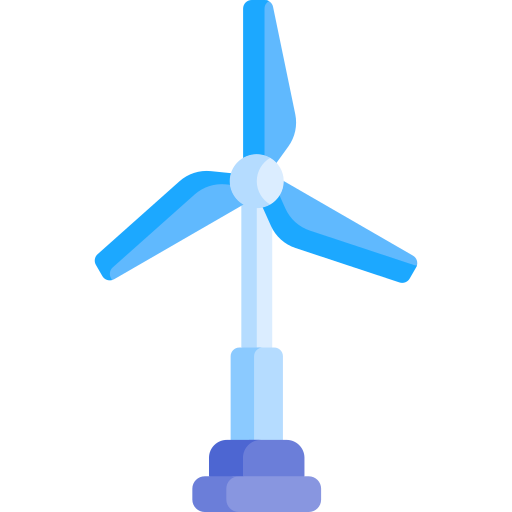
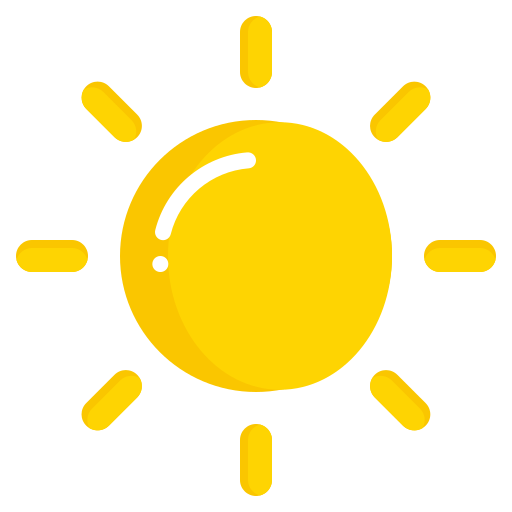
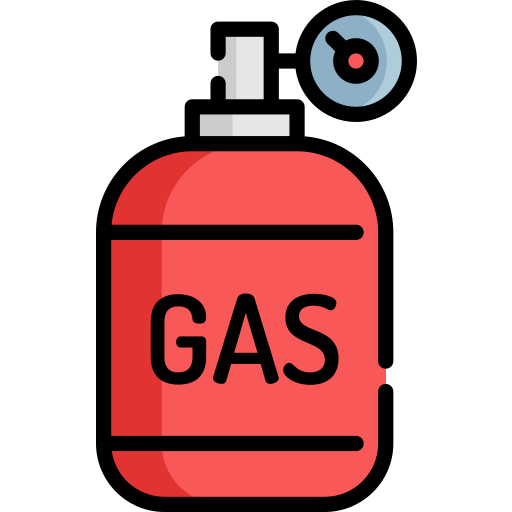
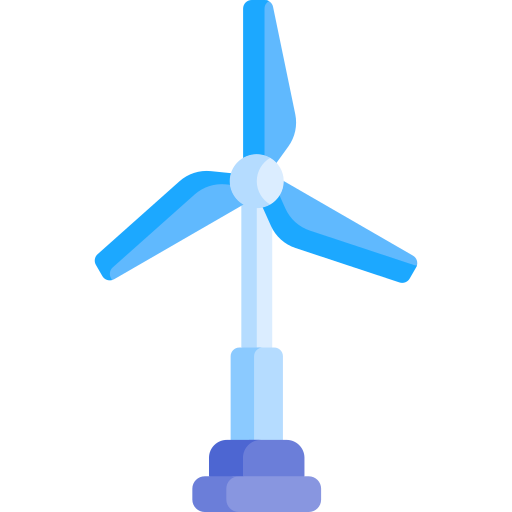
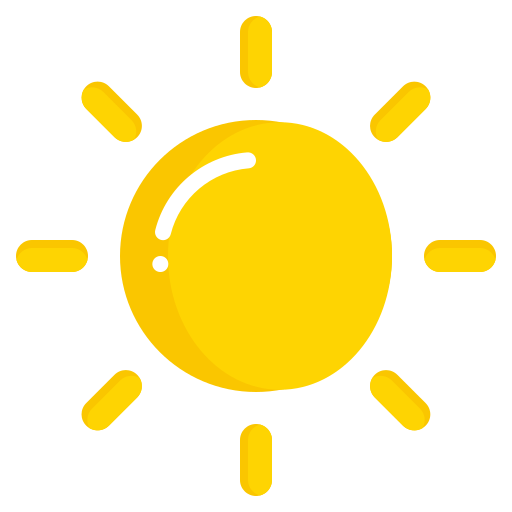
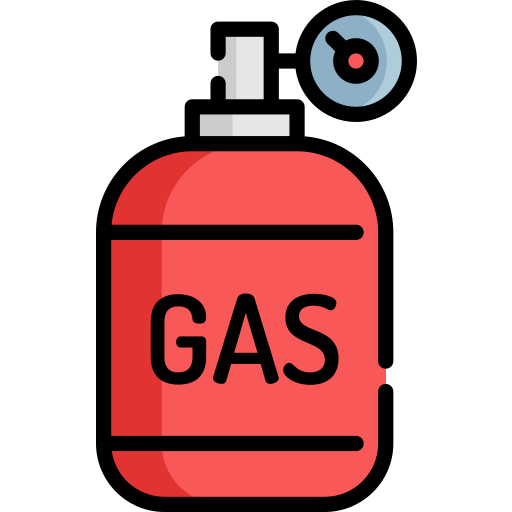
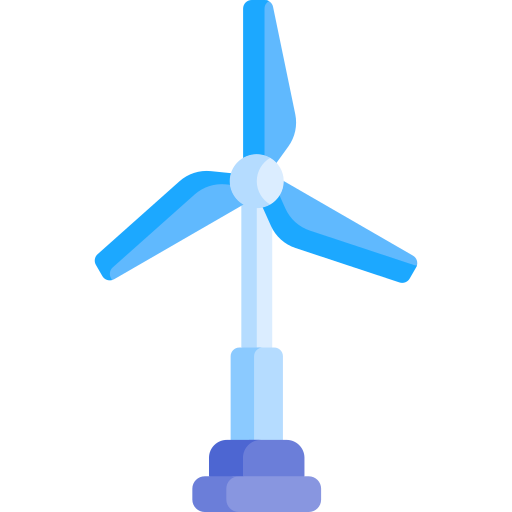
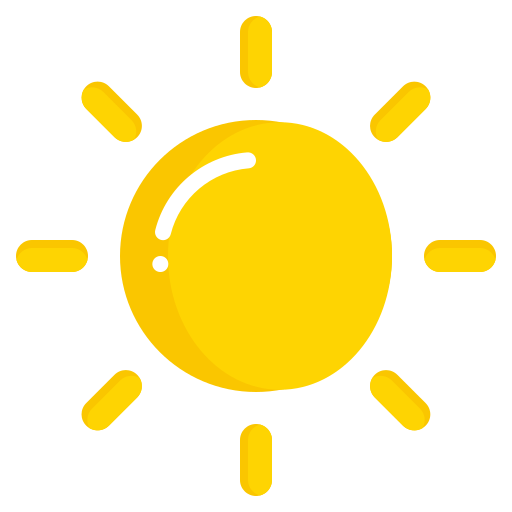
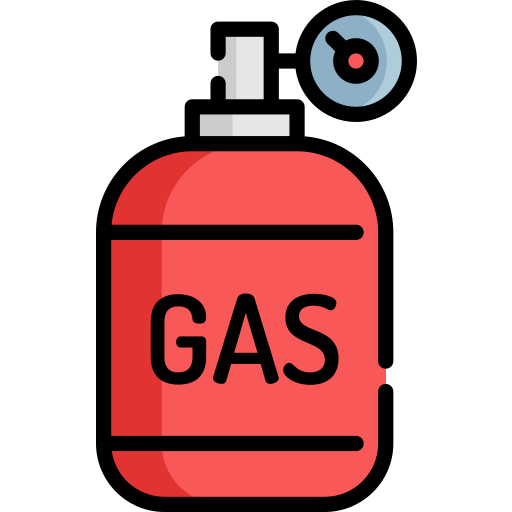
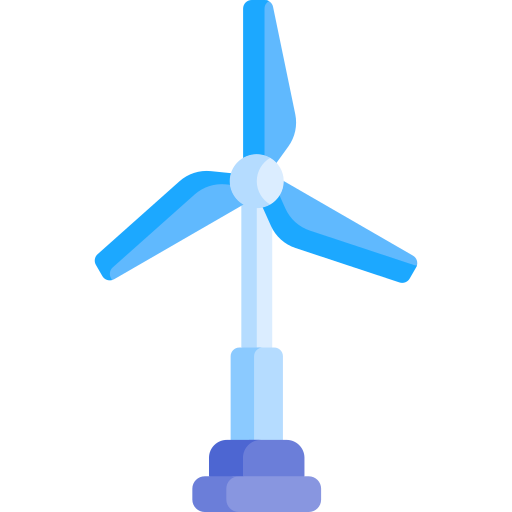
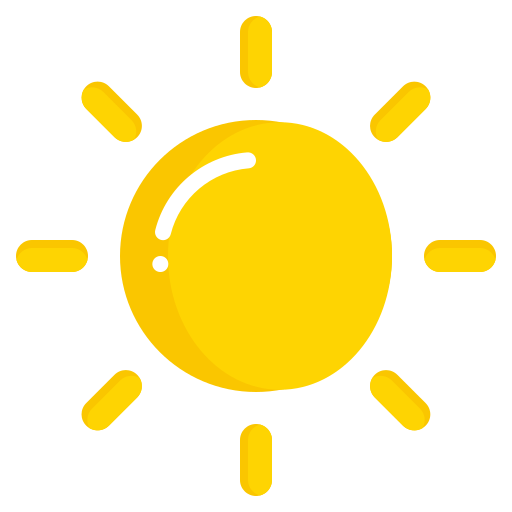
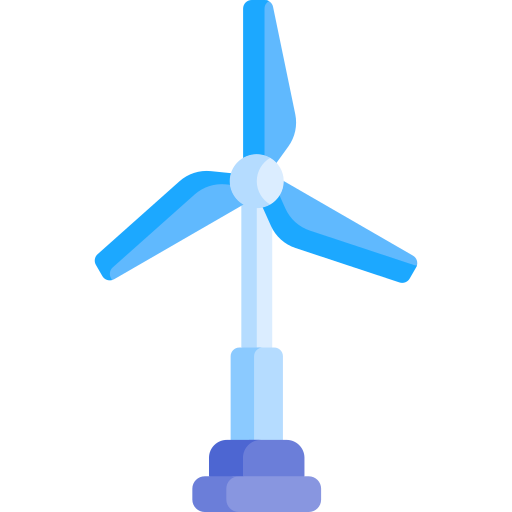
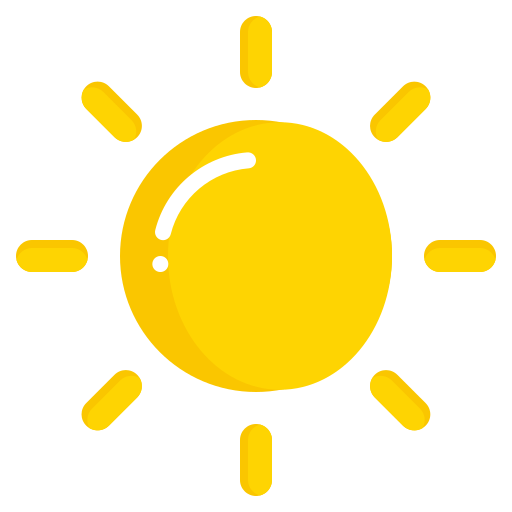
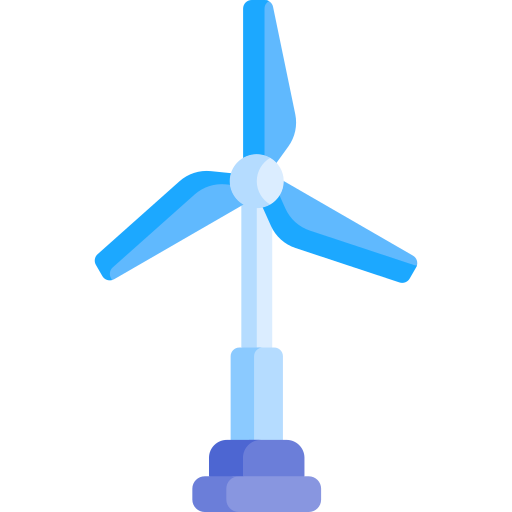
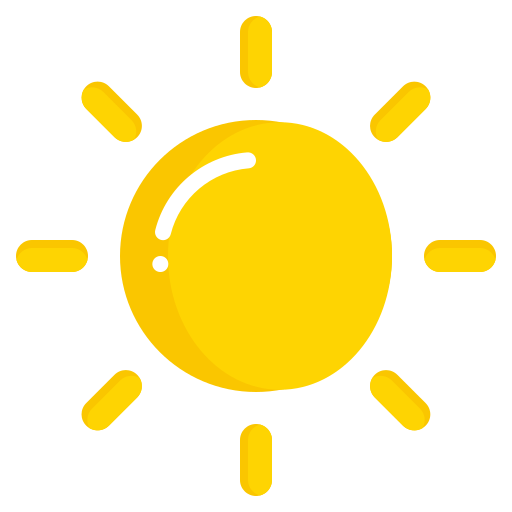
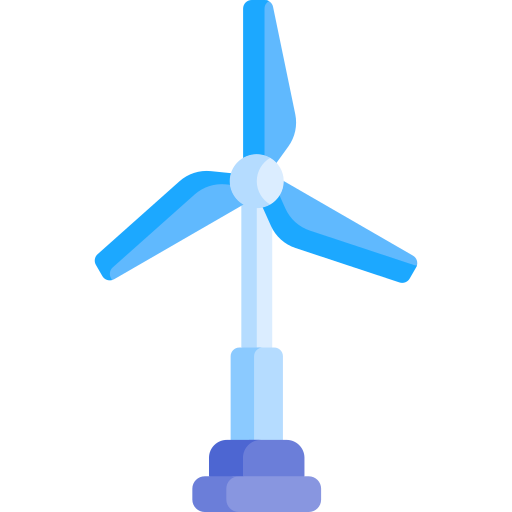
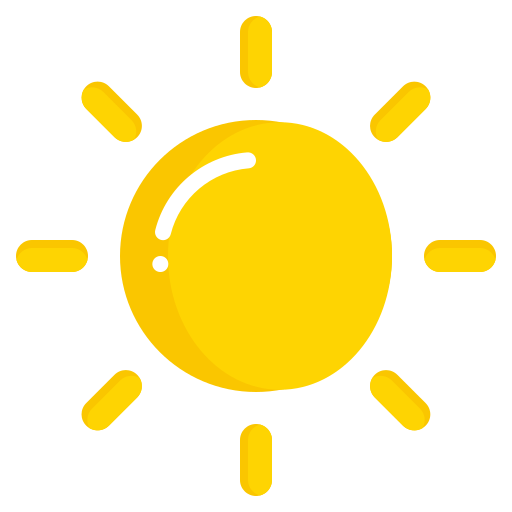
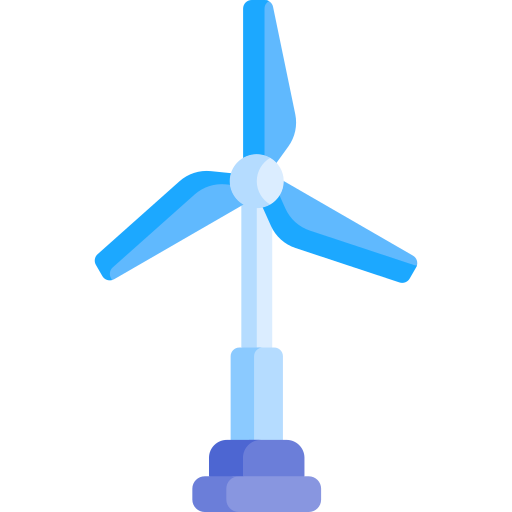
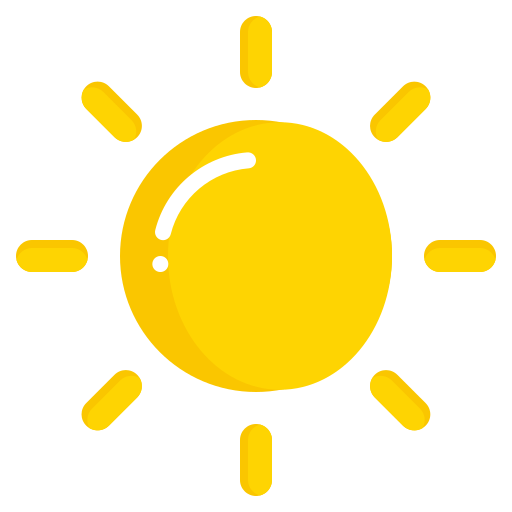
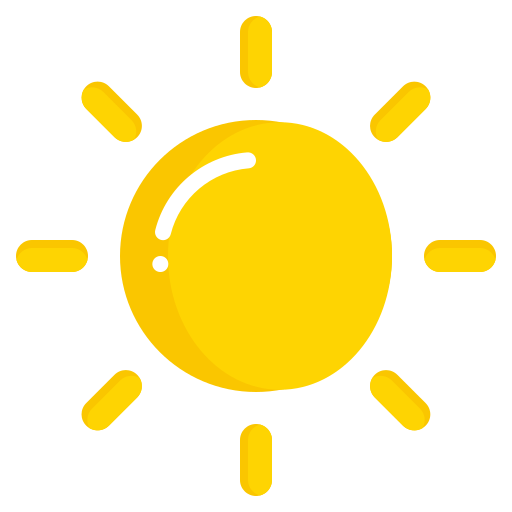
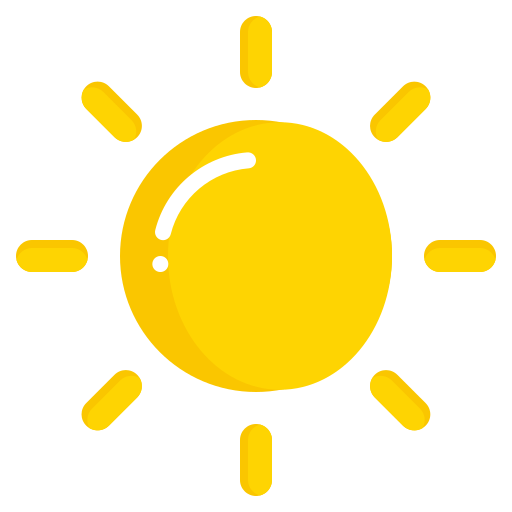
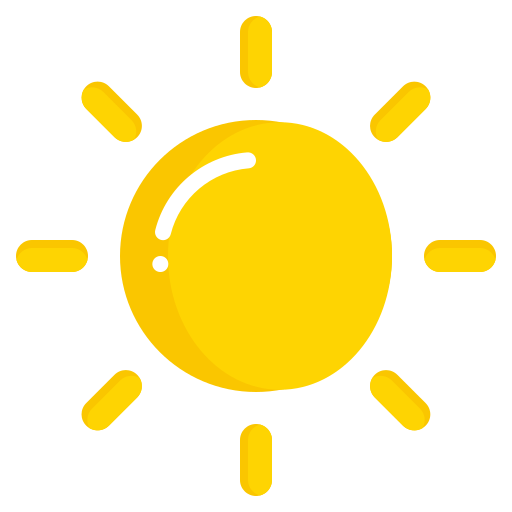
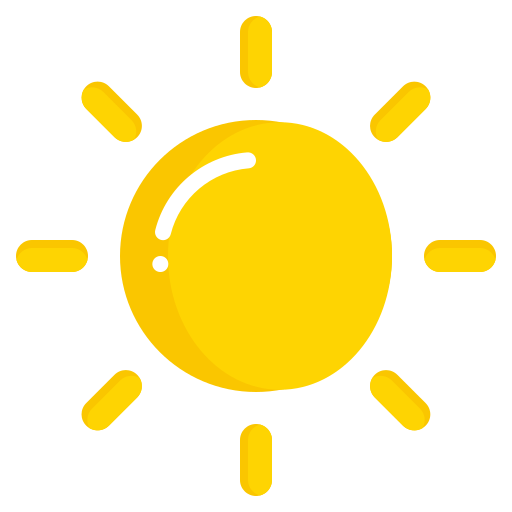
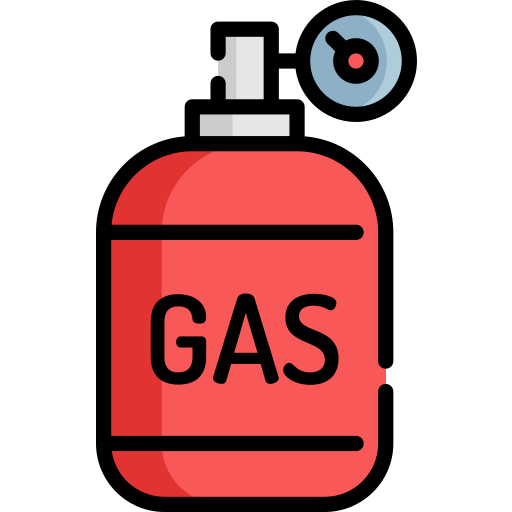
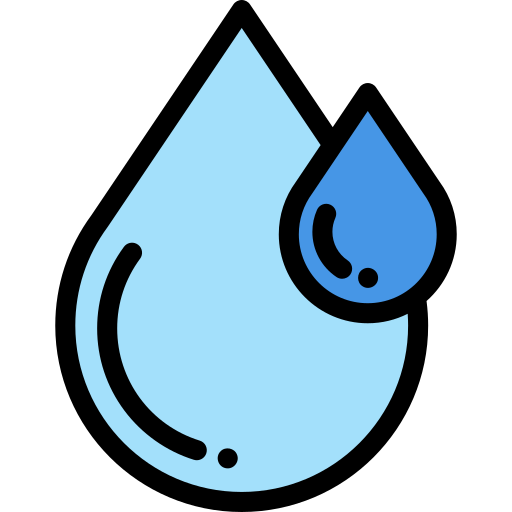
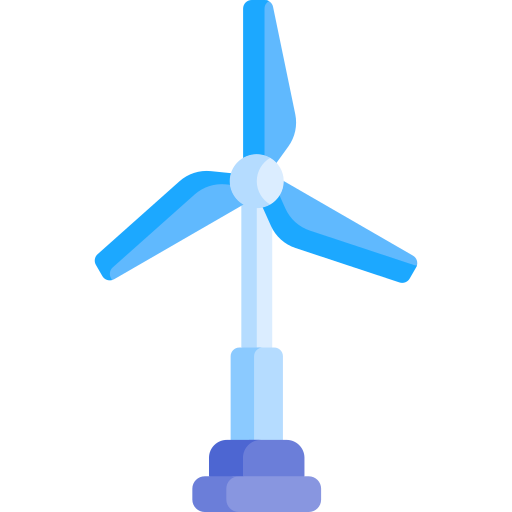
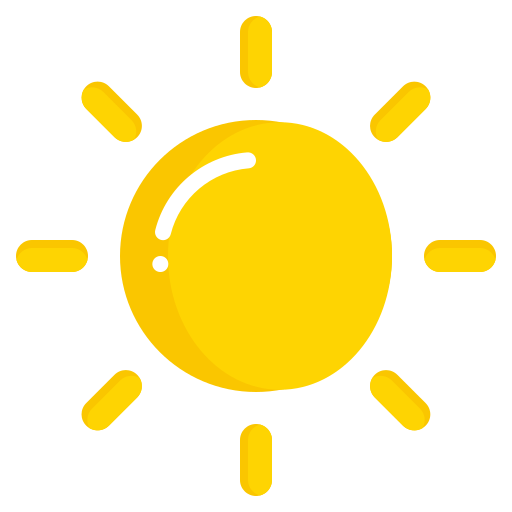
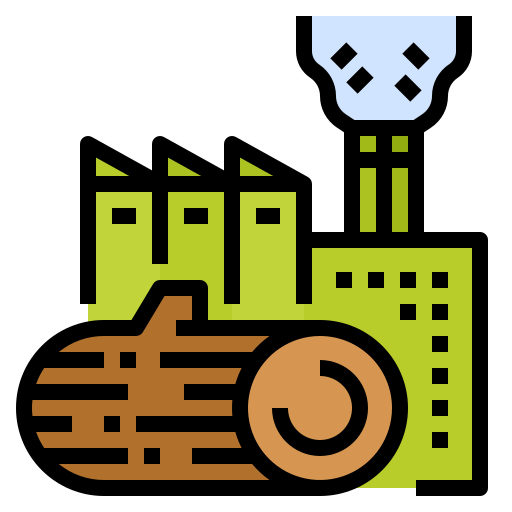
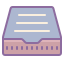
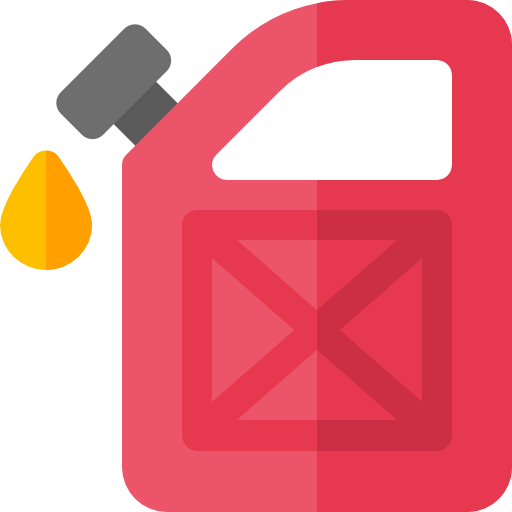
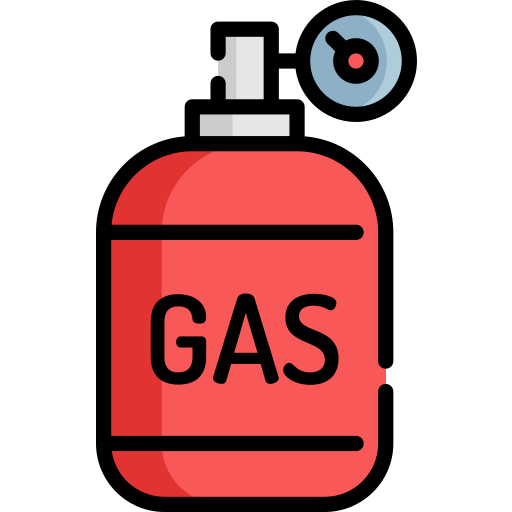
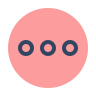
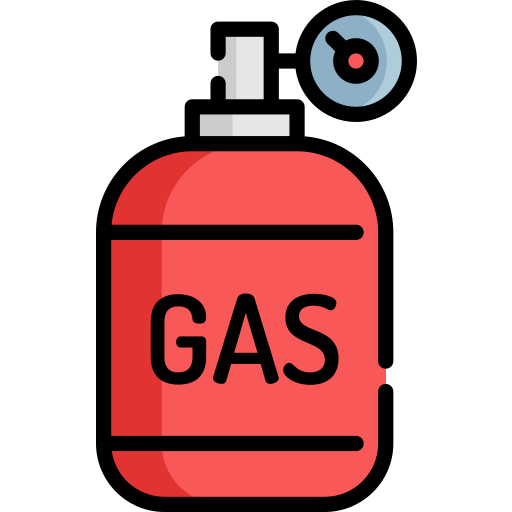
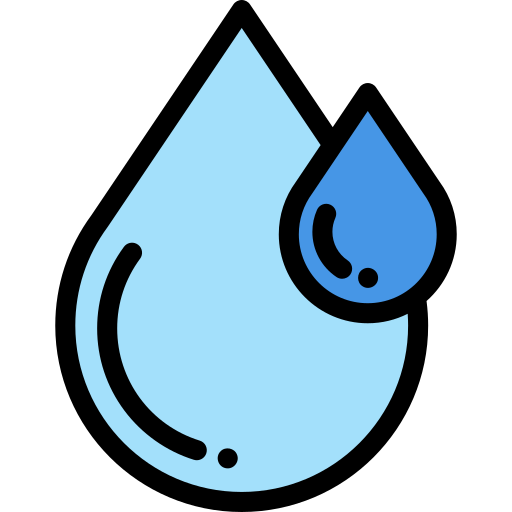
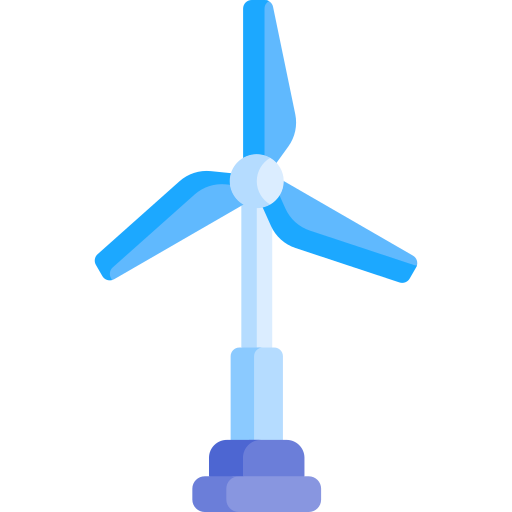
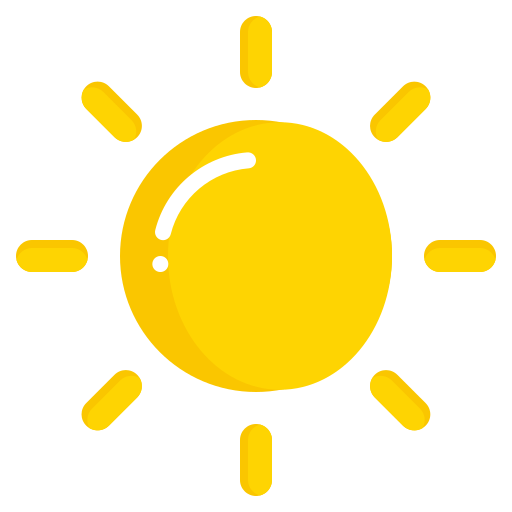
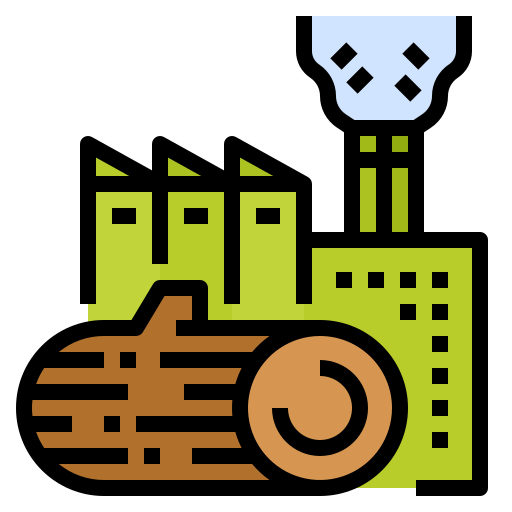
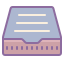
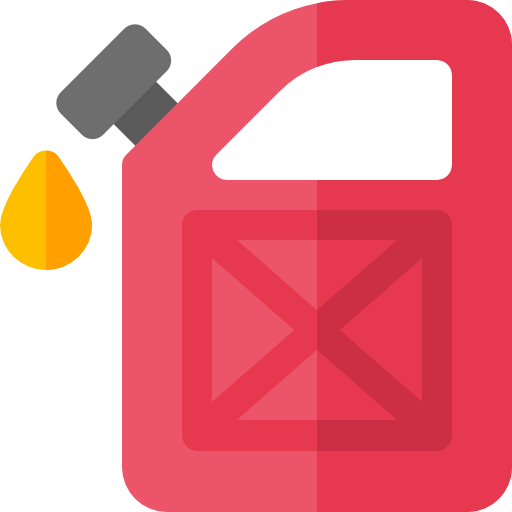
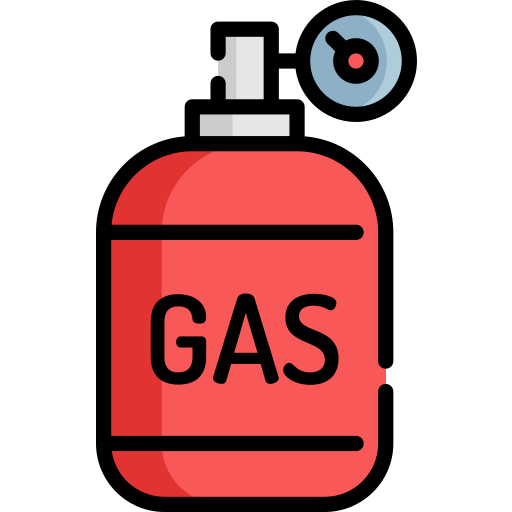
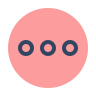
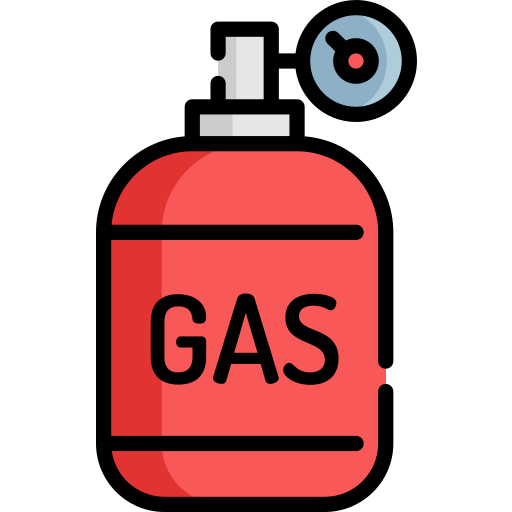
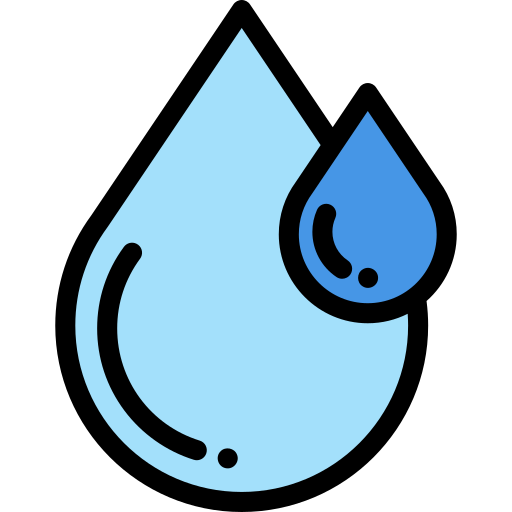
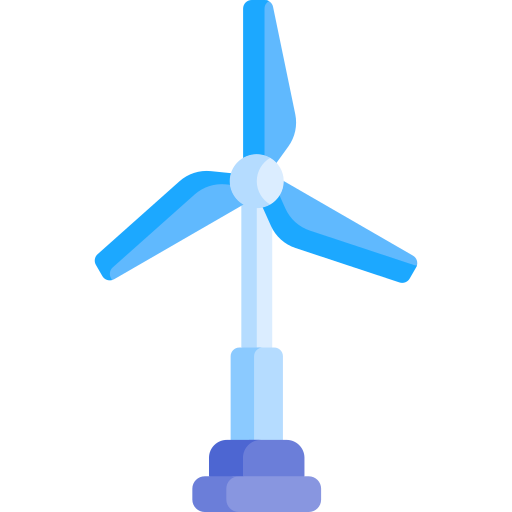
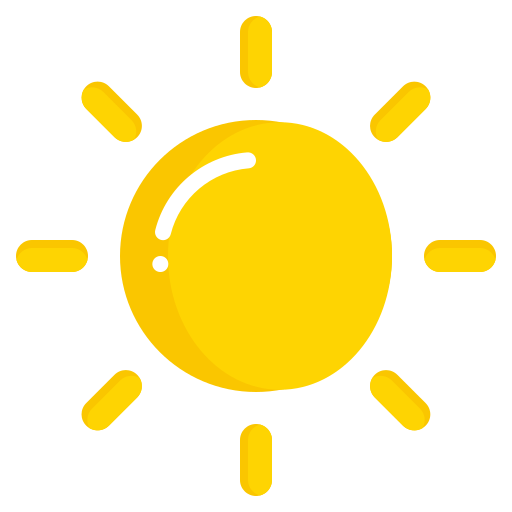
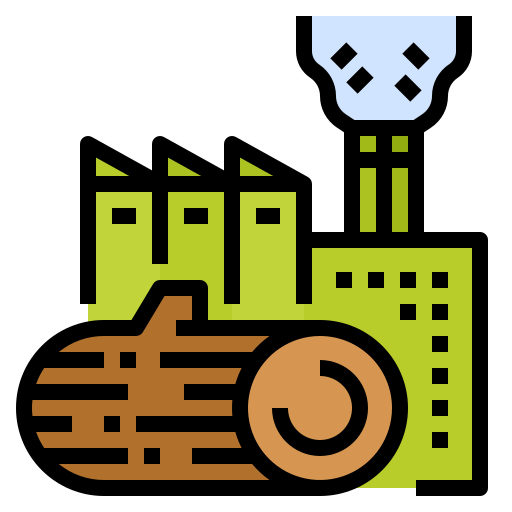
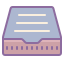
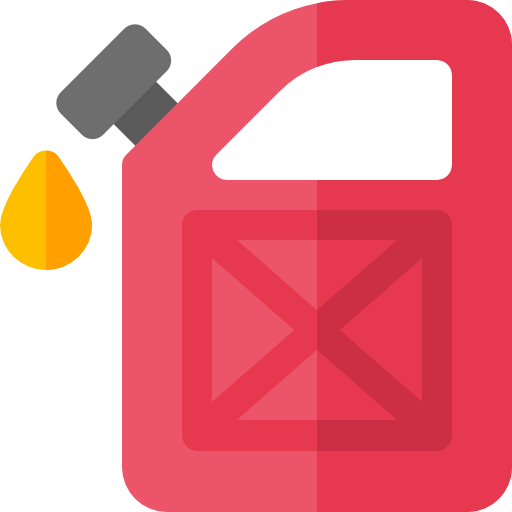
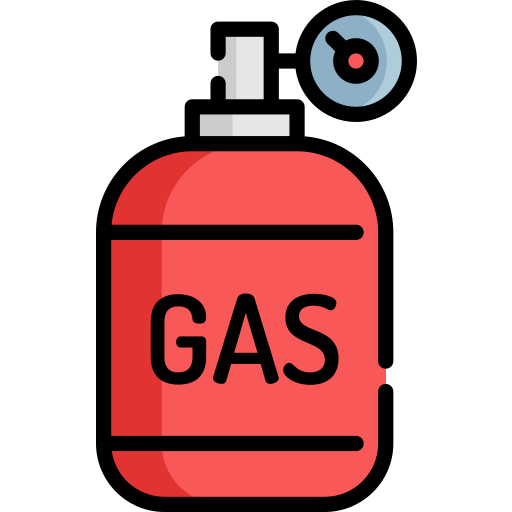
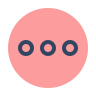
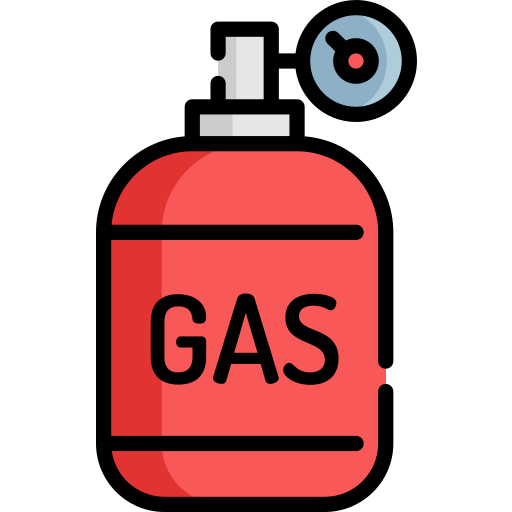
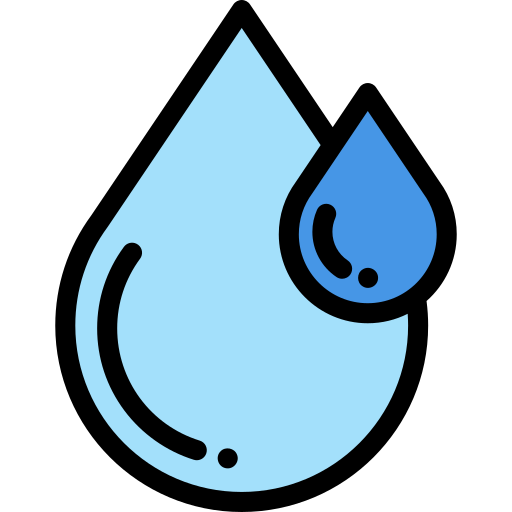
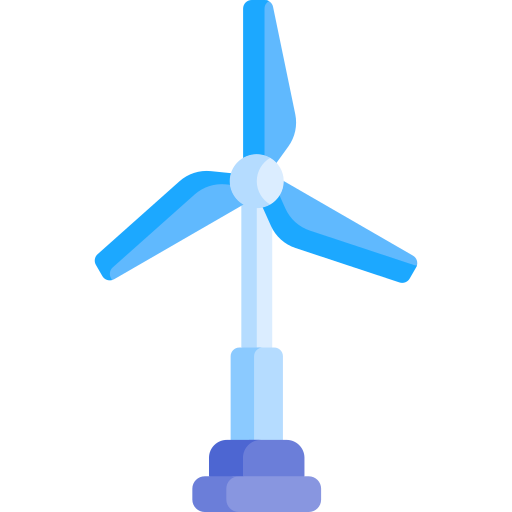
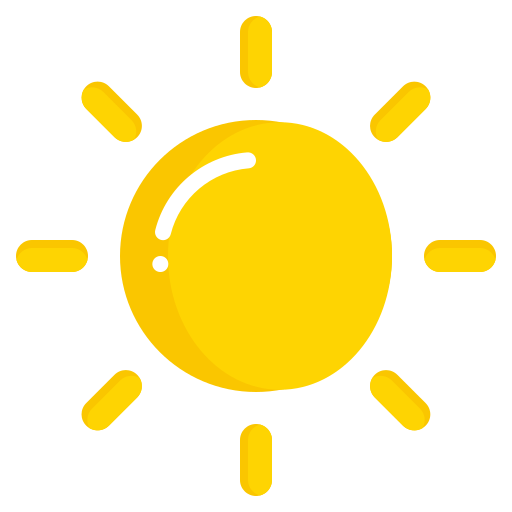
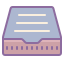
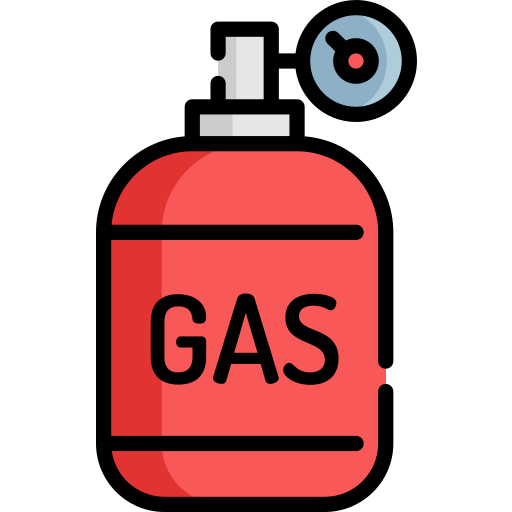
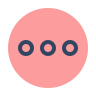
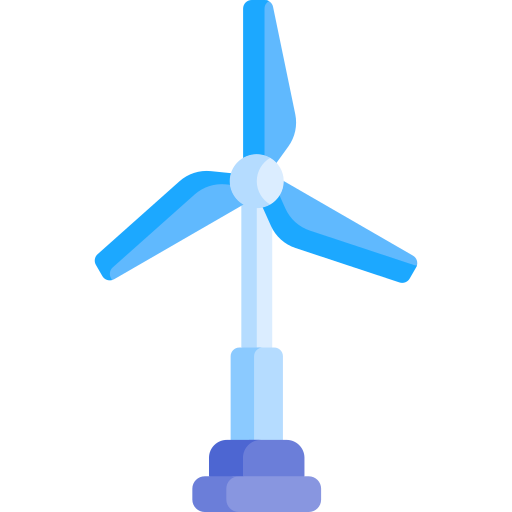
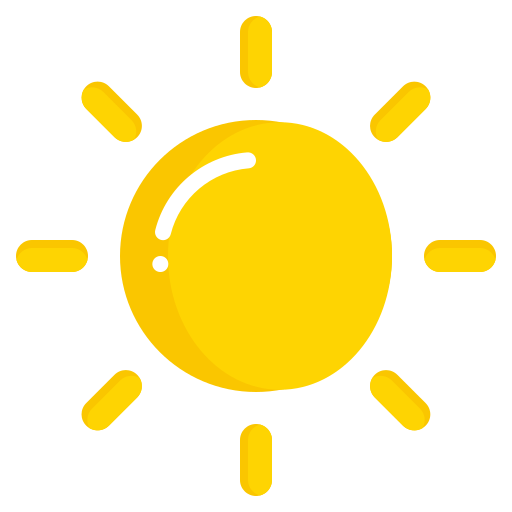
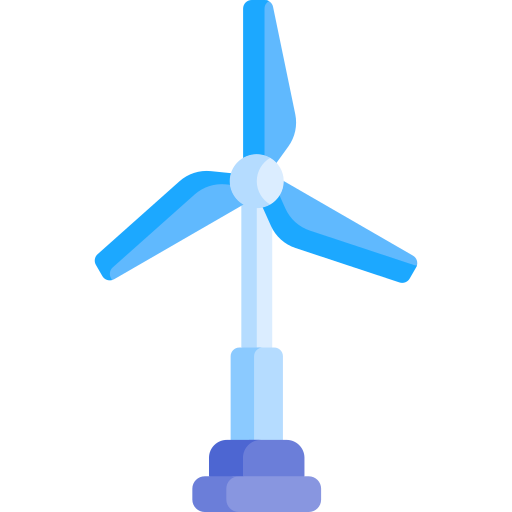
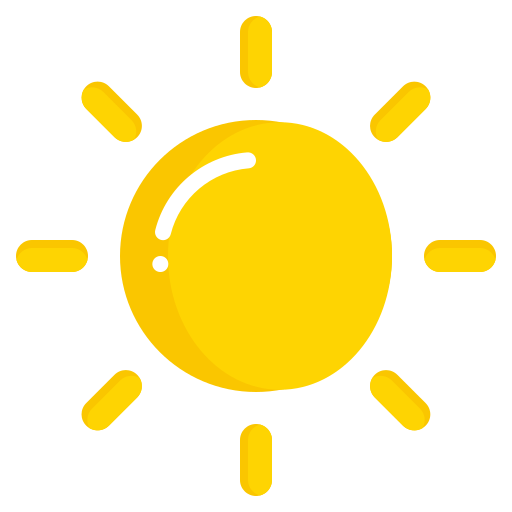
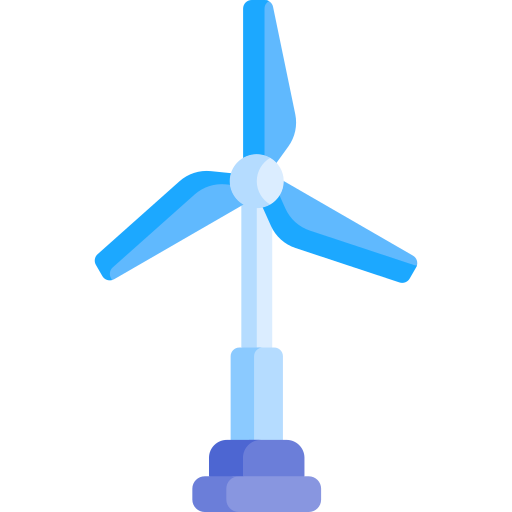
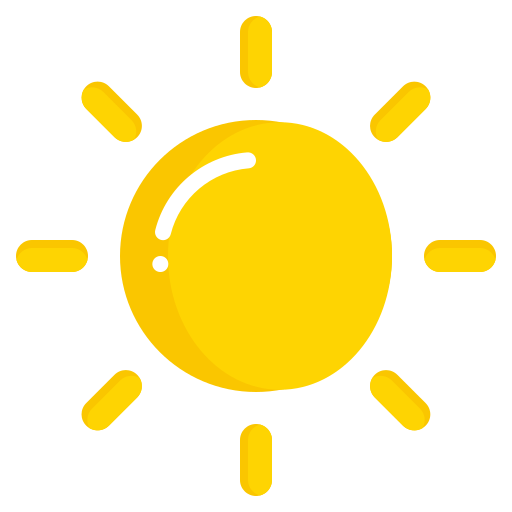
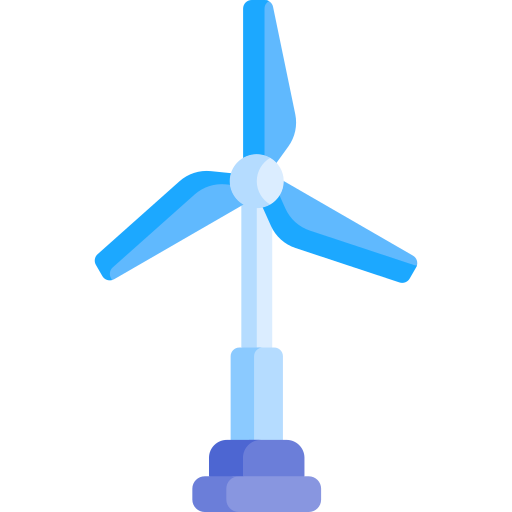
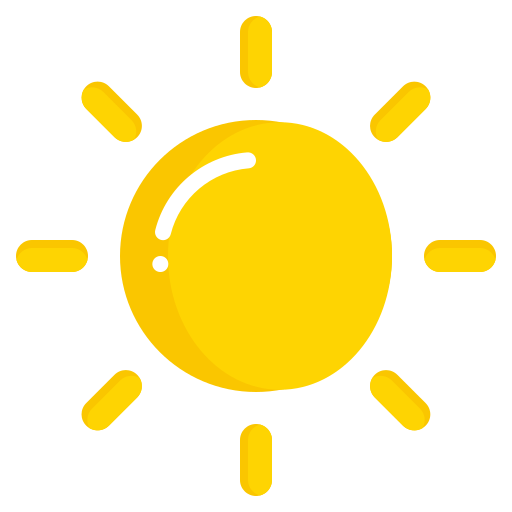
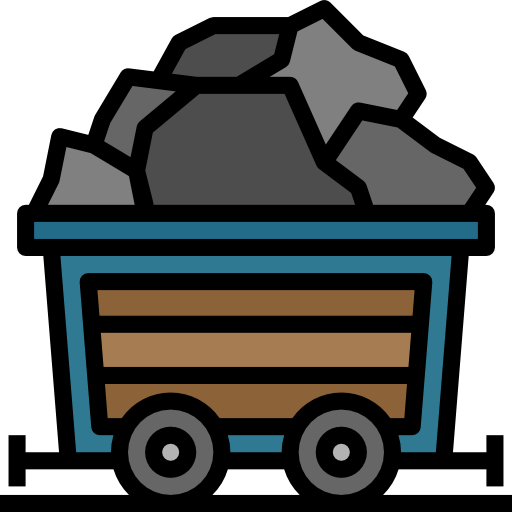
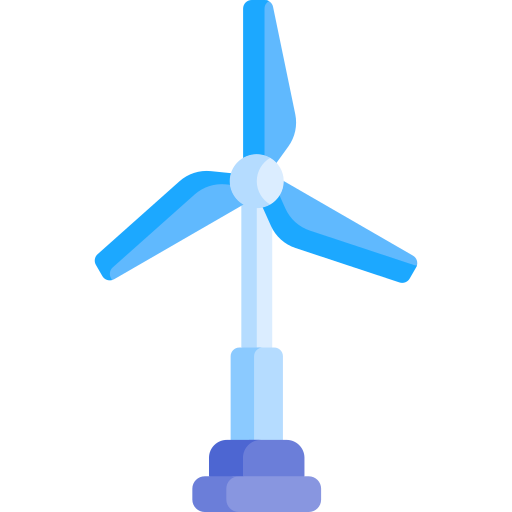
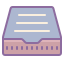
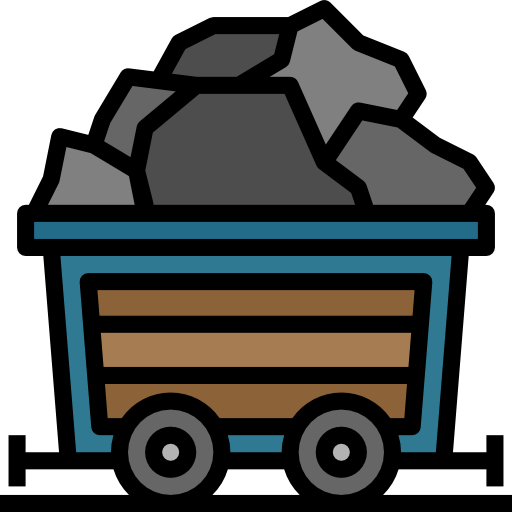
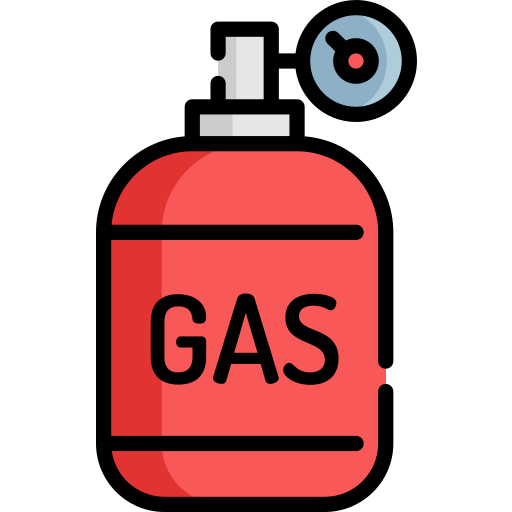
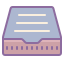
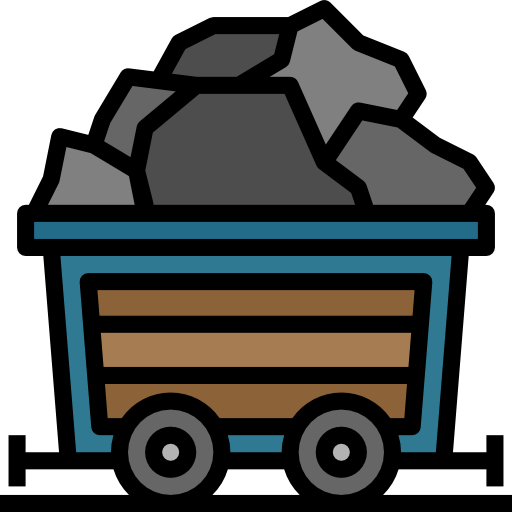
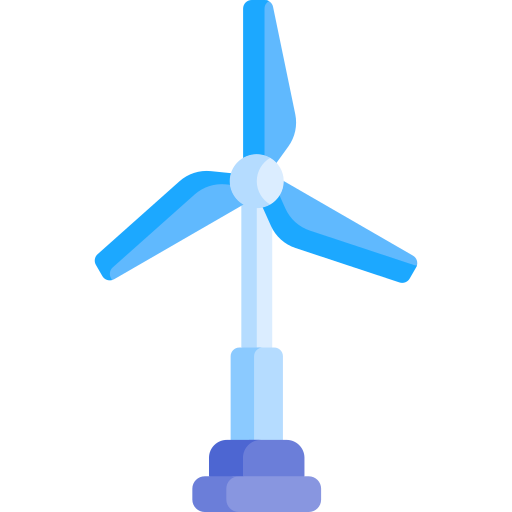
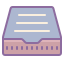
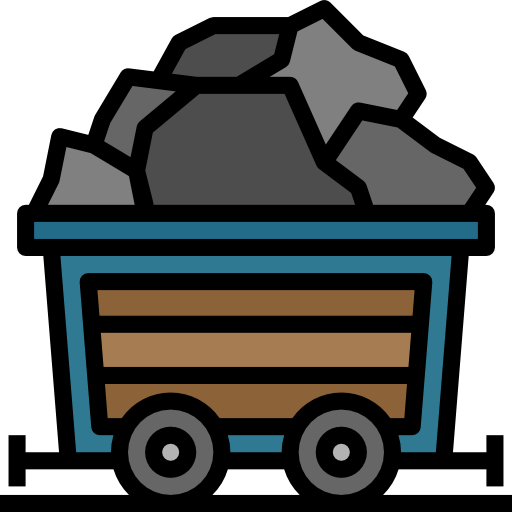
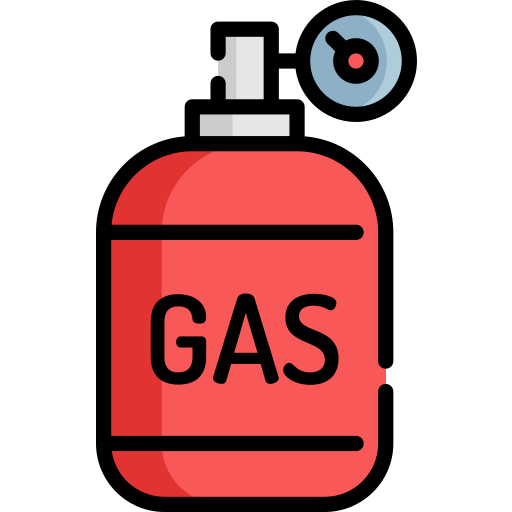
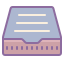
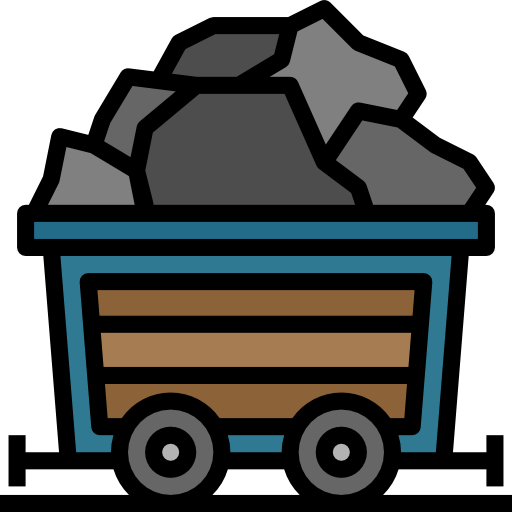
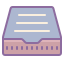
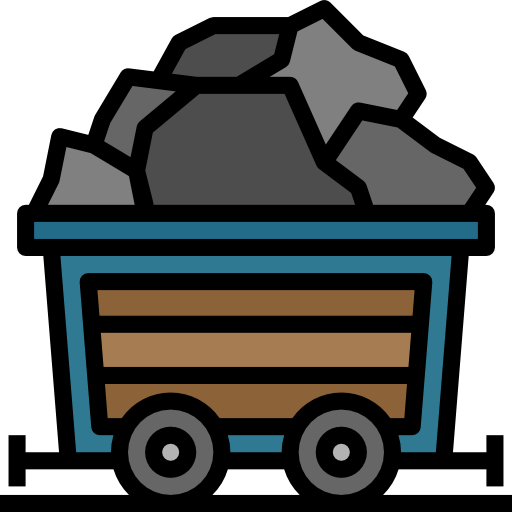
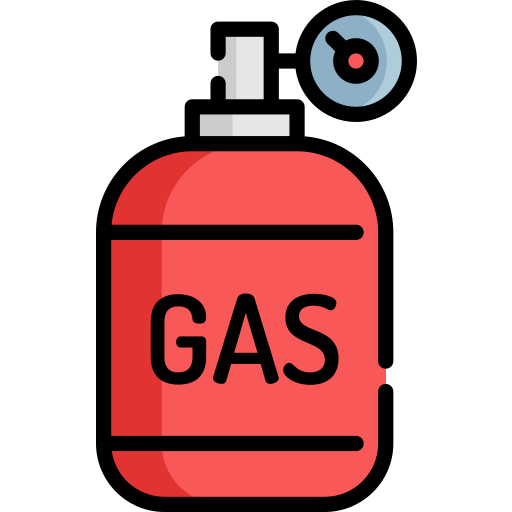
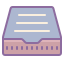
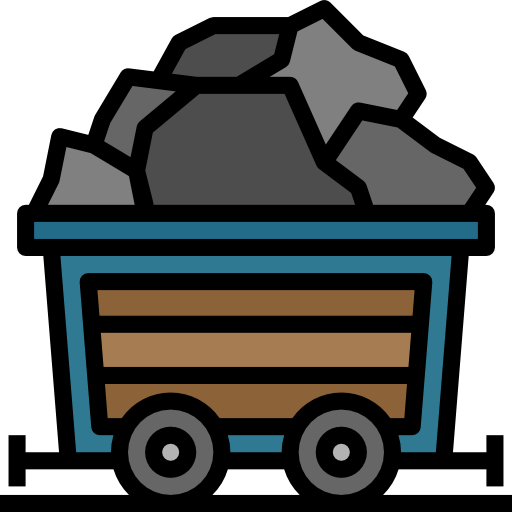
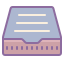
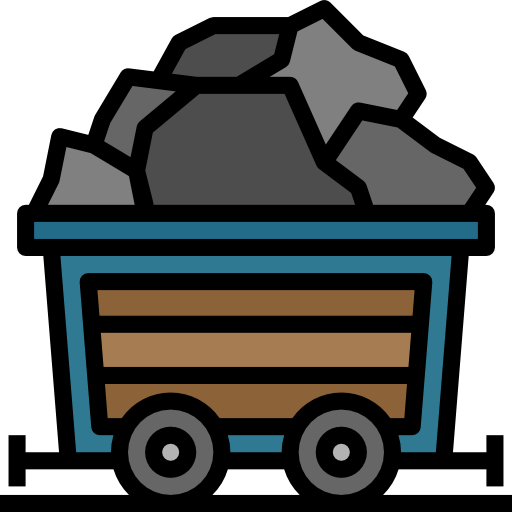
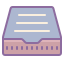
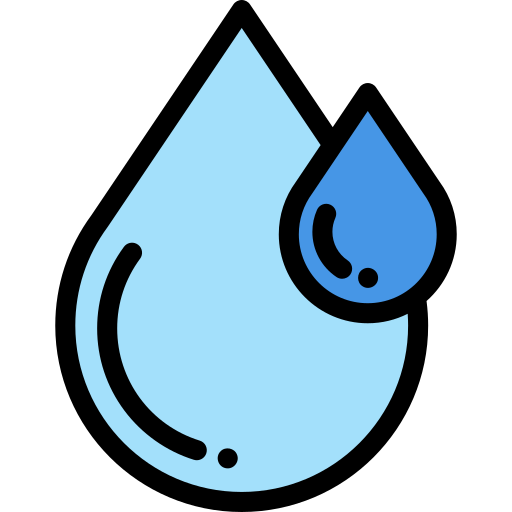
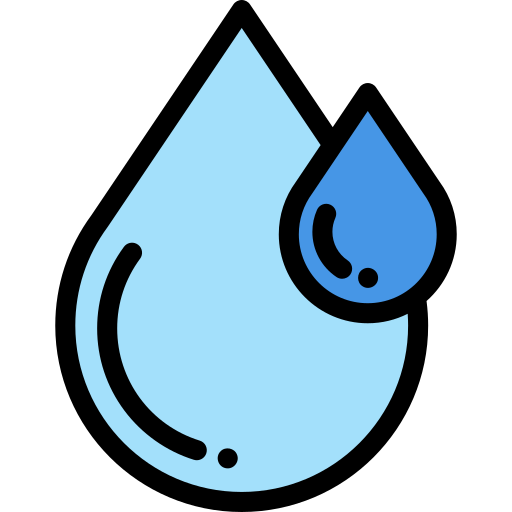
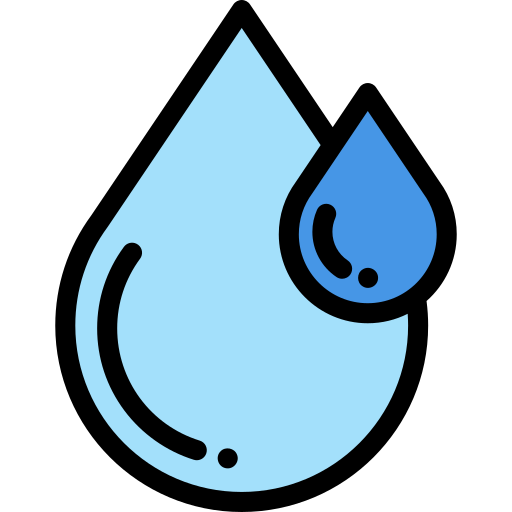
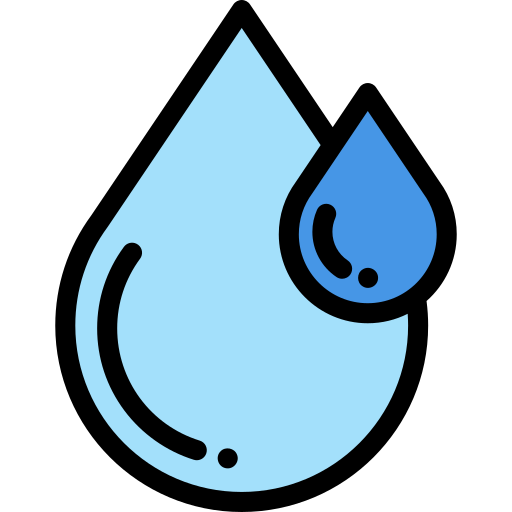
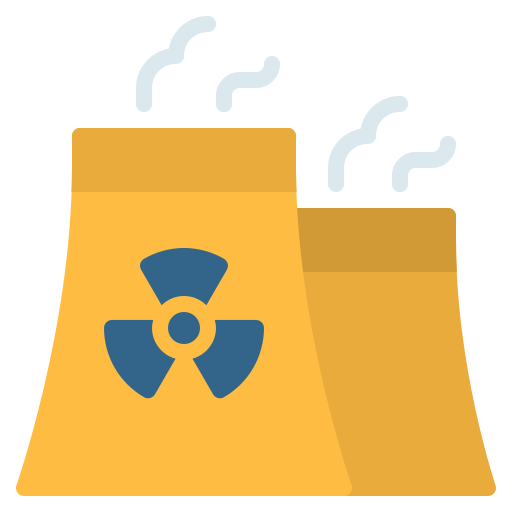
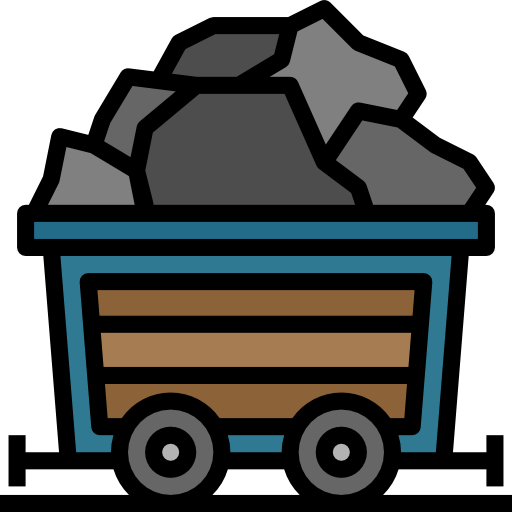
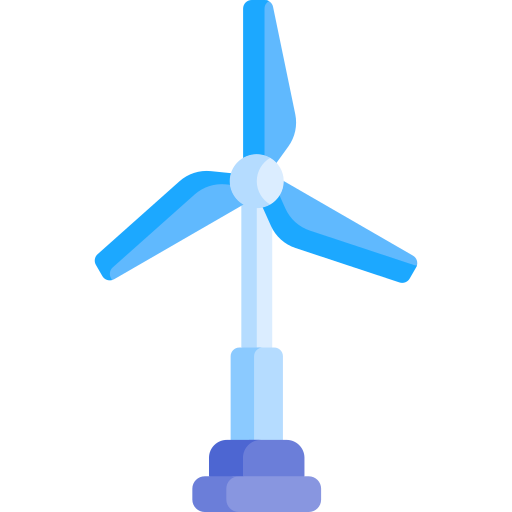
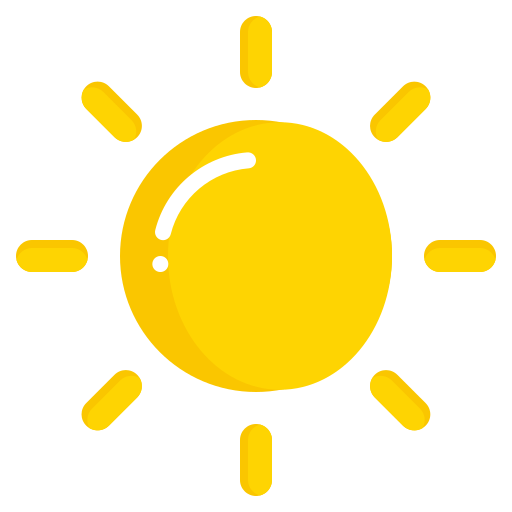
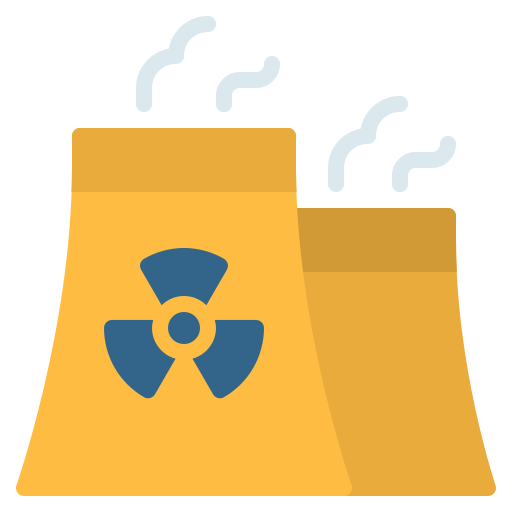
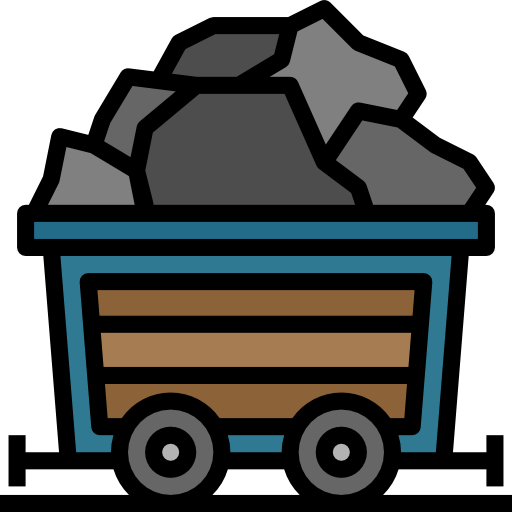
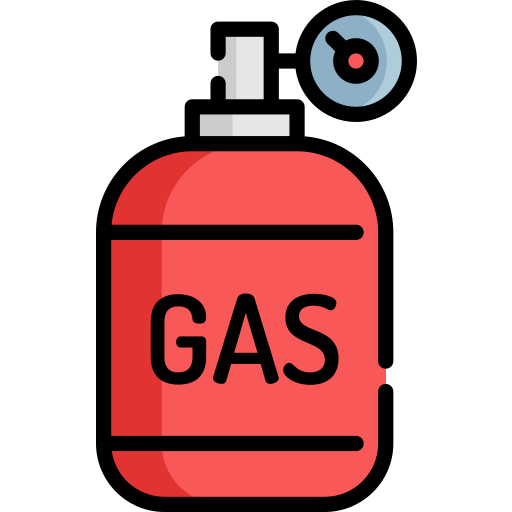
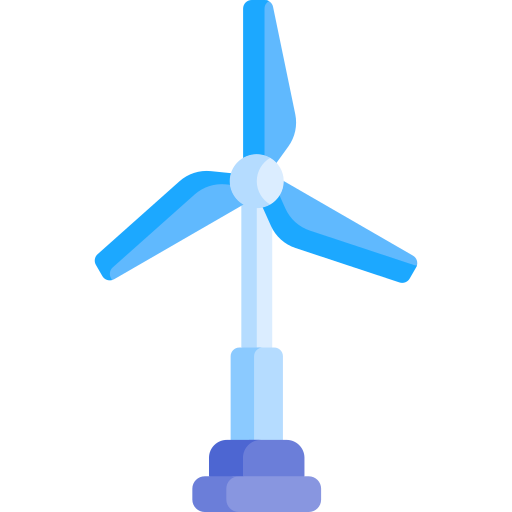
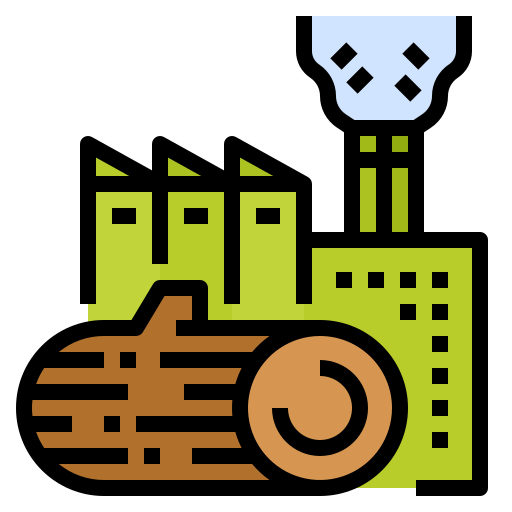
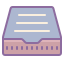
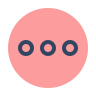
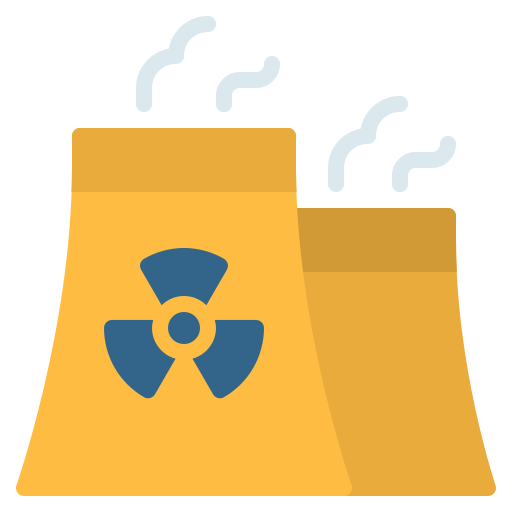
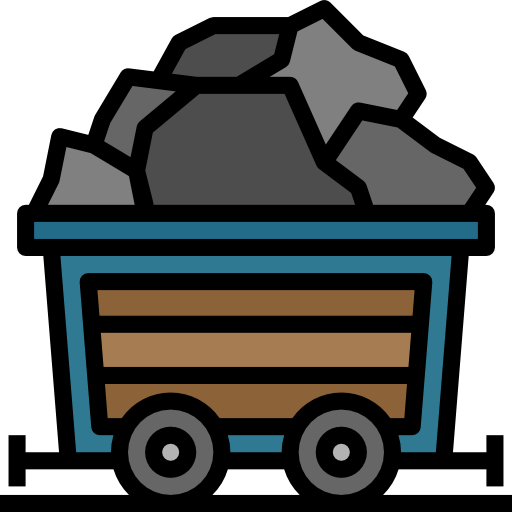
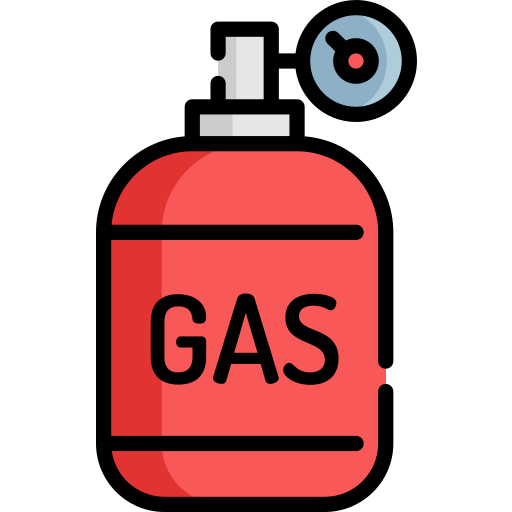
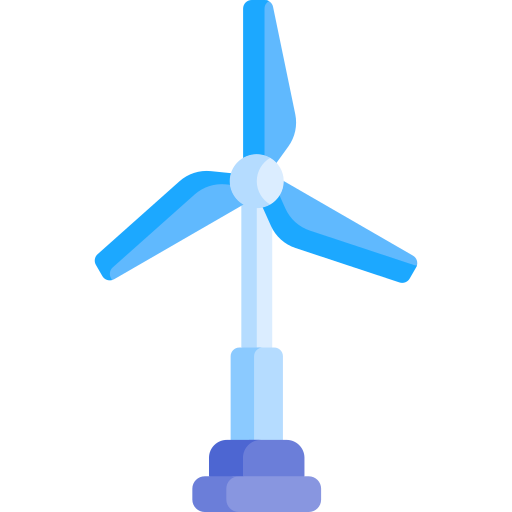
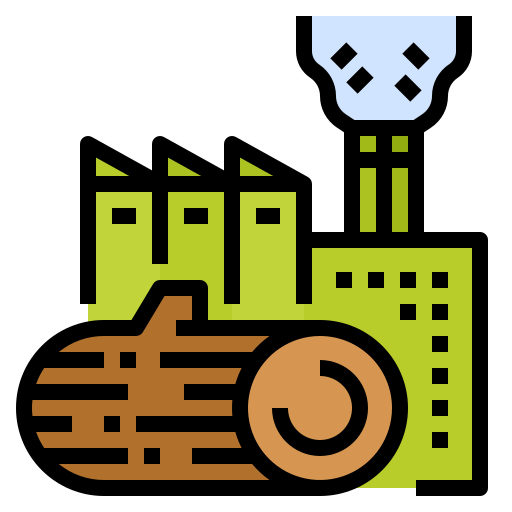
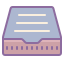
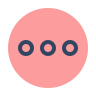
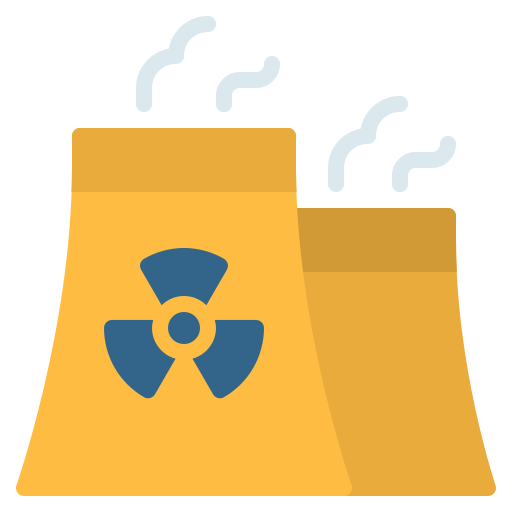
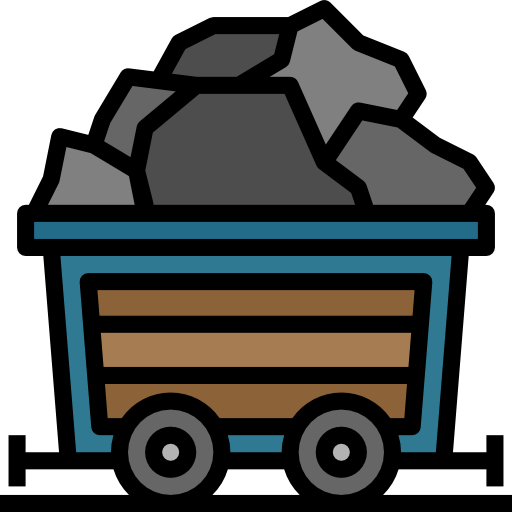
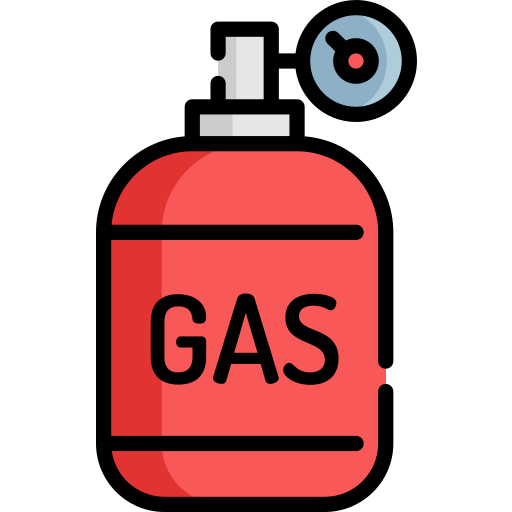
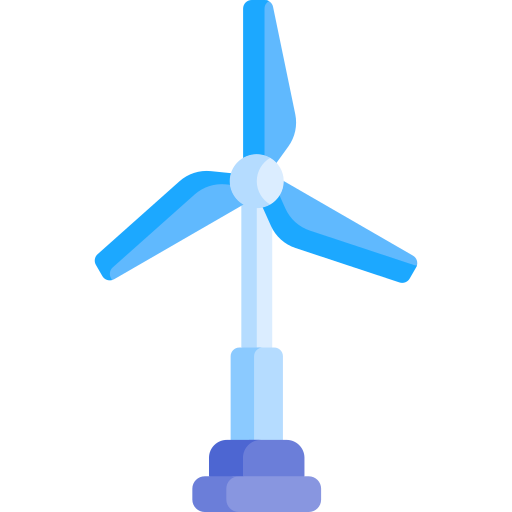
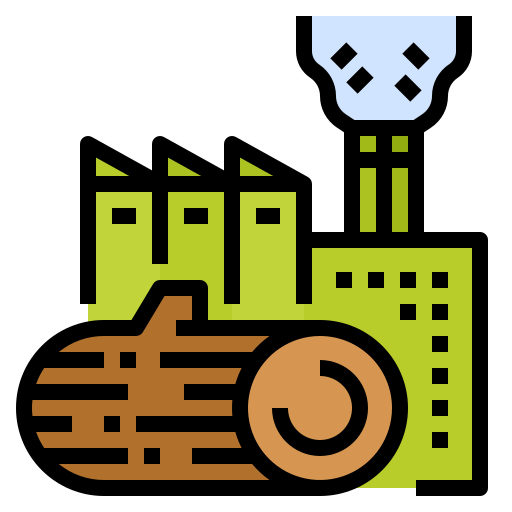
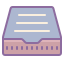
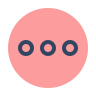
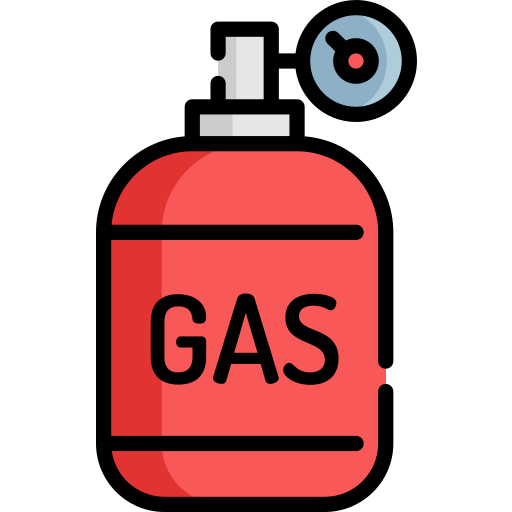
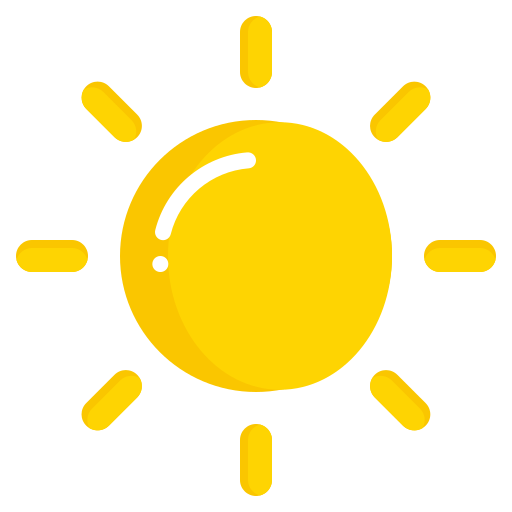
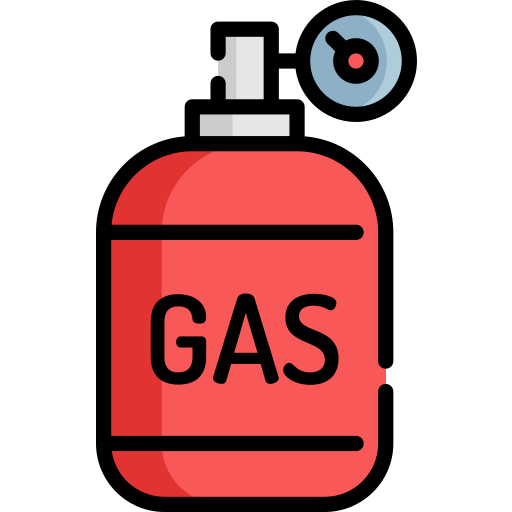
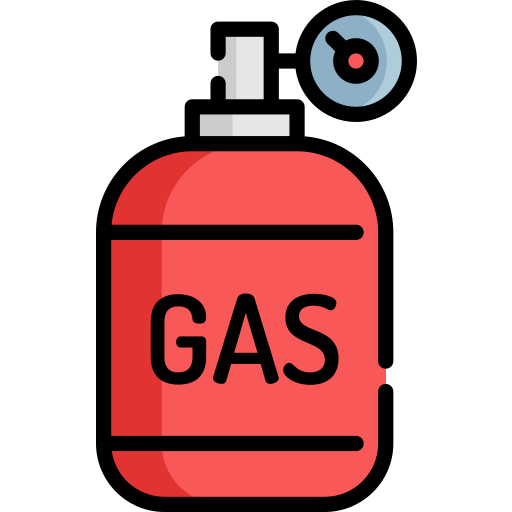
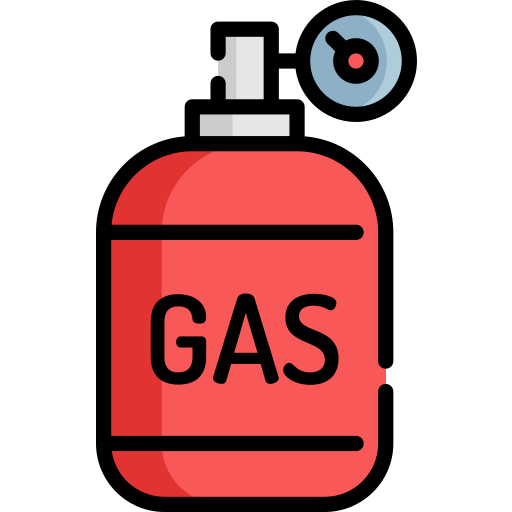
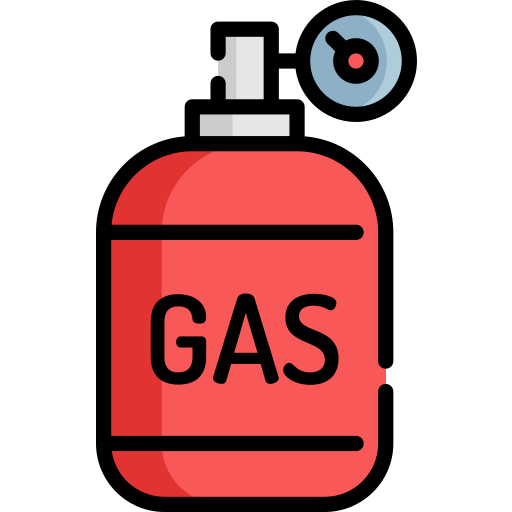
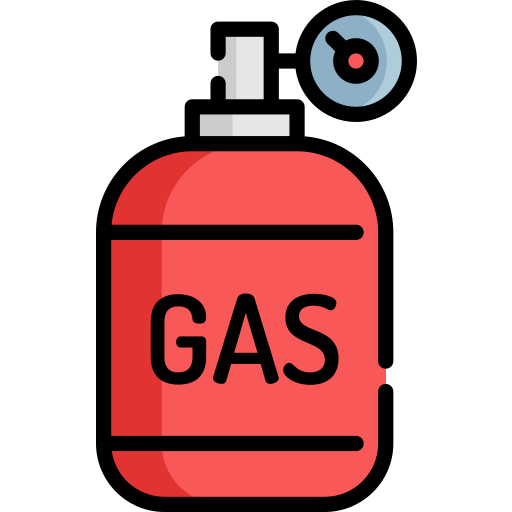
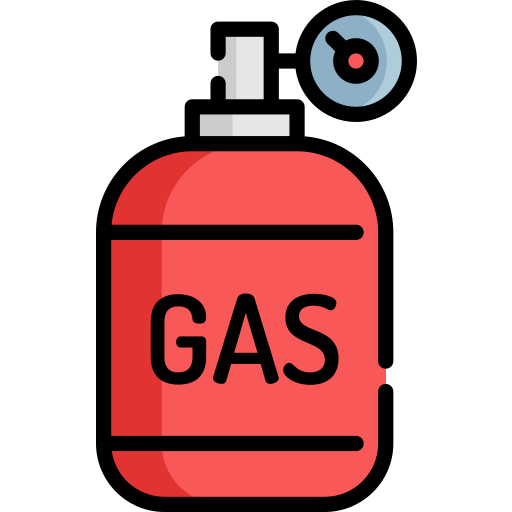
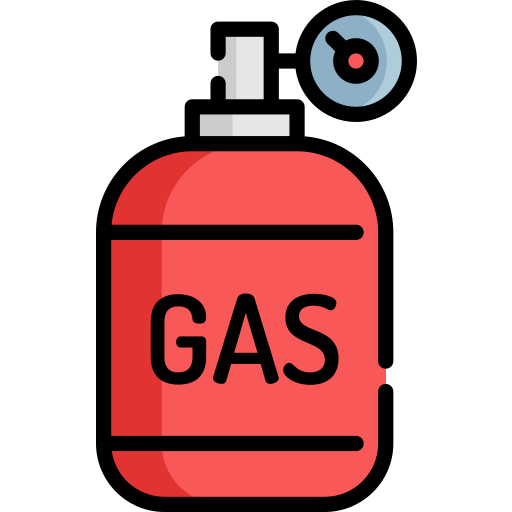
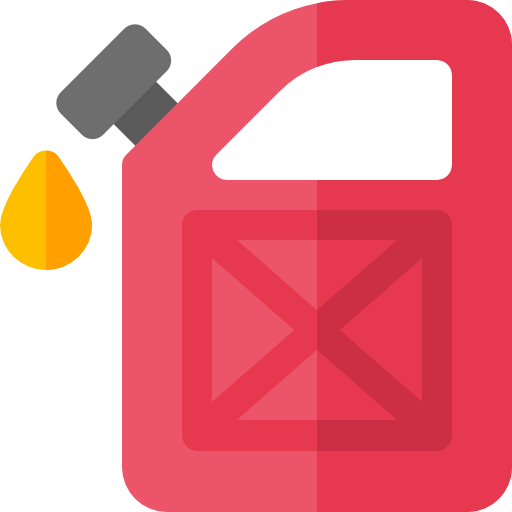
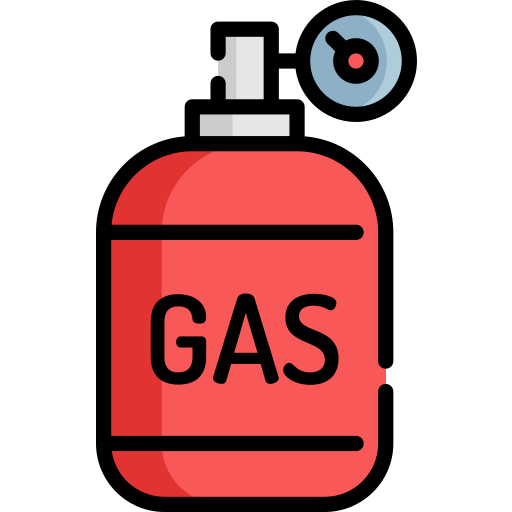
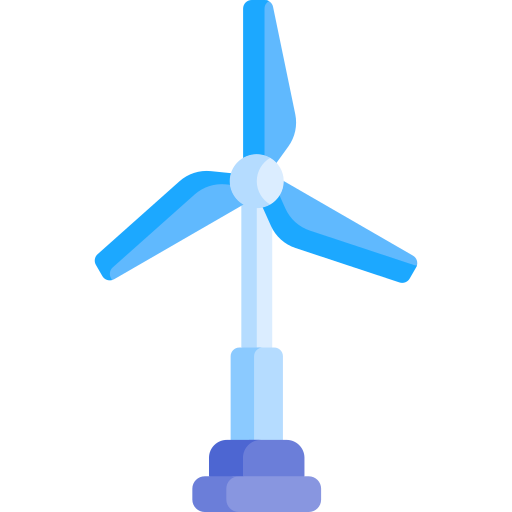
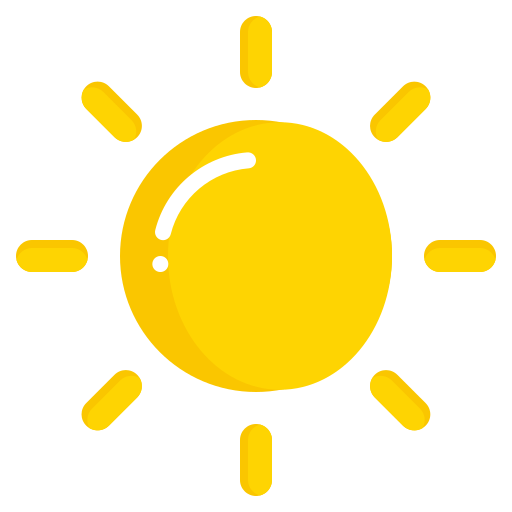
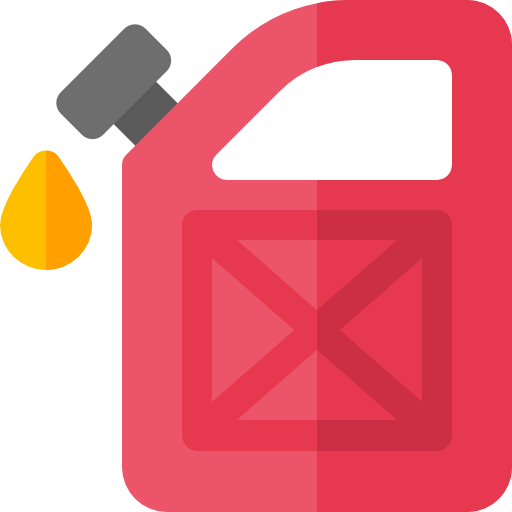
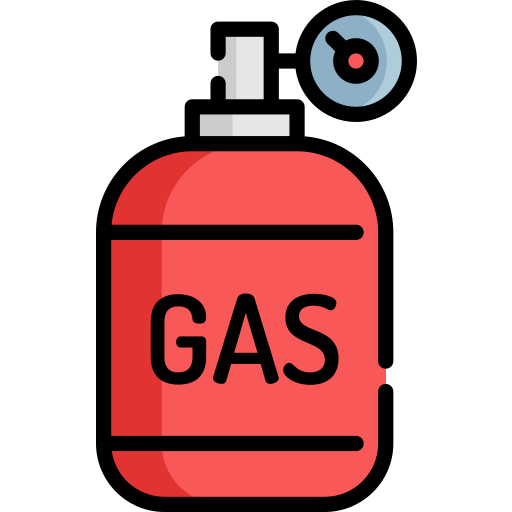
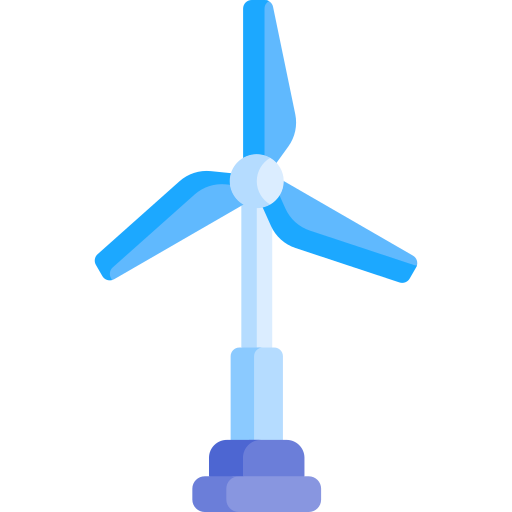
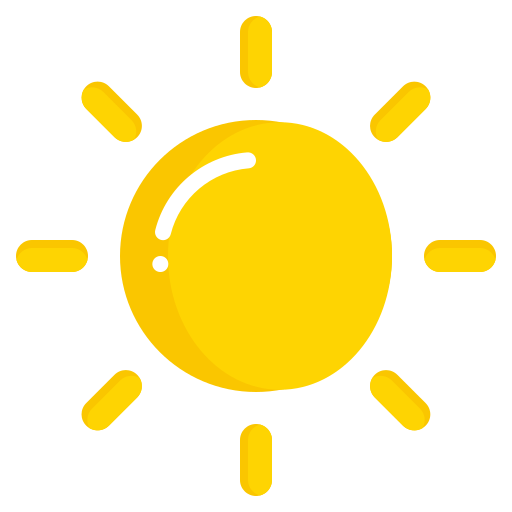
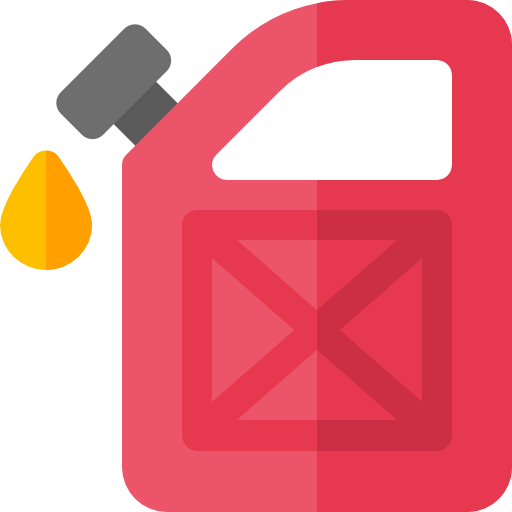
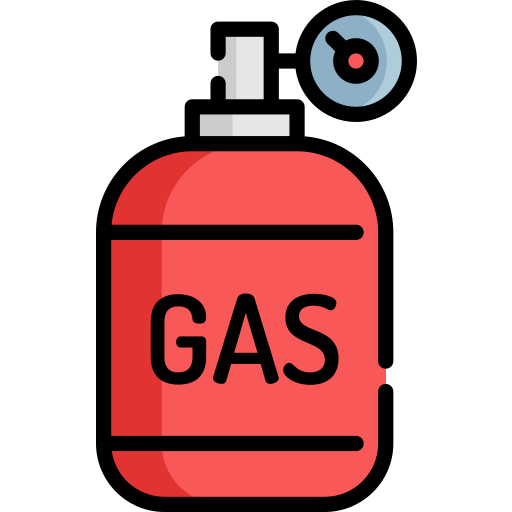
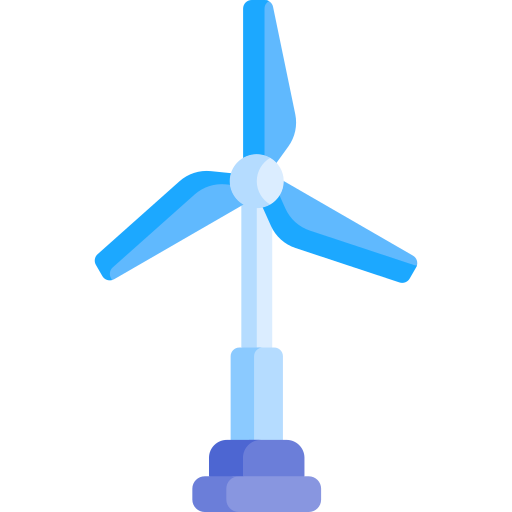
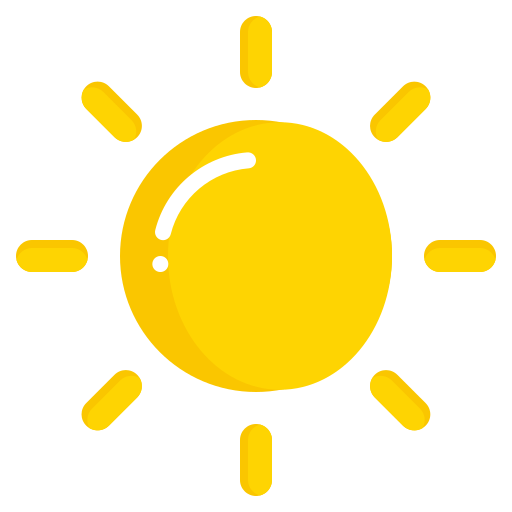
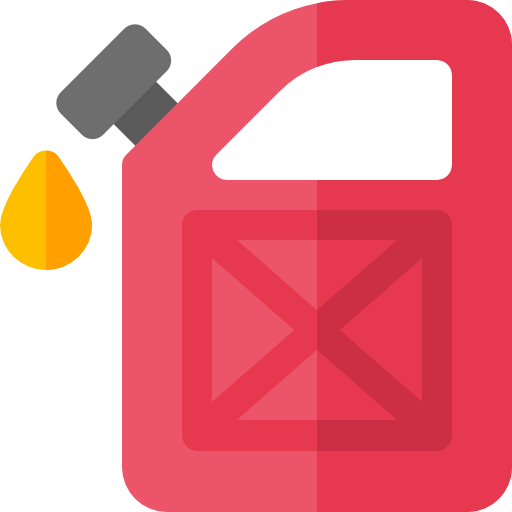
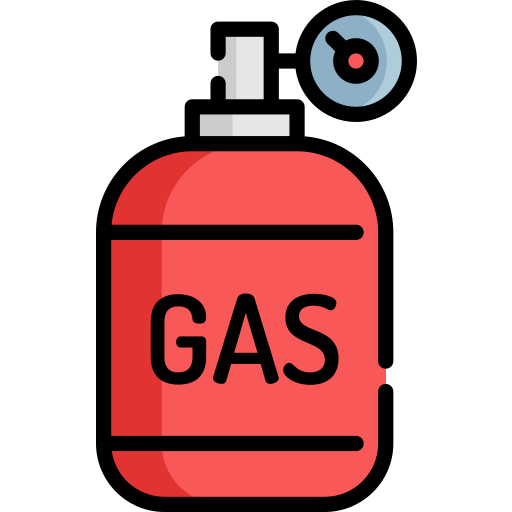
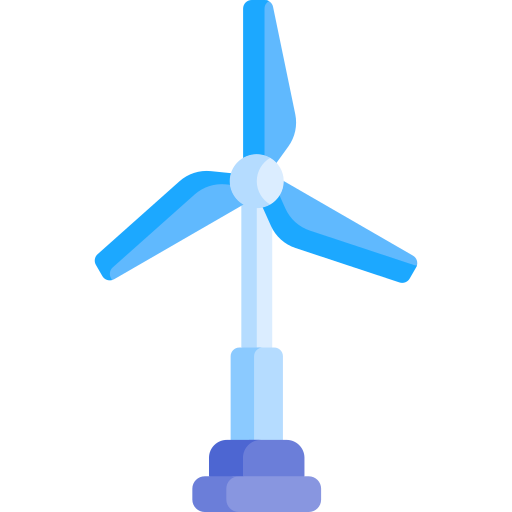
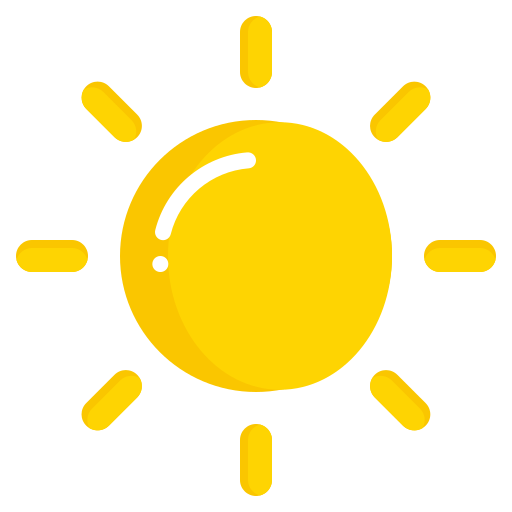
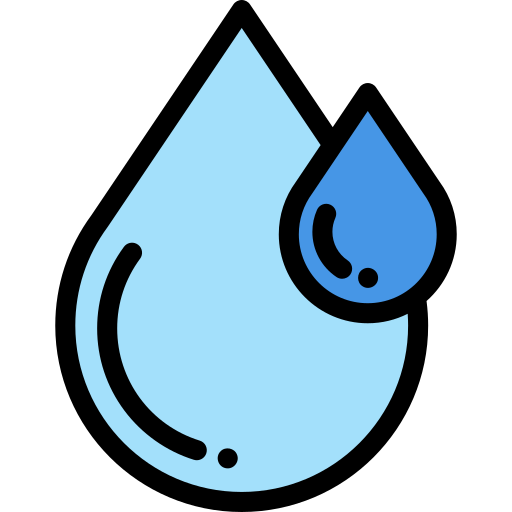
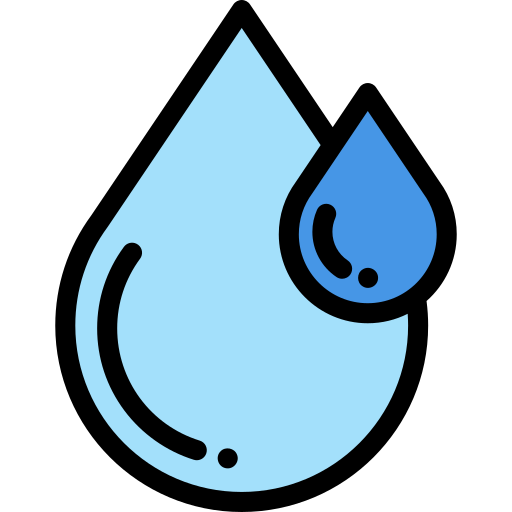
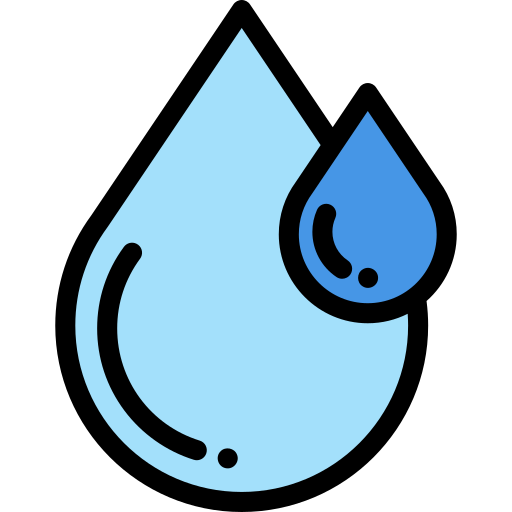
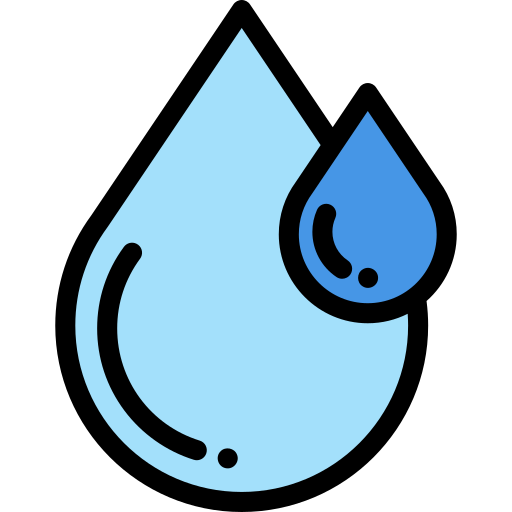
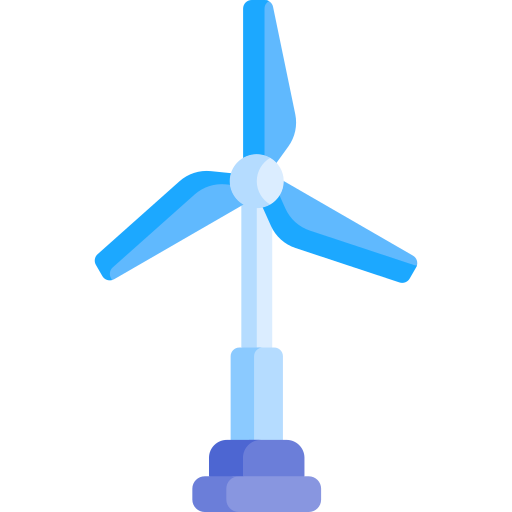
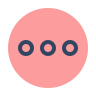
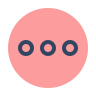
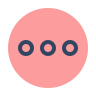
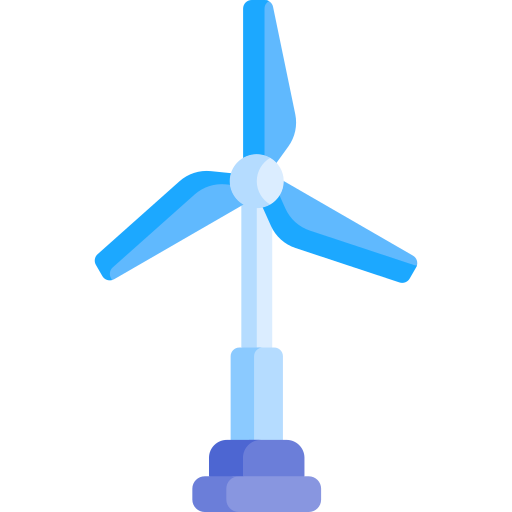
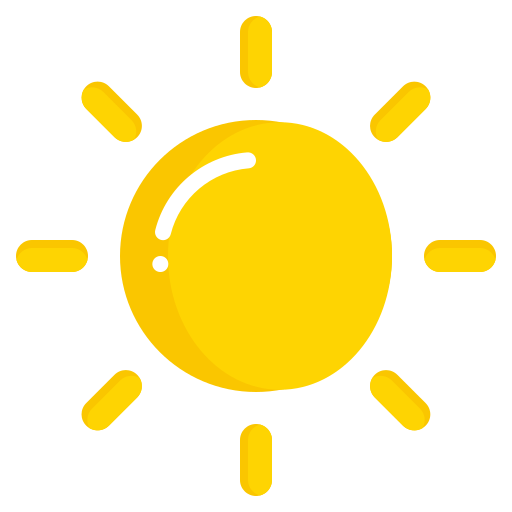
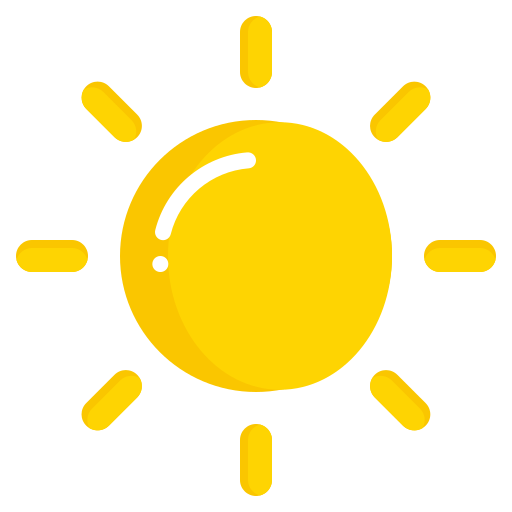
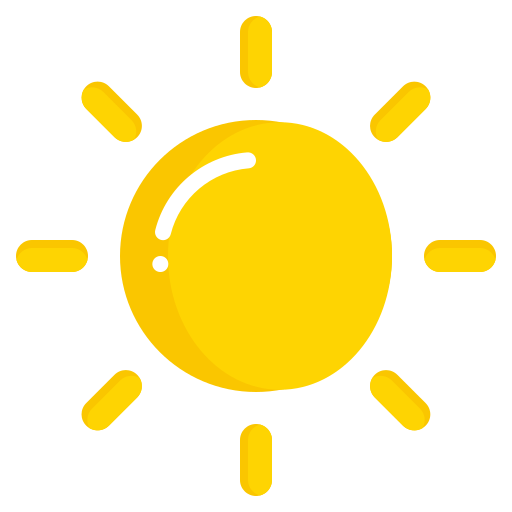
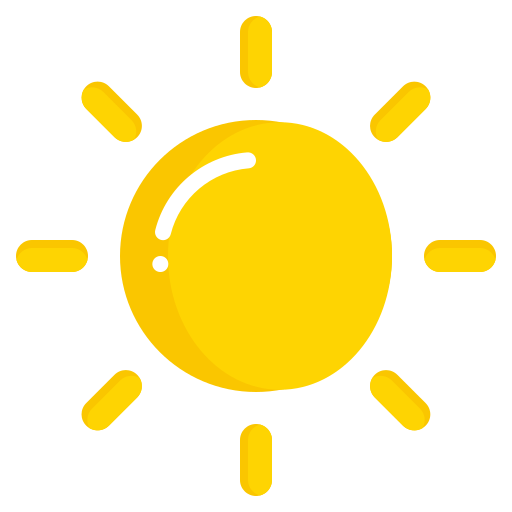
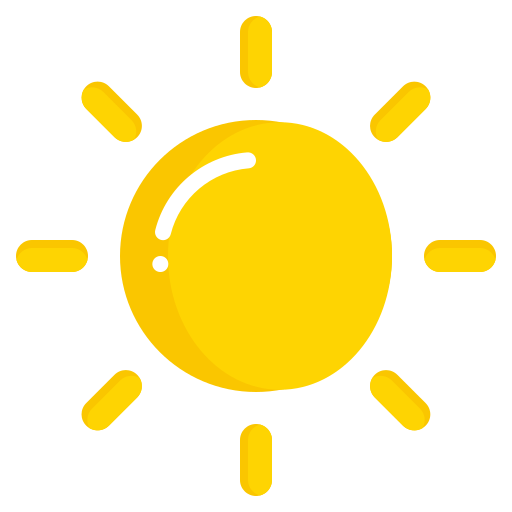
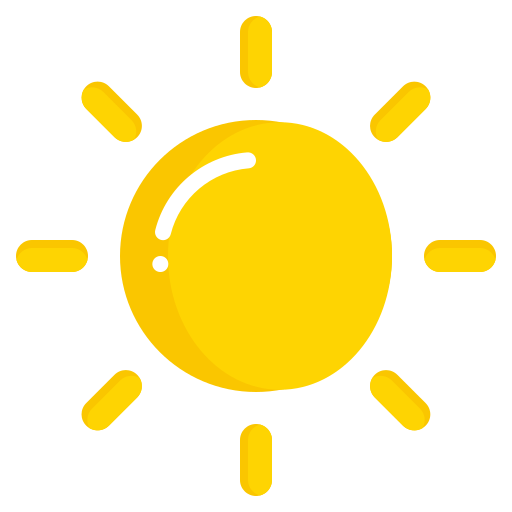
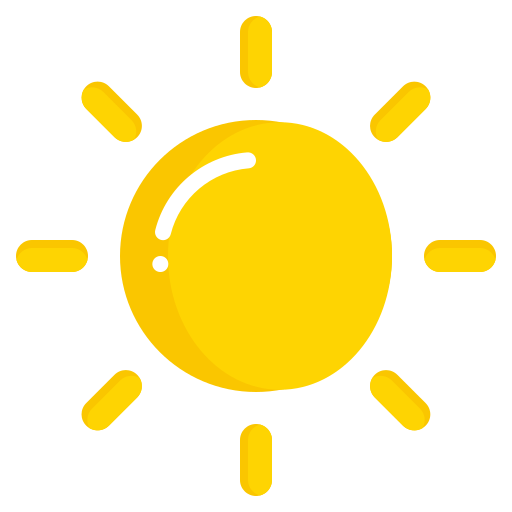
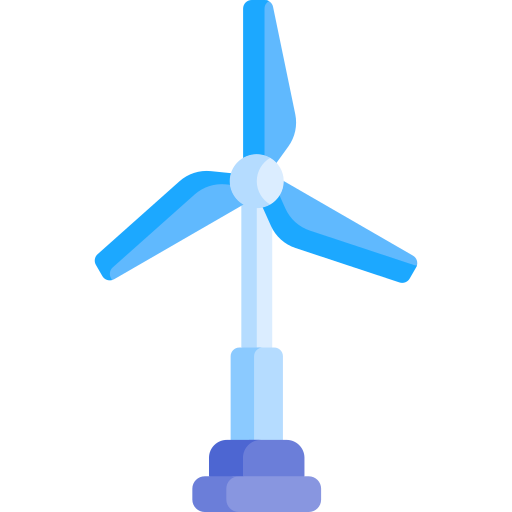
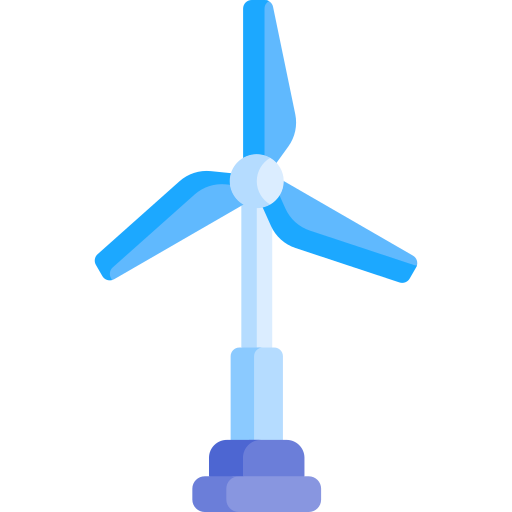
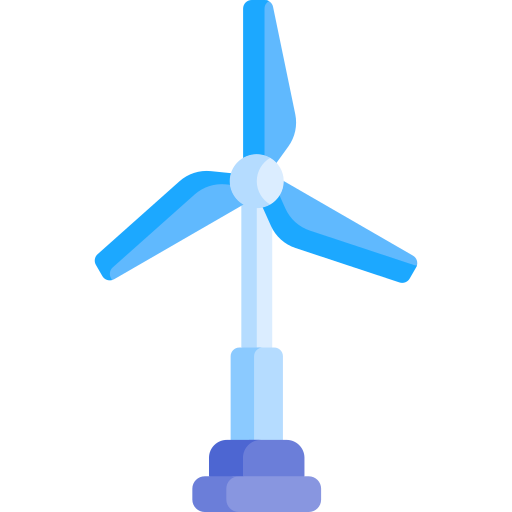
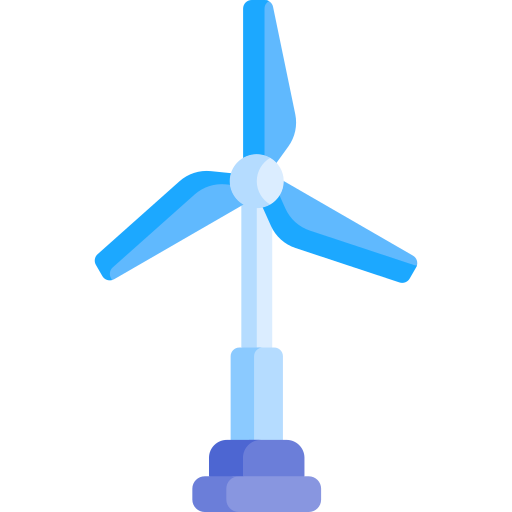
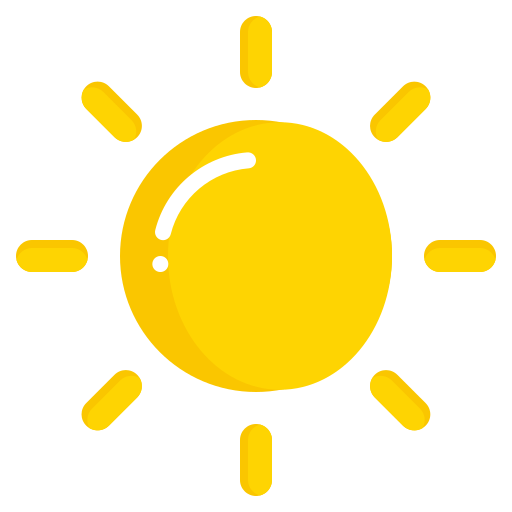
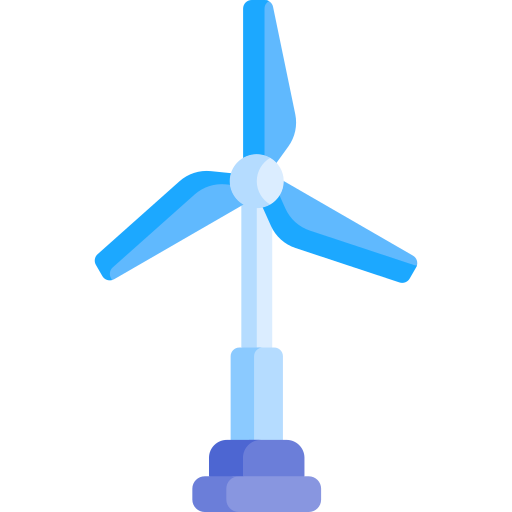
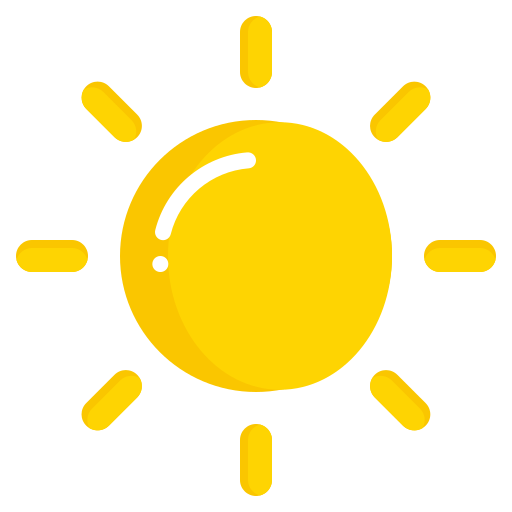
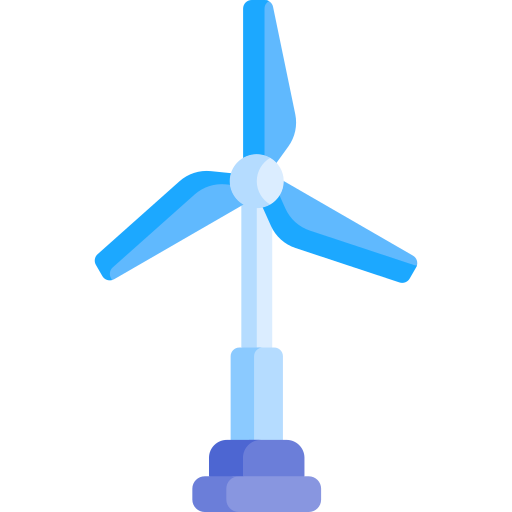
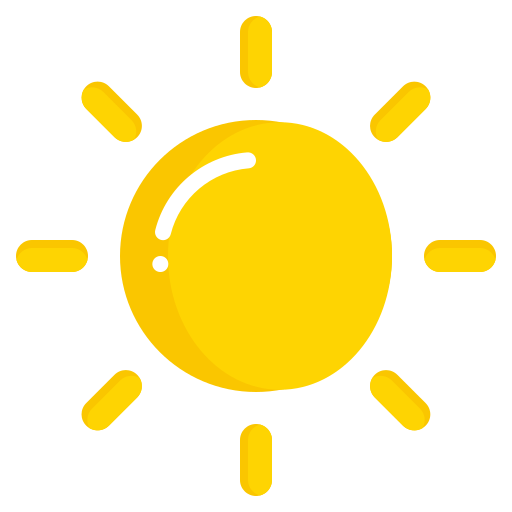

In [ ]:
m